<a href="https://colab.research.google.com/github/Sarraalii/Machine-Learning-Proj/blob/main/NEW_FINAL_CHL5230H_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project, Prototype 2**
<b> Team: </b> Sarra Ali, Amrit Tiwana, Konrad Samsel <br>
<b> Team Number: </b> #19 <br>
<b> Course: </b> CHL5239 Fall 2023<br>
<b> Date: </b> 2023-12-08 <br>
<br>

<h5> <b> Basic Features of Data Analysis Project:</b></h5>
<b> Dataset: </b> Diabetes Study File 10 (December 14 2017)<br>
<b> Outcome of Interest: </b> Diagnosis of Depression (Binary)<br>
<b> ML Models: </b> Logistic Regression with K-means for feature clustering, random forest, artificial neural network, recurrent nerual network/LSTM

#Section A: Loading, Exploration, and Feature Engineering

## Section A1 - Data Loading and Preliminary Exploration

**Import Libraries**

In [ ]:
#IMPORT LIBRARY (ORGANIZED BY MODULE) - Some may be imported later on as needed
!pip install impyute

#Import libraries - Basic
from google.colab import files
import io #import direct
import os
import numpy as np
import pandas as pd

#Import Libraries - Data Visualization
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

#Import Libraries - Logistic Lecture
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings

#Import the necessary libraries - Misc
import statsmodels.api as sm
from sklearn.discriminant_analysis import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import re


warnings.filterwarnings('ignore')

**Load the Data**

In [ ]:
# Upload Options
user_choice = input("Specify user (K, S, A): ")

if user_choice == 'A':
# Option A: Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_excel("drive/My Drive/CHL5230 Machine Learning Project/Diabetes Study File 10K Dec 14 2017.xlsx")
elif user_choice == 'K':
    # Option K: Mount Google Drive - Konrad
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_excel("drive/My Drive/ML Course/Assignment/Diabetes Study File 10K.xlsx") #Konrad File Path
elif user_choice == 'S':
    # Load data
    data = pd.read_excel('data.xlsx')
else:
    print("Invalid choice. Please specify user (K, S, A) and try again.")

data.head()
data.shape # Check, Dimensions = 10,000 obs c 43 vars



Specify user (K, S, A): K
Mounted at /content/drive


(10000, 43)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

Age_at_Exam    sBP   sBP_Date    BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           28  142.0 2011-11-14  25.20 2011-09-09  2.80 2012-01-25  0.87   
1           60  132.0 2015-02-26  20.90 2015-02-26  1.14 2015-02-19  1.61   
2           67  102.0 2010-02-03  26.63 2010-02-03  4.00 2010-02-04  1.25   
3           68  158.0 2015-05-28  31.20 2015-05-28  2.62 2015-06-02   NaN   
4           41  130.0 2014-04-23  33.34 2014-06-09  3.80 2013-11-15  0.87   

    HDL_Date  A1c   A1c_Date    TG    TG_Date  FBS   FBS_Date  FBS>DM  \
0 2012-01-25  3.4 2012-01-25  4.05 2012-01-25  4.9 2012-01-25       1   
1 2015-02-19  3.6 2015-02-19  0.68 2015-02-19  5.3 2015-02-19       1   
2 2010-02-04  3.9 2010-02-04  0.93 2010-02-04  4.8 2010-02-04       1   
3        NaT  4.3 2015-06-02  0.91 2015-06-02  4.5 2015-06-02       1   
4 2013-11-15  4.4 2013-11-15  1.16 2013-11-15  5.1 2014-02-25       1   

   Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes DM_OnsetDate  \
0               5.54                 2012-01-25         0          NaT   
1               3.06                 2015-02-19         0          NaT   
2               5.67                 2010-02-04         0          NaT   
3               4.73                 2015-06-02         0          NaT   
4               5.19                 2013-11-15         0          NaT   

   Depression Depression_OnsetDate  HTN HTN_OnsetDate  OA OA_OnsetDate  COPD  \
0           1           2012-06-06    1    2012-03-29   0          NaT     0   
1           1           2015-05-08    0           NaT   0          NaT     0   
2           0                  NaT    0           NaT   1   2010-09-15     1   
3           1           2015-06-01    0           NaT   0          NaT     0   
4           1           2012-10-30    1    2010-12-06   0          NaT     0   

   COPD_Date                           Hypertension_Medications  \
0        NaT   ENALAPRIL AND DIURETICS / ENALAPRIL / LISINOP...   
1        NaT                                                NaN   
2 2012-03-09                                                NaN   
3        NaT                                                NaN   
4        NaT     HYDROCHLOROTHIAZIDE / METOPROLOL / PERINDOPRIL   

  Hypertension_Medications_First_Instance                    Corticosteroids  \
0                              2012-03-29                         PREDNISONE   
1                                     NaT                                NaN   
2                                     NaT       HYDROCORTISONE, COMBINATIONS   
3                                     NaT                                NaN   
4                              2010-11-15   DEXAMETHASONE AND ANTIINFECTIVES   

  Corticosteroids_first_instance     Sex  leastO(A1c_Date)  \
0                     2011-07-14    Male               NaN   
1                            NaT  Female               NaN   
2                     2010-10-06  Female               NaN   
3                            NaT  Female               NaN   
4                     2014-01-22    Male               NaN   

   leastO(DM_OnsetDate)  leastO(FBS_Date)  LeastOfAll A1C_BEF_DM FBS_BEF_DM  \
0                   NaN               NaN         NaN        NaN        NaN   
1                   NaN               NaN         NaN        NaN        NaN   
2                   NaN               NaN         NaN        NaN        NaN   
3                   NaN               NaN         NaN        NaN        NaN   
4                   NaN               NaN         NaN        NaN        NaN   

         Patient_ID DM_Onset_Revised DM_Onset_Revised_1YrPrior DIABETES  
0  1003000000214427              NaT                       NaT       No  
1  1001000000117904              NaT                       NaT       No  
2  4001000000128599              NaT                       NaT       No  
3  1001000000233648              NaT                       NaT       No  
4  9001000000031567              NaT                       NaT       No

## Section A2 - Subset Data

**Subset Data for Diabetes and Prediabetes Only**

In [ ]:
#Create the 'Diabetes2' variable
data['Diabetes2'] = 0
data.loc[(data['A1c'] >= 5.7) & (data['A1c'] <= 6.4) & (data['Diabetes'] == 0), 'Diabetes2'] = 1
data.loc[(data['A1c'] >= 5.7) & (data['Diabetes'] == 0), 'Diabetes2'] = 1
data.loc[data['Diabetes'] == 1, 'Diabetes2'] = 2

#There are two diabetes variables, will do cross tab to make things match
pd.crosstab(data['DIABETES'], data['Diabetes']) #Match, can drop either

#among those without diabetes, we also want to try to include prediabetic patients - defined by an elevated A1C for this assignment

Diabetes     0     1
DIABETES            
No        4861     0
Yes          0  5139

In [ ]:
#Delete unnecessary variables from the dataset - OLD
# DeleteList=['sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date',
#        'HDL', 'HDL_Date', 'A1c_Date', 'TG', 'TG_Date',
#        'FBS_Date', 'FBS>DM', 'Total_Cholesterol_Lab_Date',
#        'DM_OnsetDate', 'Depression_OnsetDate',
#        'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date',
#        'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
#        'Corticosteroids', 'Corticosteroids_first_instance',
#        'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
#        'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM',
#        'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES', 'Diabetes', 'Patient_ID']

#Delete unnecessary variables from the dataset - NEW LIST

DeleteList=[
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES']

data = data.drop(DeleteList, axis=1)

In [ ]:
# Only keep observations where Diabetes2 does not equal 0
data = data[data['Diabetes2'] != 0]

In [ ]:
#Check, Dimentions = 7862 obs x 35
data.shape

(7862, 35)

## Section A3 - Feature Engineering

**Feature Engineering** - Section A3-1 - Hypertension Medications

In [ ]:
#Expand medications to single binary variables - HTN Part 1: get names

#Hypertension medication set  - create
hypertension_medication_set = set()

#Iterate through the 'Hypertension_Medications' column
for medication in data['Hypertension_Medications']:
    if isinstance(medication, str):  # Check if it's a string
        # Transformations for specific cases
        medication = medication.replace("DIURETICS", "DIURETIC")
        medication = medication.replace(", COMBINATIONS", "").strip()
        medication = medication.replace("OTHER DIURETICS", "DIURETIC")
        medication = medication.replace("OTHER DIURETIC", "DIURETIC")

        # Split medications if multiple are listed in a single cell
        medications = medication.split('/')

        # Add each medication to the set
        for med in medications:
            med = med.strip()  # Remove leading/trailing spaces

            # Split medication after "AND" and add each part if it's not already added
            if " AND " in med:
                # Split medication and diuretics
                med_parts = med.split(" AND ")
                for part in med_parts:
                    part = part.strip()  # Remove leading/trailing spaces
                    if part not in hypertension_medication_set:
                        hypertension_medication_set.add(part)
            else:
                if med not in hypertension_medication_set:
                    hypertension_medication_set.add(med)


# Print the unique hypertension medications set
hypertension_medication_set = sorted(hypertension_medication_set)
print(hypertension_medication_set)
print(len(hypertension_medication_set))


['ACEBUTOLOL', 'ALISKIREN', 'AMILORIDE', 'AMLODIPINE', 'ATENOLOL', 'BENAZEPRIL', 'BETAXOLOL', 'BISOPROLOL', 'CANDESARTAN', 'CAPTOPRIL', 'CARVEDILOL', 'CILAZAPRIL', 'DILTIAZEM', 'DIURETIC', 'DOXAZOSIN', 'ENALAPRIL', 'EPLERENONE', 'EPROSARTAN', 'ETACRYNIC ACID', 'FELODIPINE', 'FOSINOPRIL', 'FUROSEMIDE', 'HYDROCHLOROTHIAZIDE', 'IRBESARTAN', 'LABETALOL', 'LISINOPRIL', 'LOSARTAN', 'METOPROLOL', 'NADOLOL', 'NIFEDIPINE', 'OLMESARTAN MEDOXOMIL', 'PERINDOPRIL', 'PINDOLOL', 'POTASSIUM-SPARING AGENTS', 'PRAZOSIN', 'PROPRANOLOL', 'QUINAPRIL', 'RAMIPRIL', 'SOTALOL', 'SPIRONOLACTONE', 'TELMISARTAN', 'TIMOLOL', 'TRANDOLAPRIL', 'TRIAMTERENE', 'VALSARTAN', 'VERAPAMIL']
46


In [ ]:
#Expand medications to single binary variables - HTN Part 2: create vars

for medication in hypertension_medication_set:
    # Create a new column for the current medication, initialized to 0
    data['HTRX_' + medication] = 0  # Initialize to 0 by default

    # Check if the medication is not null (not NaN)
    not_null_mask = data['Hypertension_Medications'].notnull()

    # Apply the .str.contains() and .astype(int) operations only to non-null values
    data.loc[not_null_mask, 'HTRX_' + medication] = data.loc[not_null_mask, 'Hypertension_Medications'].str.contains(medication).astype(int)

data.shape #Check, Dimentions = 7862 obs x 80
data.head()

#check to see if theres enough observations for each
htrx_columns = data.filter(like='HTRX_')
count_dict = {col: (htrx_columns[col] == 1).sum() for col in htrx_columns.columns}

print(count_dict)
print(len(count_dict))

# Select keys with counts less than 10
HTN_keys_todrop = [key for key, value in count_dict.items() if value < 10]
print(HTN_keys_todrop)

data.drop(columns=[col for col in data.columns if col in HTN_keys_todrop], inplace=True)
data.shape #73 columns, 38 new variables - binary (presence/absence)

{'HTRX_ACEBUTOLOL': 53, 'HTRX_ALISKIREN': 37, 'HTRX_AMILORIDE': 1, 'HTRX_AMLODIPINE': 1857, 'HTRX_ATENOLOL': 695, 'HTRX_BENAZEPRIL': 13, 'HTRX_BETAXOLOL': 5, 'HTRX_BISOPROLOL': 627, 'HTRX_CANDESARTAN': 308, 'HTRX_CAPTOPRIL': 3, 'HTRX_CARVEDILOL': 95, 'HTRX_CILAZAPRIL': 54, 'HTRX_DILTIAZEM': 500, 'HTRX_DIURETIC': 1373, 'HTRX_DOXAZOSIN': 85, 'HTRX_ENALAPRIL': 276, 'HTRX_EPLERENONE': 9, 'HTRX_EPROSARTAN': 19, 'HTRX_ETACRYNIC ACID': 2, 'HTRX_FELODIPINE': 72, 'HTRX_FOSINOPRIL': 74, 'HTRX_FUROSEMIDE': 829, 'HTRX_HYDROCHLOROTHIAZIDE': 2246, 'HTRX_IRBESARTAN': 671, 'HTRX_LABETALOL': 40, 'HTRX_LISINOPRIL': 292, 'HTRX_LOSARTAN': 409, 'HTRX_METOPROLOL': 1029, 'HTRX_NADOLOL': 45, 'HTRX_NIFEDIPINE': 477, 'HTRX_OLMESARTAN MEDOXOMIL': 147, 'HTRX_PERINDOPRIL': 972, 'HTRX_PINDOLOL': 9, 'HTRX_POTASSIUM-SPARING AGENTS': 176, 'HTRX_PRAZOSIN': 9, 'HTRX_PROPRANOLOL': 87, 'HTRX_QUINAPRIL': 126, 'HTRX_RAMIPRIL': 2324, 'HTRX_SOTALOL': 50, 'HTRX_SPIRONOLACTONE': 240, 'HTRX_TELMISARTAN': 380, 'HTRX_TIMOLOL': 82,

(7862, 73)

**Feature Engineering** - Section A3-2 - Corticosteroid Medications

In [ ]:
#Expand medications to single binary variables - CST Part 1: get names

# Corticosteroids medication set - create
corticosteroids_medication_set = set()

# Iterate through the 'Corticosteroids' column
for medication in data['Corticosteroids']:
    if isinstance(medication, str):  # Check if string
        # Transformations for specific cases
        medication = medication.replace(", COMBINATIONS", "").strip()
        medication = medication.replace(",", "/")
        medication = medication.replace("AND", "/")
        # Split medications if multl are listed in a single cell
        medications = medication.split('/')

        # Add each medication to the set
        for med in medications:
            med = med.strip()  # Remove leading/trailing spaces
            if med not in corticosteroids_medication_set:
                corticosteroids_medication_set.add(med)

# Print the unique corticosteroids medications set
corticosteroids_medication_set = sorted(corticosteroids_medication_set)
print(corticosteroids_medication_set)
print(len(corticosteroids_medication_set))


['ANTIBIOTICS', 'ANTIINFECTIVES', 'CORTISONE', 'DEXAMETHASONE', 'HYDROCORTISONE', 'METHYLPREDNISOLONE', 'PREDNISOLONE', 'PREDNISONE']
8


In [ ]:
#Expand medications to single binary variables - CST Part 1: create vars

for medication in corticosteroids_medication_set:
    # Create a new column for the current medication, initialized to 0
    data['CSRX_' + medication] = 0  # Initialize to 0 by default

    # Check if the medication is not null (not NaN)
    not_null_mask = data['Corticosteroids'].notnull()

    # Use regular expressions with word boundaries to match complete words
    pattern = r'\b' + re.escape(medication) + r'\b'
    data.loc[not_null_mask, 'CSRX_' + medication] = data.loc[not_null_mask, 'Corticosteroids'].str.contains(pattern, case=False, regex=True).astype(int)

# Check DataFrame
data.shape
data.head()

# Check to see if there are enough observations for each corticosteroid variable
csrx_columns = data.filter(like='CSRX')
count_dict = {col: (csrx_columns[col] == 1).sum() for col in csrx_columns.columns}

print(count_dict)
print(len(count_dict))

# Select keys with counts less than 10 for corticosteroids
CSRX_keys_todrop = [key for key, value in count_dict.items() if value < 10]
print(CSRX_keys_todrop) #all above 10, but will keep code below in case new data comes in

# Drop columns with counts less than 10
data.drop(columns=[col for col in data.columns if col in CSRX_keys_todrop], inplace=True)
data.shape  # 80 columns, including the 7 new binary variables (presence/absence) for corticosteroids

{'CSRX_ANTIBIOTICS': 205, 'CSRX_ANTIINFECTIVES': 398, 'CSRX_CORTISONE': 8, 'CSRX_DEXAMETHASONE': 368, 'CSRX_HYDROCORTISONE': 1345, 'CSRX_METHYLPREDNISOLONE': 352, 'CSRX_PREDNISOLONE': 32, 'CSRX_PREDNISONE': 663}
8
['CSRX_CORTISONE']


(7862, 80)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date  \
2138           75  154.0 2013-06-10  27.000000 2013-06-10  2.35 2013-06-18   
2139           46  110.0 2015-02-06  21.000000 2015-02-06  2.56 2015-01-08   
2140           57  110.0 2013-07-26  27.475629 2012-08-01  4.20 2013-07-31   
2141           44  110.0 2013-06-19  35.000000 2013-07-12  3.72 2013-07-03   
2142           45  116.0 2012-09-13  29.000000 2012-09-13  3.66 2012-10-01   

       HDL   HDL_Date  A1c   A1c_Date    TG    TG_Date  FBS   FBS_Date  \
2138  1.59 2013-06-18  5.7 2013-06-18  1.31 2013-06-18  5.0 2013-06-18   
2139  1.35 2015-01-08  5.7 2015-01-08  0.89 2015-01-08  4.8 2015-01-08   
2140  2.55 2013-07-31  5.7 2013-07-31  0.71 2013-07-31  4.2 2013-07-31   
2141  1.15 2013-07-03  5.7 2013-07-03  1.05 2013-07-03  4.7 2013-07-03   
2142  1.56 2012-10-01  5.7 2012-10-01  0.81 2012-10-01  5.1 2012-10-01   

      FBS>DM  Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes  \
2138       1               4.54                 2013-06-18         0   
2139       1               4.31                 2015-01-08         0   
2140       1               7.07                 2013-07-31         0   
2141       1               5.35                 2013-07-03         0   
2142       1                NaN                        NaT         0   

     DM_OnsetDate  Depression Depression_OnsetDate  HTN HTN_OnsetDate  OA  \
2138          NaT           0                  NaT    1    2009-06-02   1   
2139          NaT           1           2010-12-09    0           NaT   0   
2140          NaT           0                  NaT    1    2011-05-24   1   
2141          NaT           0                  NaT    0           NaT   0   
2142          NaT           0                  NaT    1    2010-05-06   0   

     OA_OnsetDate  COPD  COPD_Date  \
2138   2009-06-02     0        NaT   
2139          NaT     1 2010-12-10   
2140   2011-05-24     0        NaT   
2141          NaT     0        NaT   
2142          NaT     0        NaT   

                               Hypertension_Medications  \
2138                AMLODIPINE / LOSARTAN AND DIURETICS   
2139                                                NaN   
2140   HYDROCHLOROTHIAZIDE AND POTASSIUM-SPARING AGENTS   
2141                                                NaN   
2142    HYDROCHLOROTHIAZIDE / PERINDOPRIL AND DIURETICS   

     Hypertension_Medications_First_Instance  Corticosteroids  \
2138                              2009-06-02   HYDROCORTISONE   
2139                                     NaT              NaN   
2140                              2011-07-09              NaN   
2141                                     NaT              NaN   
2142                              2010-05-06              NaN   

     Corticosteroids_first_instance     Sex        Patient_ID  Diabetes2  \
2138                     2011-03-03  Female  4001000000288198          1   
2139                            NaT  Female  4001000000290369          1   
2140                            NaT  Female  4001000000291156          1   
2141                            NaT    Male  4001000000291570          1   
2142                            NaT  Female  4001000000288296          1   

      HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  HTRX_ATENOLOL  \
2138                0               0                1              0   
2139                0               0                0              0   
2140                0               0                0              0   
2141                0               0                0              0   
2142                0               0                0              0   

      HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  HTRX_CARVEDILOL  \
2138                0                0                 0                0   
2139                0                0                 0                0   
2140                0                0                 0                0   
2141             

**Feature Engineering** - Section A3-3 - Years Living with Comorbidities

In [ ]:
#List of datetime columns for lab value collection and anthropromophic measures, aim to get average OBS DATE
date_columns = ['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date', 'TG_Date', 'Total_Cholesterol_Lab_Date']

#Check for missing values in the datetime columns
missing_values = data[date_columns].isnull().sum()
print(missing_values)

#Create a new column 'OBS_DATE' with the most recent date from the specified columns
data['OBS_DATE'] = data[date_columns].apply(lambda row: pd.to_datetime(row).max(), axis=1)

#Check for missing values in the 'OBS_DATE' column
missing_values = data['OBS_DATE'].isnull().sum()
print(f"Missing values in OBS_DATE: {missing_values}")

sBP_Date                        0
BMI_Date                        0
LDL_Date                        0
HDL_Date                       36
A1c_Date                        0
TG_Date                        24
Total_Cholesterol_Lab_Date    141
dtype: int64
Missing values in OBS_DATE: 0


In [ ]:
# Calculate years for each condition only for those with a diagnosis of 1
data['Diabetes_YRS'] = 0  # Initialize to 0
data.loc[data['Diabetes'] == 1, 'Diabetes_YRS'] = (data['OBS_DATE'] - data['DM_OnsetDate']).dt.days / 365.0
data['Diabetes_YRS'] = data['Diabetes_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['HTN_YRS'] = 0  # Initialize to 0
data.loc[data['HTN'] == 1, 'HTN_YRS'] = (data['OBS_DATE'] - data['HTN_OnsetDate']).dt.days / 365.0
data['HTN_YRS'] = data['HTN_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['OA_YRS'] = 0  # Initialize to 0
data.loc[data['OA'] == 1, 'OA_YRS'] = (data['OBS_DATE'] - data['OA_OnsetDate']).dt.days / 365.0
data['OA_YRS'] = data['OA_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['COPD_YRS'] = 0  # Initialize to 0
data.loc[data['COPD'] == 1, 'COPD_YRS'] = (data['OBS_DATE'] - data['COPD_Date']).dt.days / 365.0
data['COPD_YRS'] = data['COPD_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

# Round the years to 1 decimal place
data['Diabetes_YRS'] = data['Diabetes_YRS'].round(1)
data['HTN_YRS'] = data['HTN_YRS'].round(1)
data['OA_YRS'] = data['OA_YRS'].round(1)
data['COPD_YRS'] = data['COPD_YRS'].round(1)



In [ ]:
#Delete unnecessary variables
DeleteList = ['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date', 'TG_Date', 'FBS_Date', 'Total_Cholesterol_Lab_Date','DM_OnsetDate', 'Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date', 'Hypertension_Medications', 'Hypertension_Medications_First_Instance', 'Corticosteroids', 'Corticosteroids_first_instance']

data = data.drop(DeleteList, axis=1)

In [ ]:
data.head()

Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  FBS  FBS>DM  \
2138           75  154.0  27.000000  2.35  1.59  5.7  1.31  5.0       1   
2139           46  110.0  21.000000  2.56  1.35  5.7  0.89  4.8       1   
2140           57  110.0  27.475629  4.20  2.55  5.7  0.71  4.2       1   
2141           44  110.0  35.000000  3.72  1.15  5.7  1.05  4.7       1   
2142           45  116.0  29.000000  3.66  1.56  5.7  0.81  5.1       1   

      Total_Cholesterol  Diabetes  Depression  HTN  OA  COPD     Sex  \
2138               4.54         0           0    1   1     0  Female   
2139               4.31         0           1    0   0     1  Female   
2140               7.07         0           0    1   1     0  Female   
2141               5.35         0           0    0   0     0    Male   
2142                NaN         0           0    1   0     0  Female   

            Patient_ID  Diabetes2  HTRX_ACEBUTOLOL  HTRX_ALISKIREN  \
2138  4001000000288198          1                0               0   
2139  4001000000290369          1                0               0   
2140  4001000000291156          1                0               0   
2141  4001000000291570          1                0               0   
2142  4001000000288296          1                0               0   

      HTRX_AMLODIPINE  HTRX_ATENOLOL  HTRX_BENAZEPRIL  HTRX_BISOPROLOL  \
2138                1              0                0                0   
2139                0              0                0                0   
2140                0              0                0                0   
2141                0              0                0                0   
2142                0              0                0                0   

      HTRX_CANDESARTAN  HTRX_CARVEDILOL  HTRX_CILAZAPRIL  HTRX_DILTIAZEM  \
2138                 0                0                0               0   
2139                 0                0                0               0   
2140                 0                0                0               0   
2141                 0                0                0               0   
2142                 0                0                0               0   

      HTRX_DIURETIC  HTRX_DOXAZOSIN  HTRX_ENALAPRIL  HTRX_EPROSARTAN  \
2138              1               0               0                0   
2139              0               0               0                0   
2140              0               0               0                0   
2141              0               0               0                0   
2142              1               0               0                0   

      HTRX_FELODIPINE  HTRX_FOSINOPRIL  HTRX_FUROSEMIDE  \
2138                0                0                0   
2139                0                0                0   
2140                0                0                0   
2141                0                0                0   
2142                0                0                0   

      HTRX_HYDROCHLOROTHIAZIDE  HTRX_IRBESARTAN  HTRX_LABETALOL  \
2138                         0                0               0   
2139                         0                0               0   
2140                         1                0               0   
2141                         0                0               0   
2142                         1                0               0   

      HTRX_LISINOPRIL  HTRX_LOSARTAN  HTRX_METOPROLOL  HTRX_NADOLOL  \
2138                0              1                0             0   
2139                0              0                0             0   
2140                0              0                0             0   
2141                0              0                0             0   
2142                0              0                0             0   

      HTRX_NIFEDIPINE  HTRX_OLMESARTAN MEDOXOMIL  HTRX_PERINDOPRIL  \
2138                0                          0                 0   
2139                0                    

In [ ]:
data.shape  # 7862 obs, 68 columns

(7862, 68)

In [ ]:
#CHECKPOINT - CREATE COPY OF DATASET FOLLOWING FEATURE ENGINEERING IN CASE WE NEED TO RESTORE THINGS LATER ON
#such as if we accidentally delete a variable from the working dataset
feature_engineered_data_copy = data.copy()

# Section B: Data Exploration, Representativity, Missing Values, and Distributions

## Section B1 - Data Exploration

**Data Exploration**

In [ ]:
# List the columns of the dataframe
print(data.columns)

htrx_columns = [col for col in data.columns if col.startswith('HTRX')]
print('total num columns for HT Medication (HTRX)')
print(len(htrx_columns))

csrx_columns = [col for col in data.columns if col.startswith('CSRX')]
print('total num columns for CS Medication (CSRX)')
print(len(csrx_columns))

Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex', 'Patient_ID', 'Diabetes2', 'HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN',
       'HTRX_AMLODIPINE', 'HTRX_ATENOLOL', 'HTRX_BENAZEPRIL',
       'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN', 'HTRX_CARVEDILOL',
       'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC', 'HTRX_DOXAZOSIN',
       'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN', 'HTRX_FELODIPINE',
       'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE',
       'HTRX_IRBESARTAN', 'HTRX_LABETALOL', 'HTRX_LISINOPRIL', 'HTRX_LOSARTAN',
       'HTRX_METOPROLOL', 'HTRX_NADOLOL', 'HTRX_NIFEDIPINE',
       'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
       'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
       'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE',
       'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL',
       'HTRX_VALSARTAN'

In [ ]:
# Print the dimension of the dataset
print(data.shape) # 7862, 68

(7862, 68)


In [ ]:
pd.set_option('display.max_rows', None)

print(data.dtypes)

# Reset max rows to default (to avoid affecting subsequent prints)
pd.reset_option('display.max_rows')

Age_at_Exam                               int64
sBP                                     float64
BMI                                     float64
LDL                                     float64
HDL                                     float64
A1c                                     float64
TG                                      float64
FBS                                     float64
FBS>DM                                    int64
Total_Cholesterol                       float64
Diabetes                                  int64
Depression                                int64
HTN                                       int64
OA                                        int64
COPD                                      int64
Sex                                      object
Patient_ID                                int64
Diabetes2                                 int64
HTRX_ACEBUTOLOL                           int64
HTRX_ALISKIREN                            int64
HTRX_AMLODIPINE                         

In [ ]:
#Describing data
description = data.describe()
description

Age_at_Exam          sBP          BMI          LDL          HDL  \
count  7862.000000  7859.000000  7862.000000  7808.000000  7818.000000   
mean     64.939201   131.052933    30.940435     2.450781     1.280404   
std      12.327780    16.895566     6.836022     0.944484     0.378733   
min      19.000000    71.000000     1.376352     0.070000     0.360000   
25%      56.000000   120.000000    26.300000     1.750000     1.010000   
50%      66.000000   130.000000    29.900000     2.290000     1.210000   
75%      74.000000   140.000000    34.200000     3.050000     1.490000   
max      90.000000   229.000000    73.400000     8.630000     3.960000   

               A1c           TG          FBS       FBS>DM  Total_Cholesterol  \
count  7862.000000  7828.000000  7862.000000  7862.000000        7713.000000   
mean      6.505686     1.606578     6.631294     0.901806           4.452256   
std       0.937055     0.989812     1.803888     0.297595           1.136858   
min       4.400000     0.300000     3.100000     0.000000           0.000000   
25%       5.900000     1.000000     5.500000     1.000000           3.610000   
50%       6.230000     1.380000     6.200000     1.000000           4.310000   
75%       6.800000     1.950000     7.300000     1.000000           5.190000   
max      14.300000    22.640000    23.500000     1.000000          12.660000   

          Diabetes   Depression          HTN           OA         COPD  \
count  7862.000000  7862.000000  7862.000000  7862.000000  7862.000000   
mean      0.653650     0.206054     0.691809     0.334266     0.105317   
std       0.475836     0.404496     0.461775     0.471763     0.306981   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     1.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Patient_ID    Diabetes2  HTRX_ACEBUTOLOL  HTRX_ALISKIREN  \
count  7.862000e+03  7862.000000      7862.000000     7862.000000   
mean   3.995396e+15     1.653650         0.006741        0.004706   
std    2.405610e+15     0.475836         0.081833        0.068444   
min    1.001000e+15     1.000000         0.000000        0.000000   
25%    2.001000e+15     1.000000         0.000000        0.000000   
50%    4.001000e+15     2.000000         0.000000        0.000000   
75%    4.001000e+15     2.000000         0.000000        0.000000   
max    1.000100e+16     2.000000         1.000000        1.000000   

       HTRX_AMLODIPINE  HTRX_ATENOLOL  HTRX_BENAZEPRIL  HTRX_BISOPROLOL  \
count      7862.000000    7862.000000      7862.000000      7862.000000   
mean          0.236199       0.088400         0.001654         0.079751   
std           0.424773       0.283894         0.040632         0.270924   
min           0.000000       0.000000         0.000000         0.000000   
25%           0.000000       0.000000         0.000000         0.000000   
50%           0.000000       0.000000         0.000000         0.000000   
75%           0.000000       0.000000         0.000000         0.000000   
max           1.000000       1.000000         1.000000         1.000000   

       HTRX_CANDESARTAN  HTRX_CARVEDILOL  HTRX_CILAZAPRIL  HTRX_DILTIAZEM  \
count       7862.000000      7862.000000      7862.000000     7862.000000   
mean           0.039176         0.012083         0.006868        0.063597   
std            0.194025         0.109265         0.082596        0.244049   
min            0.000000         0.000000         0.000000        0.000000   
25%            0.000000         0.000000         0.000000        0.000000   
50%            0.000000         0.000000         0.000000        0.000000   
75%            0.000000         0.000000         0.000000        0.000000   
max            1.000000         1.0000

Missing Data Check

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
pd.set_option('display.max_rows', None) #set max rows

missing_value_counts = data.isnull().sum()
missing_value_counts

# From the dataset, the following are missing: sBP = 3, LDL = 54, HDL = 44, TG = 34, Total_Cholesterol = 149 (to be dropped)

Age_at_Exam                        0
sBP                                3
BMI                                0
LDL                               54
HDL                               44
A1c                                0
TG                                34
FBS                                0
FBS>DM                             0
Total_Cholesterol                149
Diabetes                           0
Depression                         0
HTN                                0
OA                                 0
COPD                               0
Sex                                0
Patient_ID                         0
Diabetes2                          0
HTRX_ACEBUTOLOL                    0
HTRX_ALISKIREN                     0
HTRX_AMLODIPINE                    0
HTRX_ATENOLOL                      0
HTRX_BENAZEPRIL                    0
HTRX_BISOPROLOL                    0
HTRX_CANDESARTAN                   0
HTRX_CARVEDILOL                    0
HTRX_CILAZAPRIL                    0
H

In [ ]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (data.isnull().sum(axis=1) > 0).sum() / len(data)
percentage_missing_rows

# 3% of rows are missing at least one value, not too severe, can impute

0.03218010684304248

<Figure size 800x600 with 0 Axes>

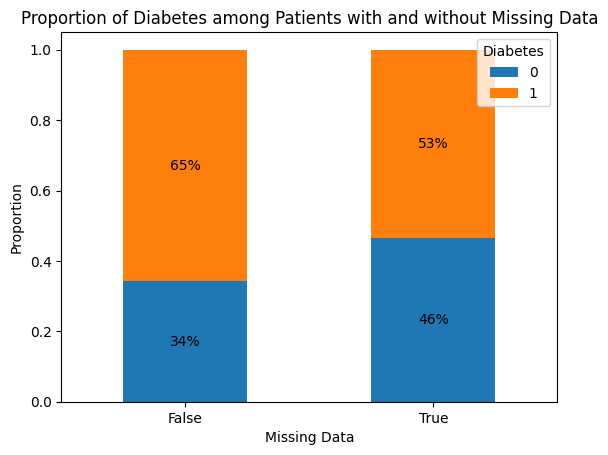

<Figure size 800x600 with 0 Axes>

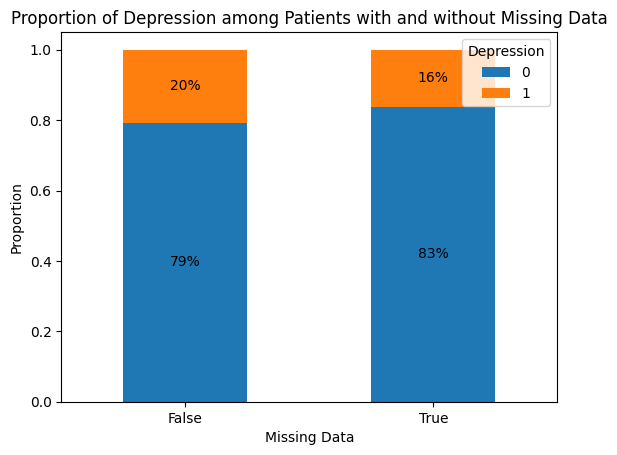

<Figure size 800x600 with 0 Axes>

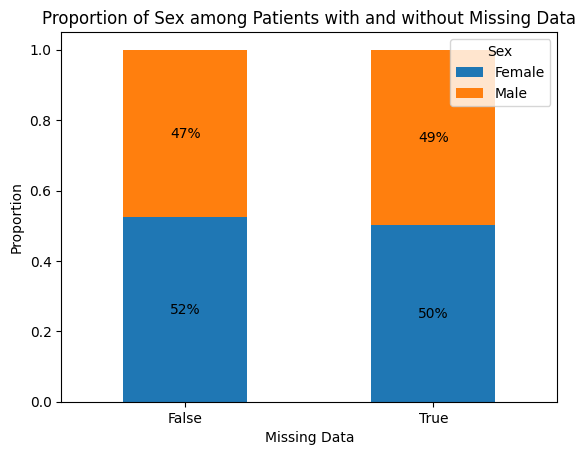

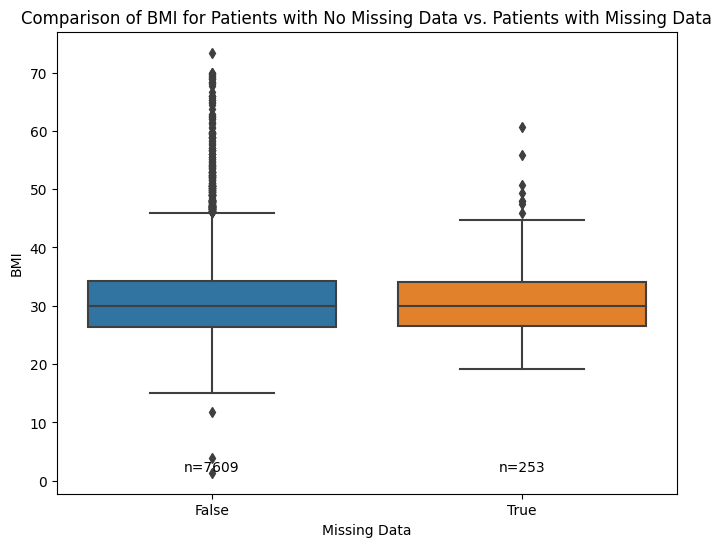

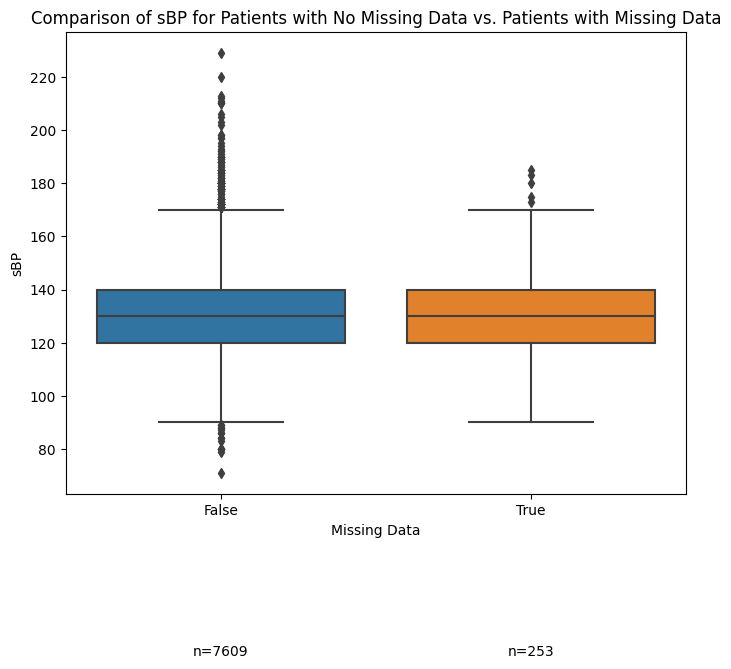

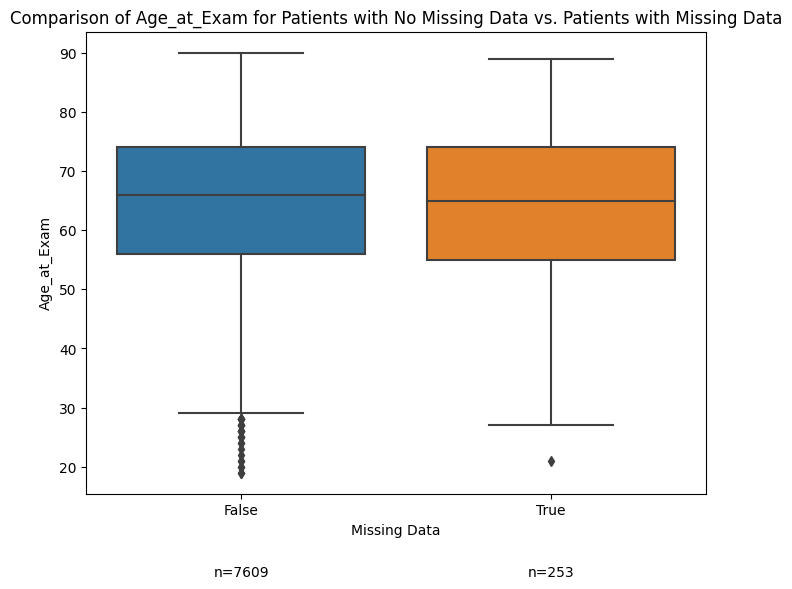

In [ ]:
# Create a new column to indicate whether a row has missing data (defined as having missing data for at least 1 variable)
data['Has_Missing_Data'] = data.isnull().any(axis=1)

# Columns to compare
cont_var = ['BMI', 'sBP', 'Age_at_Exam']
prop_var = ['Diabetes', 'Depression', 'Sex']

# Proportion of patients with diabetes and other categorical variables
for var in prop_var:
    plt.figure(figsize=(8, 6))
    prop_data = data.groupby(['Has_Missing_Data', var]).size().unstack()
    prop_data = prop_data.div(prop_data.sum(axis=1), axis=0)  # Calculate proportions
    prop_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], rot=0)

    # Add counts as annotations to the bars
    for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        plt.text(x + width / 2, y + height / 2, f'{int(height * 100)}%', ha='center', va='center')

    plt.title(f'Proportion of {var} among Patients with and without Missing Data')
    plt.xlabel('Missing Data')
    plt.ylabel('Proportion')
    plt.legend(title=var, loc='upper right')
    plt.show()

# Side-by-side boxplots for continuous variables
for var in cont_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Has_Missing_Data', y=var, data=data)

    # Add counts as annotations above the boxes
    counts = data.groupby('Has_Missing_Data').size().values
    for i, count in enumerate(counts):
        plt.text(i, 1.02, f'n={count}', ha='center', va='bottom')

    plt.title(f'Comparison of {var} for Patients with No Missing Data vs. Patients with Missing Data')
    plt.xlabel('Missing Data')
    plt.ylabel(var)
    plt.show()

SEQUENTIAL DATA

In [ ]:
# Calculate number of patients with sequential records

# Create a new column 'Consecutive_Count' to store the consecutive count for each patient ID
data['Consecutive_Count'] = data.groupby('Patient_ID').cumcount() + 1

# Count the occurrences of patient IDs with multiple records
patient_id_counts = data['Patient_ID'].value_counts()

# Count the occurrences of unique IDs for each sequential count
result = patient_id_counts.value_counts().sort_index(ascending=False)

# Display the result with title
print("Number of Sequences, Number of IDs")
for count, num_ids in result.items():
    print(f"{count}, {num_ids}")


# Calculate the result for (>= 2 sequences)
result_greater_than_2 = (8*2) + (7*2) + (6*3) + (5*9) + (4*28) + (3*154) + (2*764)

# Calculate the result for (all data)
result_all_data = (8*2) + (7*2) + (6*3) + (5*9) + (4*28) + (3*154) + (2*764) + (5667)

# Print the results with labels
print("Result for (>= 2 sequences):", result_greater_than_2)
print("Result for (all data):", result_all_data)

Number of Sequences, Number of IDs
8, 2
7, 2
6, 3
5, 9
4, 28
3, 154
2, 764
1, 5667
Result for (>= 2 sequences): 2195
Result for (all data): 7862


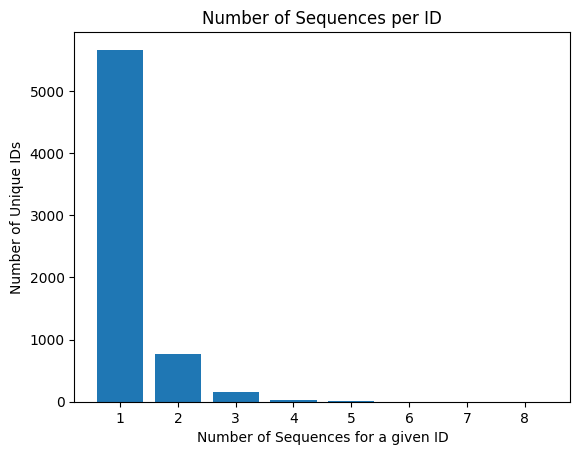

In [ ]:
# Plot the bar graph to show things visually
plt.bar(result.index, result.values, color='#1f77b4')
plt.xlabel('Number of Sequences for a given ID')
plt.ylabel('Number of Unique IDs')
plt.title('Number of Sequences per ID')
plt.show()

In [ ]:
# Print the dimension of the dataset
print(data.shape) # 7862, 70 - same as all data - everying accounted for!

(7862, 70)


In [ ]:
# Calculate number of patients with sequential records

# Count the occurrences of patient IDs with multiple records
patient_id_counts = data['Patient_ID'].value_counts()

# Count the occurrences of unique IDs for each sequential count
result = patient_id_counts.value_counts().sort_index(ascending=False)

# Get the sum of IDs that have 2 or more rows of data
sum_ids_2_or_more = result[result.index >= 2].sum()

print("Sum of IDs with 2 or more rows of data:", sum_ids_2_or_more)

# Filter only the IDs with 2 or more rows
ids_2_or_more = patient_id_counts[patient_id_counts >= 2].index

# Create a mask to select rows with those IDs
mask = data['Patient_ID'].isin(ids_2_or_more)

# Get the total number of rows associated with patients who have 2 or more rows
total_rows_2_or_more = len(data[mask])

# Print the total number of rows associated with patients with 2 or more rows
print("Total number of rows associated with patients with 2 or more rows:", total_rows_2_or_more)

Sum of IDs with 2 or more rows of data: 962
Total number of rows associated with patients with 2 or more rows: 2195


In [ ]:
# Drop the newly created columns used for the descriptive analysis
data = data.drop(['Has_Missing_Data', 'Consecutive_Count'], axis=1)

## Section B2 - Data Representativity

In [ ]:
# Distribution and Representativity of Data

# Using groupby to calculate the average age by gender
avg_age_by_sex = data.groupby('Sex')['Age_at_Exam'].mean().reset_index()

# Create an interactive donut chart
fig_donut = px.pie(avg_age_by_sex, names='Sex', values='Age_at_Exam', title='Average Age by Gender', hole=0.5)

# Customizing the color and theme
fig_donut.update_traces(textinfo='percent+label', pull=[0, 0], marker=dict(colors=['#82153d', '#0d7b94']))
fig_donut.update_layout(template="plotly_white")

# Show the plot
fig_donut.show(renderer="colab")

# Distribution of Age by Gender
fig_box = px.box(data, x='Sex', y='Age_at_Exam', title='Box Plot of Age Grouped by Gender',
                 color='Sex', points="outliers", color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show()

In [ ]:
counts = data['Diabetes2'].value_counts()

# Define your color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Pre-Diabetes (1) and Diabetes (2)',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes Status'
    ),
    title=dict(
        text='Distribution of Pre-Diabetes (1) and Diabetes (2)',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
counts = data['Depression'].value_counts()

# Define colour
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in "Depression"',
    color_discrete_sequence=colors  # apply colours
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Depression'
    ),
    title=dict(
        text='Distribution of Classes in "Depression (1=Yes)',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
# Group the data by the "depression" variable
grouped_data = data.groupby('Depression')

variables = ["A1c"]

# Calculate summary statistics for each group
summary_stats_depres = grouped_data[variables].agg(['mean', 'std', 'min', 'max'])

print(summary_stats_depres)

# no significant differences between groups when stratified by outcome of interest

                 A1c                     
                mean       std  min   max
Depression                               
0           6.519864  0.940578  4.4  14.3
1           6.451056  0.921603  4.8  13.8


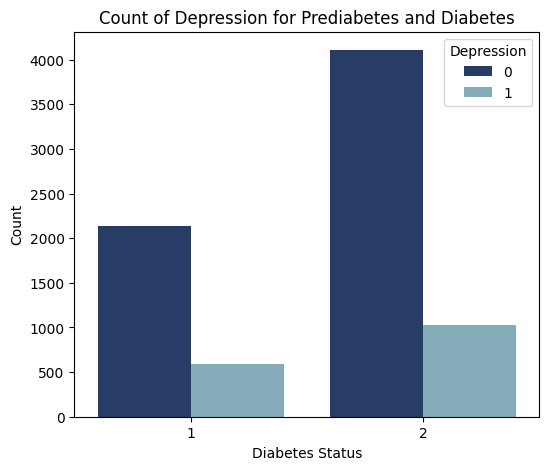

In [ ]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Diabetes2', hue='Depression', palette=colors)

plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Depression for Prediabetes and Diabetes')
plt.legend(title='Depression')
plt.show()

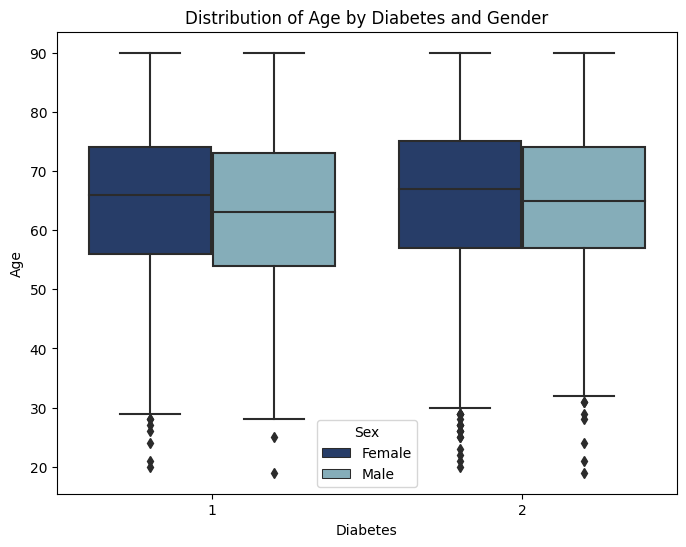

In [ ]:
# Define a custom color palette
custom_palette = ['#1c3a73', '#7cb1c2']

# Create the boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Diabetes2', y='Age_at_Exam', hue='Sex', palette=custom_palette)

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Distribution of Age by Diabetes and Gender')

# Show the plot
plt.show()

## Section B3 - Taking a Closer Look at Continous Variables

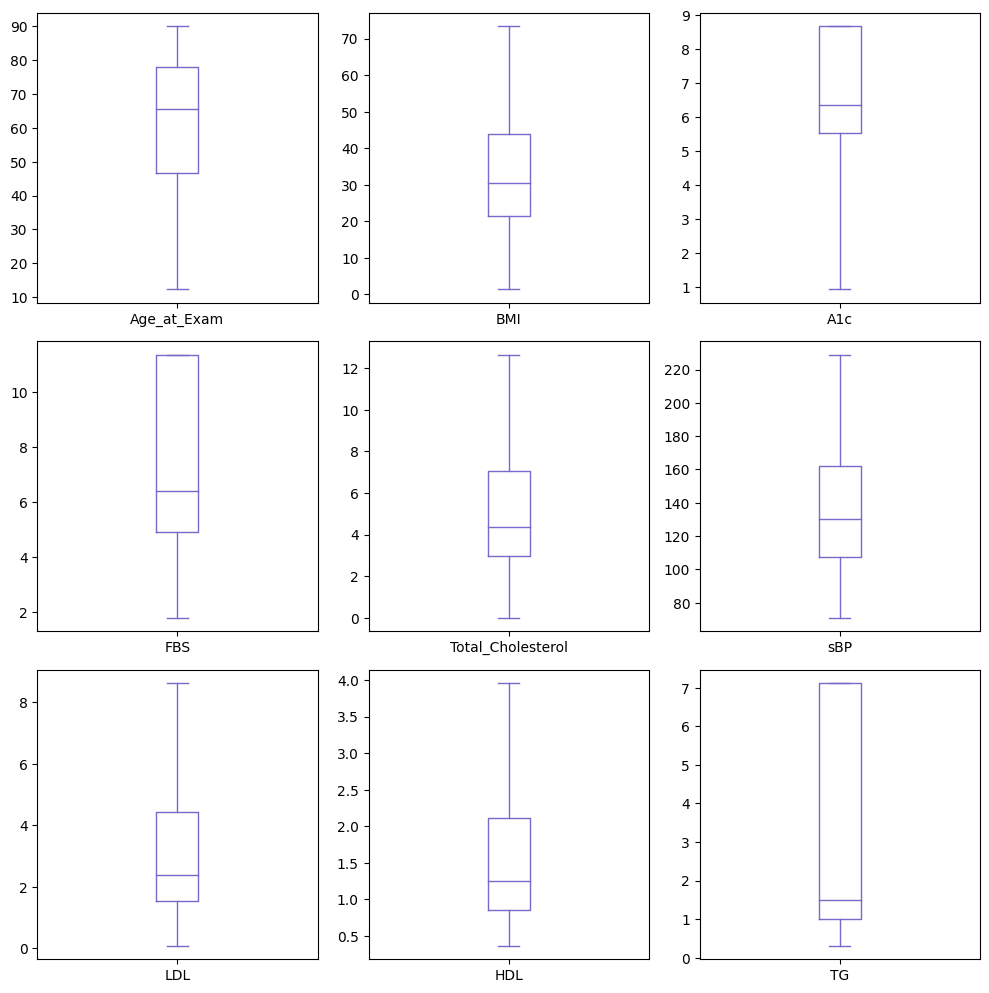

In [ ]:
# Specify the continuous variables to include
continuous_variables = ['Age_at_Exam', 'BMI', 'A1c', 'FBS', 'Total_Cholesterol', 'sBP', 'LDL', 'HDL', 'TG']

# Plot boxplots
description[continuous_variables].plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 10), color='#7569c9', sym='')
plt.tight_layout()
plt.show()


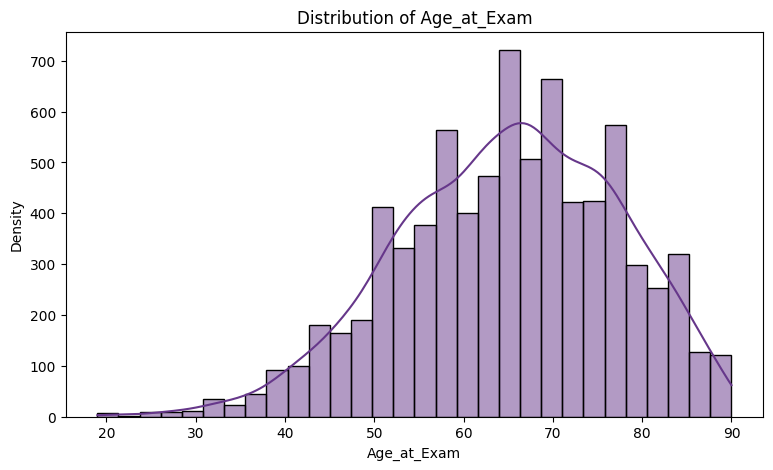

<Figure size 900x500 with 0 Axes>

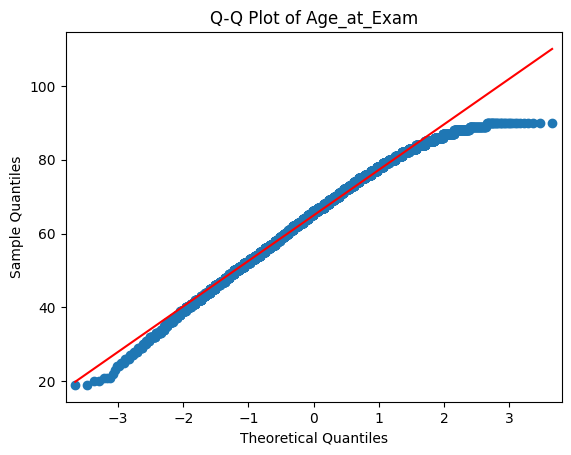

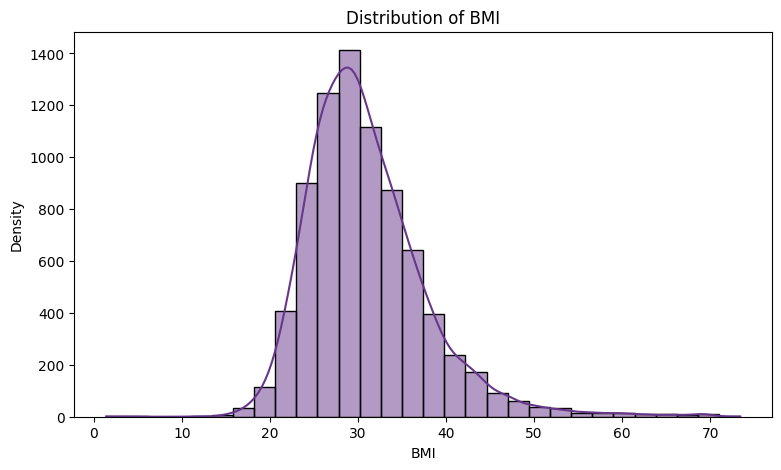

<Figure size 900x500 with 0 Axes>

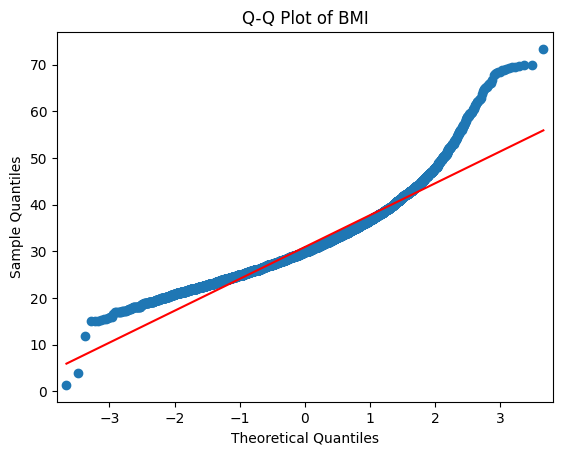

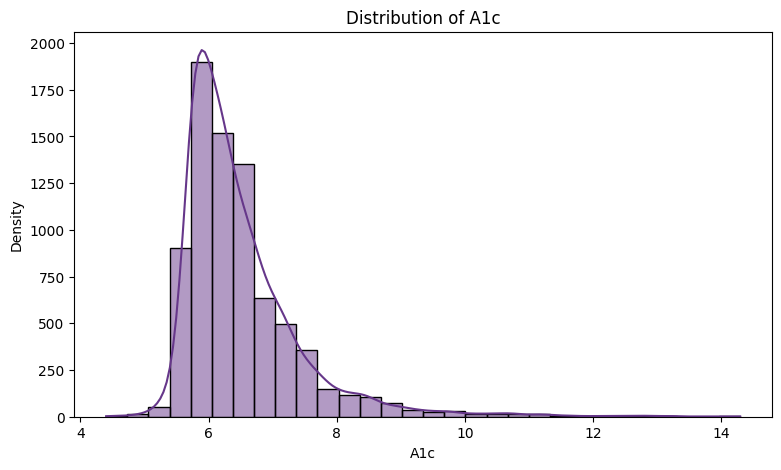

<Figure size 900x500 with 0 Axes>

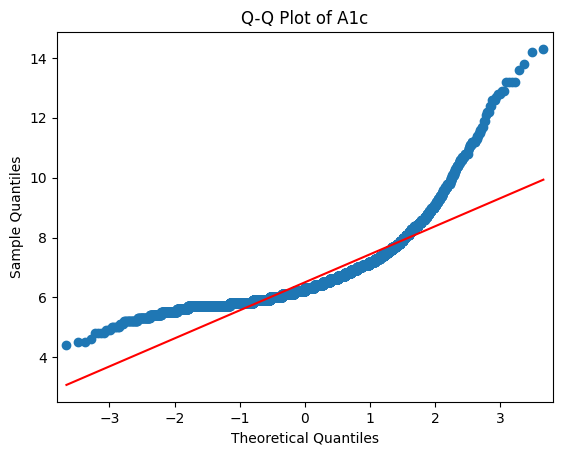

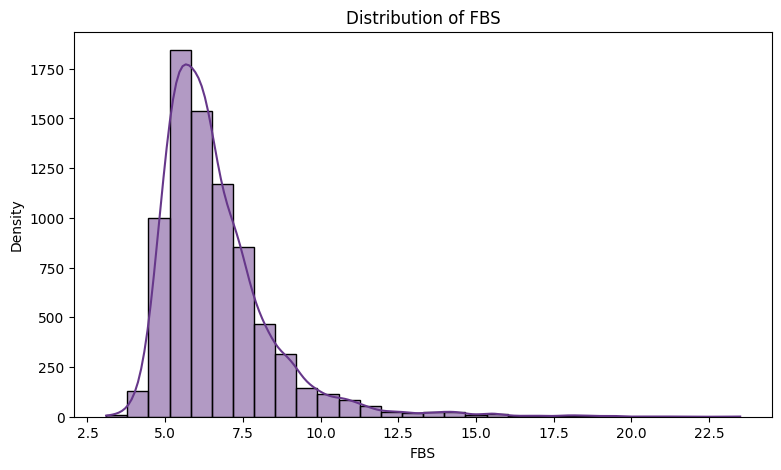

<Figure size 900x500 with 0 Axes>

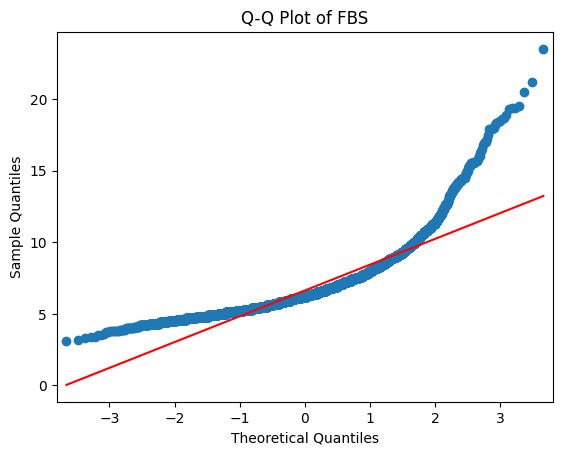

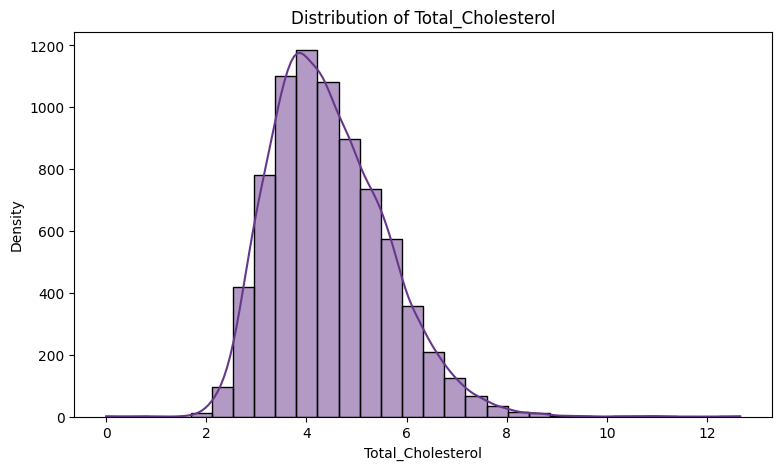

<Figure size 900x500 with 0 Axes>

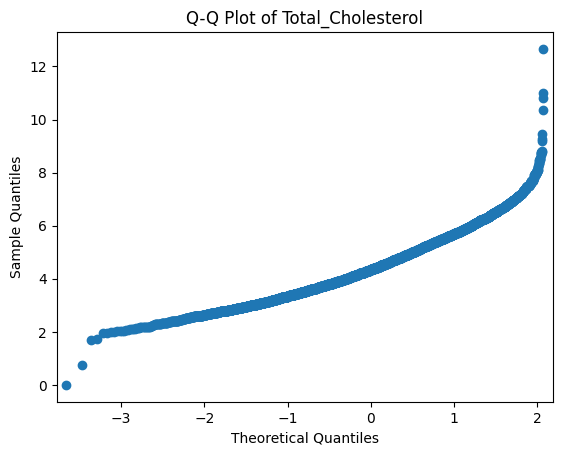

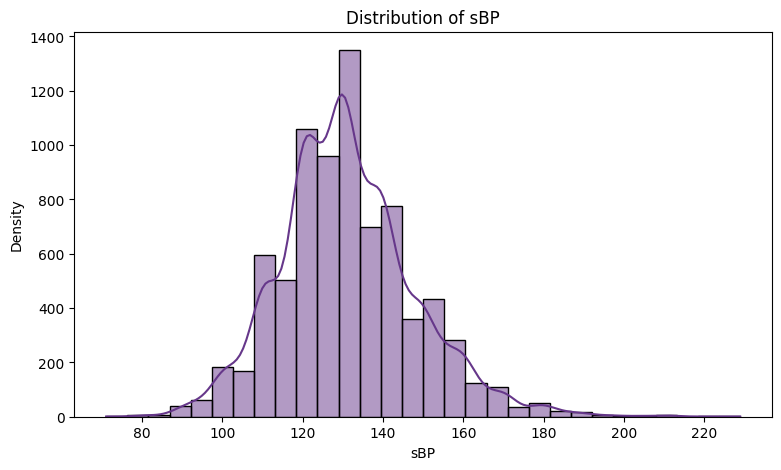

<Figure size 900x500 with 0 Axes>

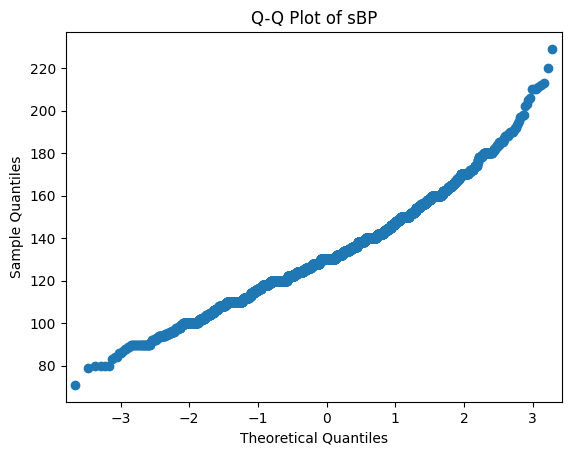

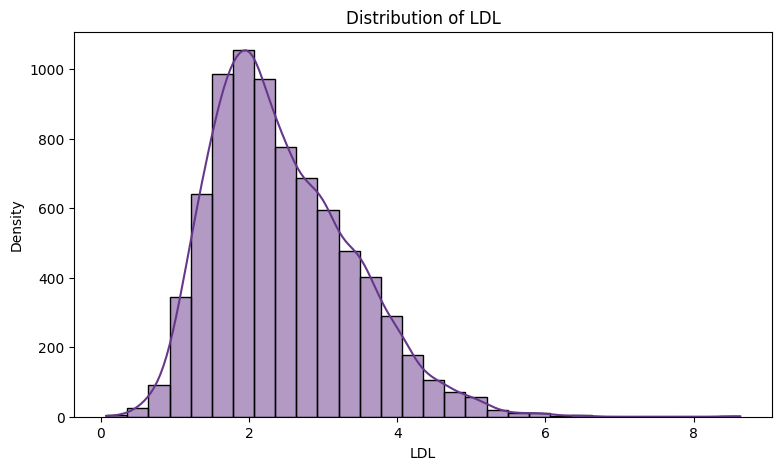

<Figure size 900x500 with 0 Axes>

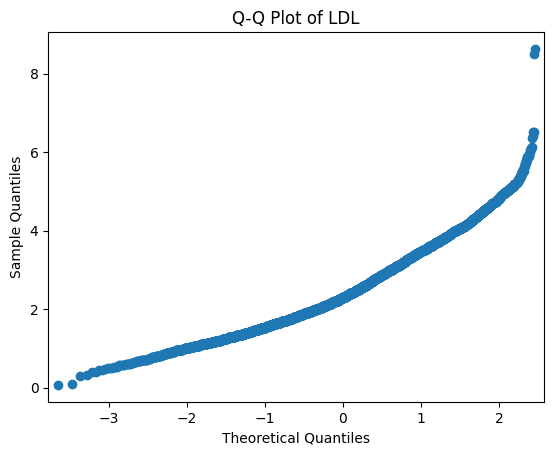

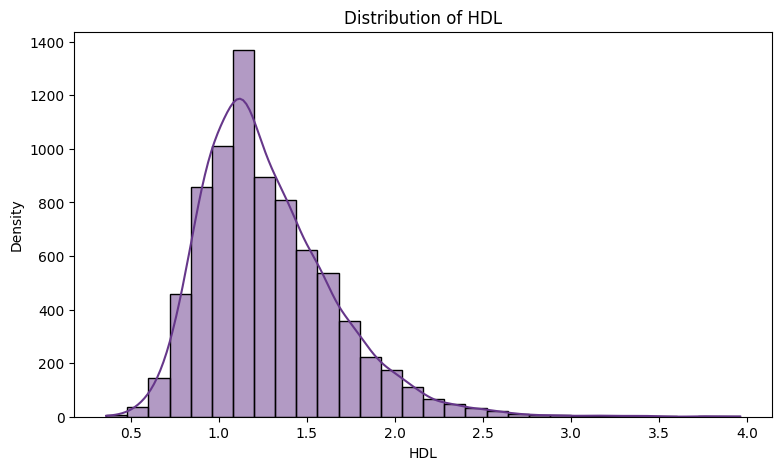

<Figure size 900x500 with 0 Axes>

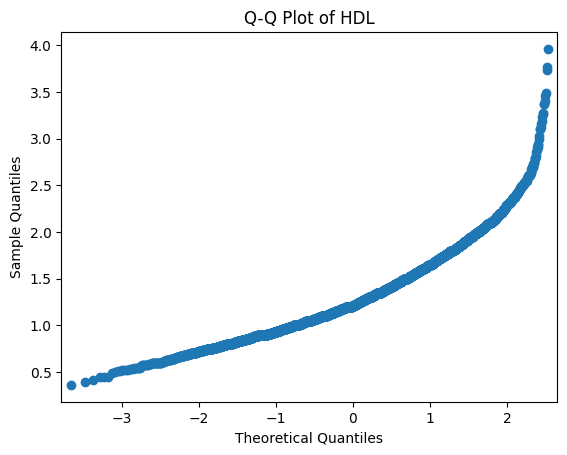

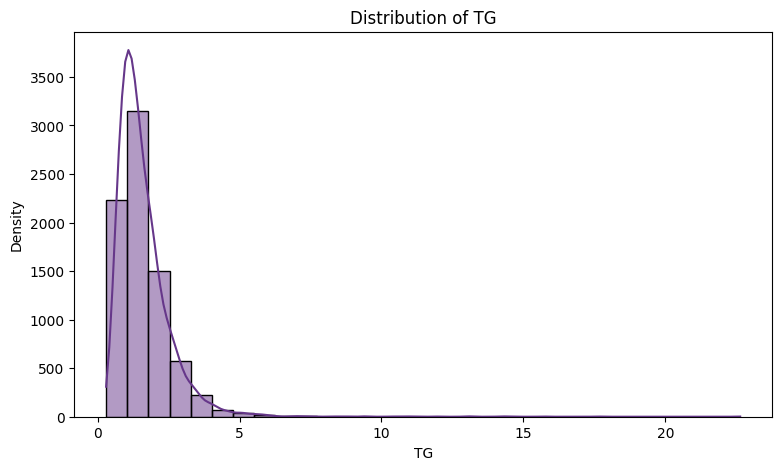

<Figure size 900x500 with 0 Axes>

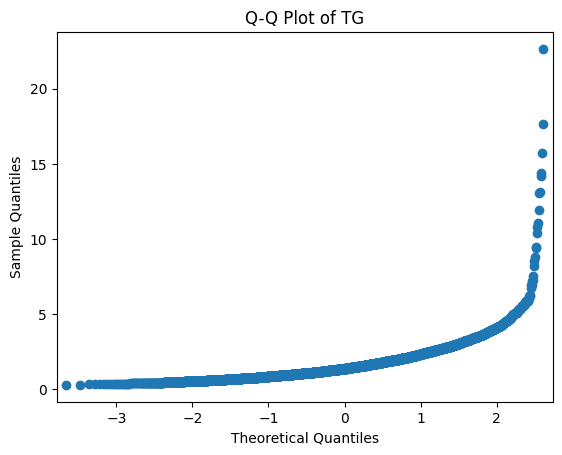

In [ ]:
for variable in continuous_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(9, 5))

    # Histogram with a smoothed line (kernel density estimate)
    sns.histplot(data[variable], bins=30, kde=True, color='#66378a')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(9, 5))
    sm.qqplot(data[variable], line='s', color='#66378a')
    plt.title(f'Q-Q Plot of {variable}')
    plt.show()

<Figure size 900x500 with 0 Axes>

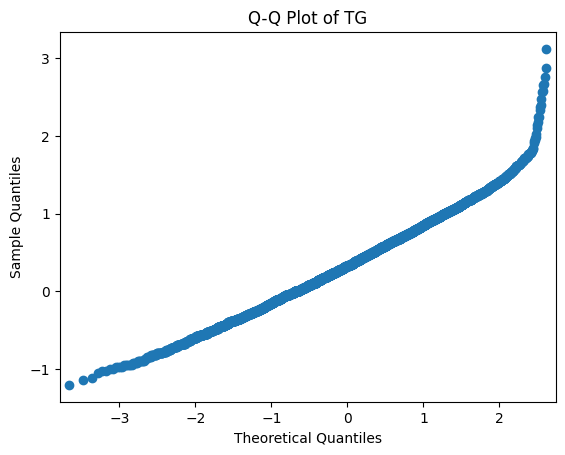

In [ ]:
continuous_log = ['TG']

data_norm = data  # Create a copy of the original data

# Re-express data as log, made loop in case we need to transofrom other vars in future
for var in continuous_log:
    data_norm[var] = np.log(data_norm[var])

##qq plots
for var in continuous_log:


    plt.figure(figsize=(9, 5))
    sm.qqplot(data_norm[var], line='s', color='#66378a')
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

data_norm.head()

#link back to main data - SWITCH
data = data_norm

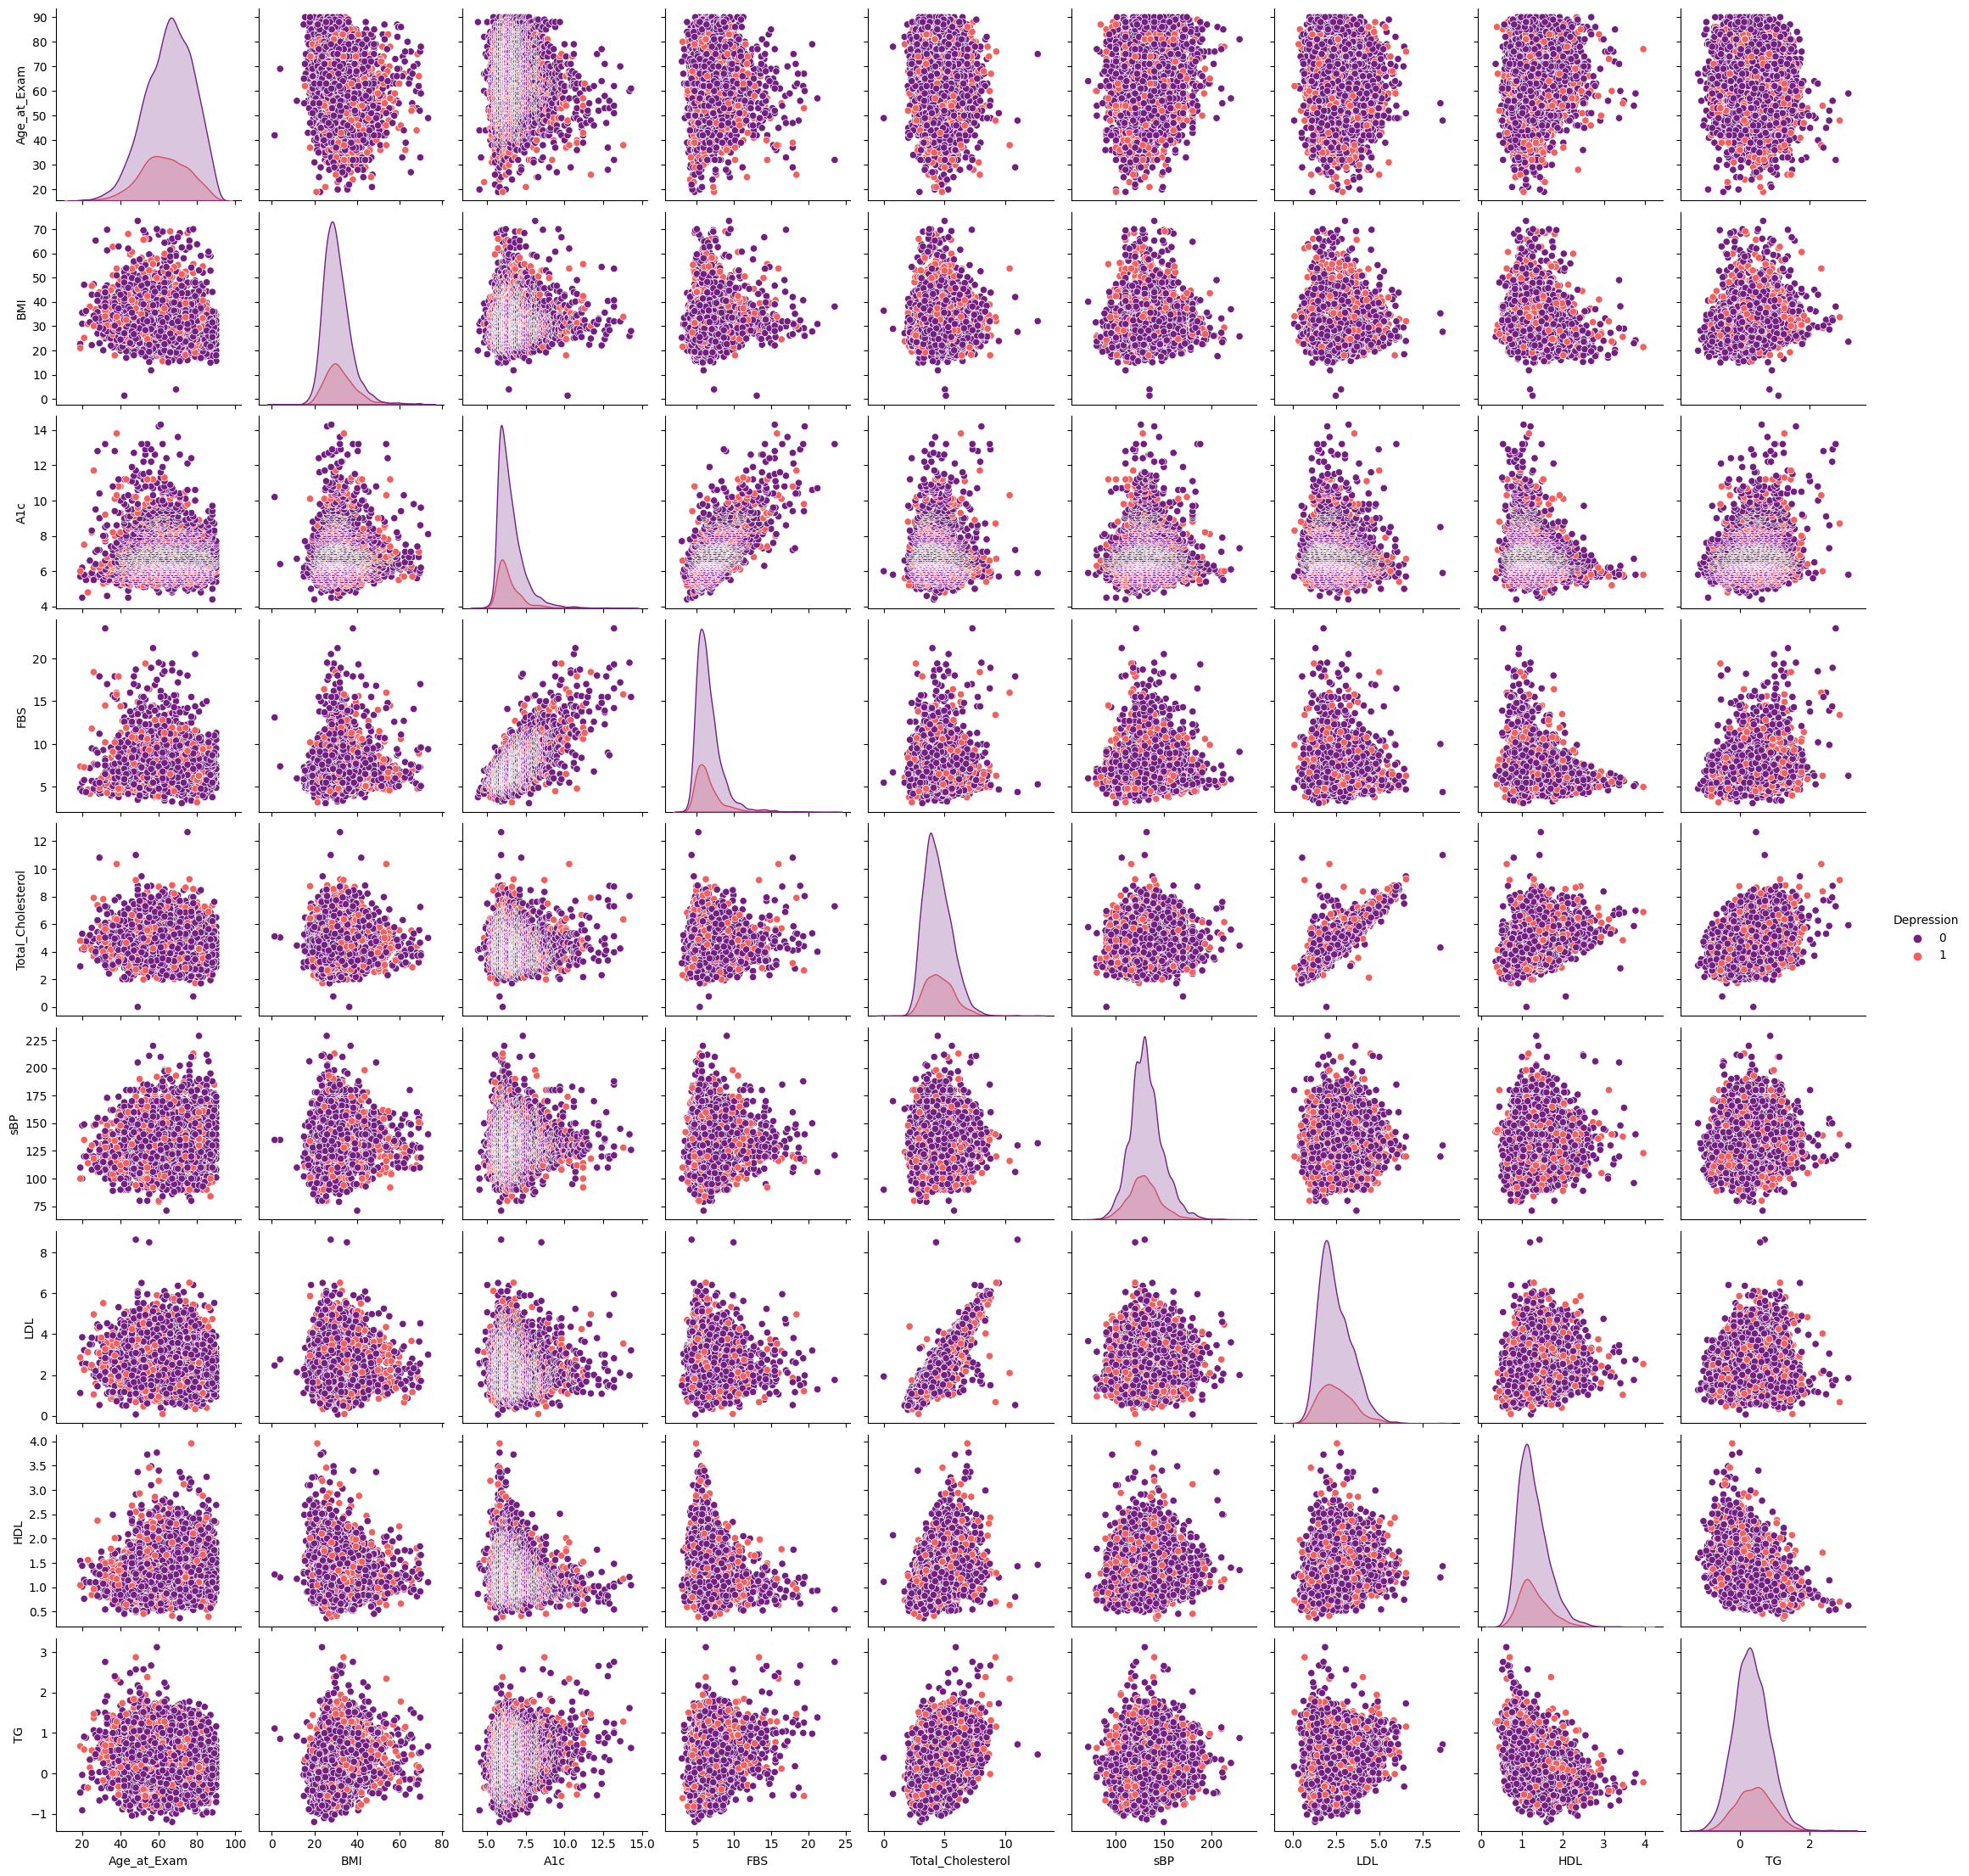

In [ ]:
#TEMPORARILY HIDE TO CODE RUNS FASTER WHEN SWITCHING USERS

# Subset the data to include only the specified continuous variables
pairwise_df = data[continuous_variables + ['Depression']]

# Create a pairwise plot
sns.pairplot(pairwise_df, hue='Depression', palette="magma")
plt.show()

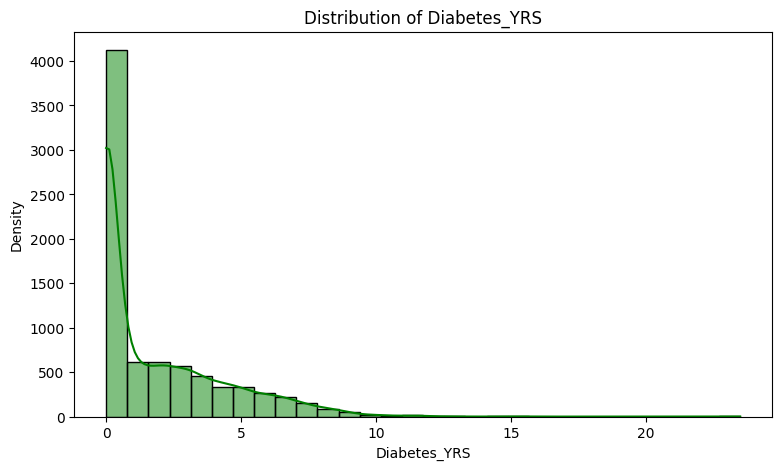

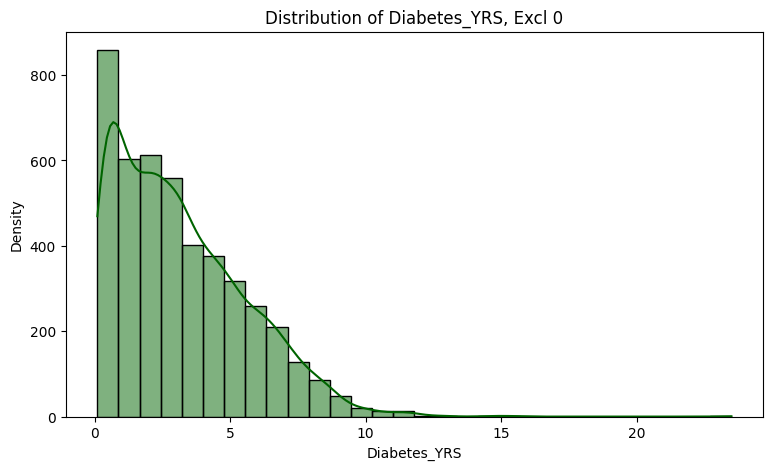

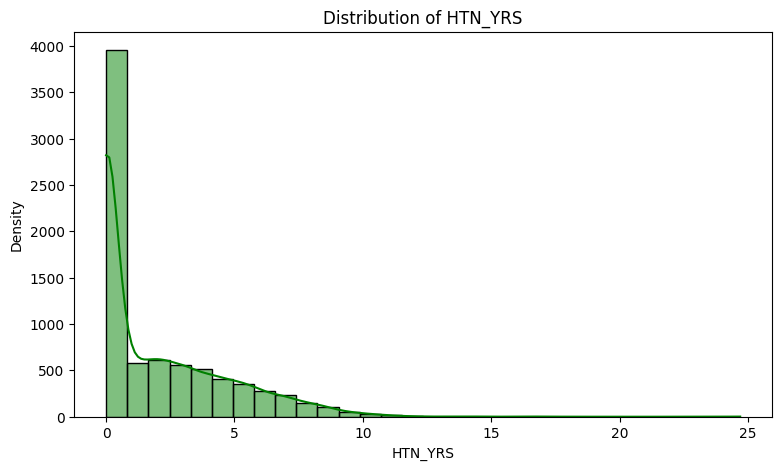

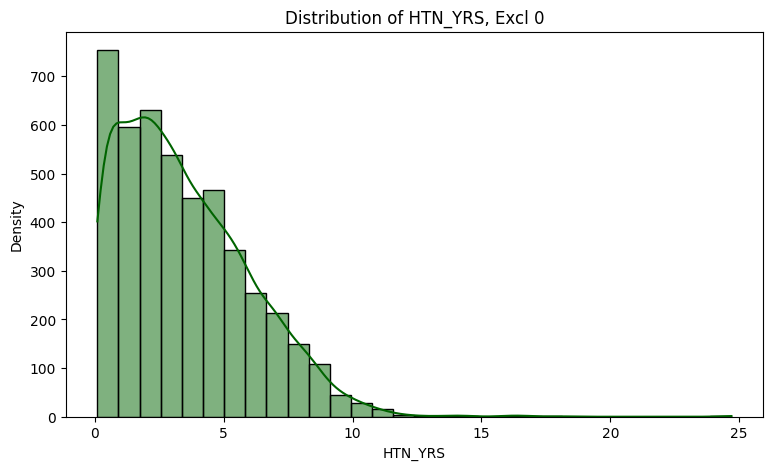

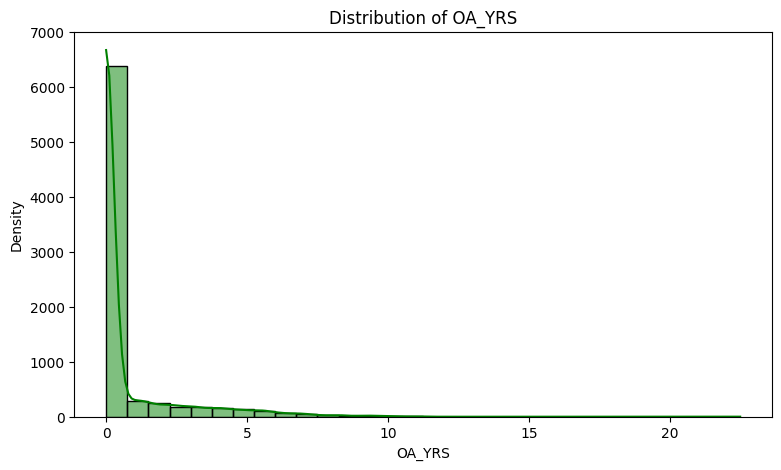

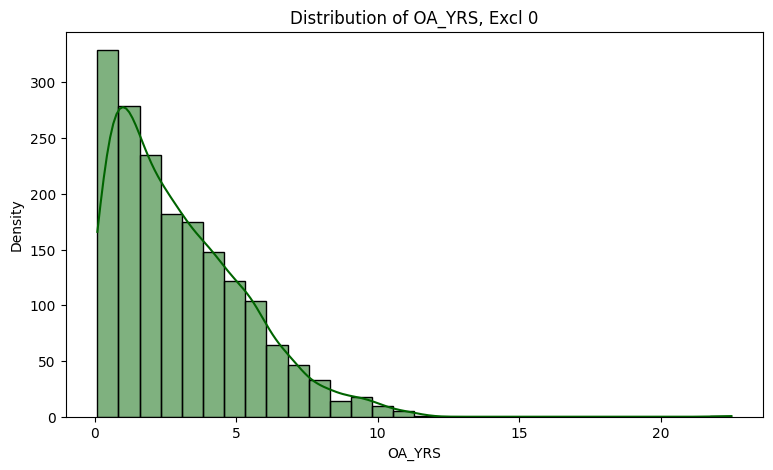

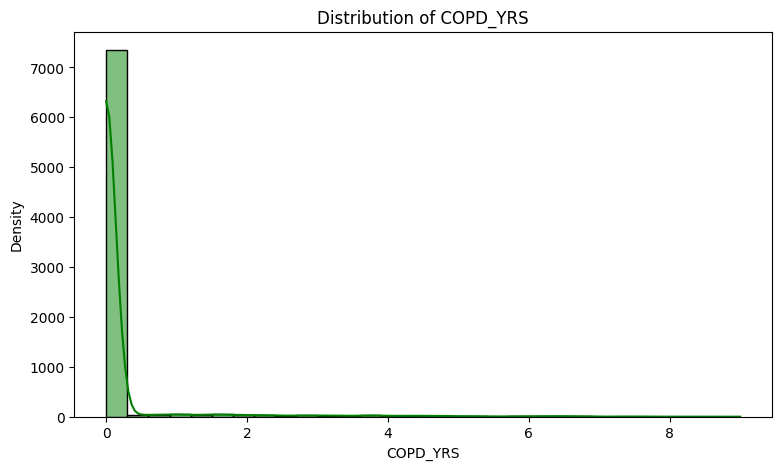

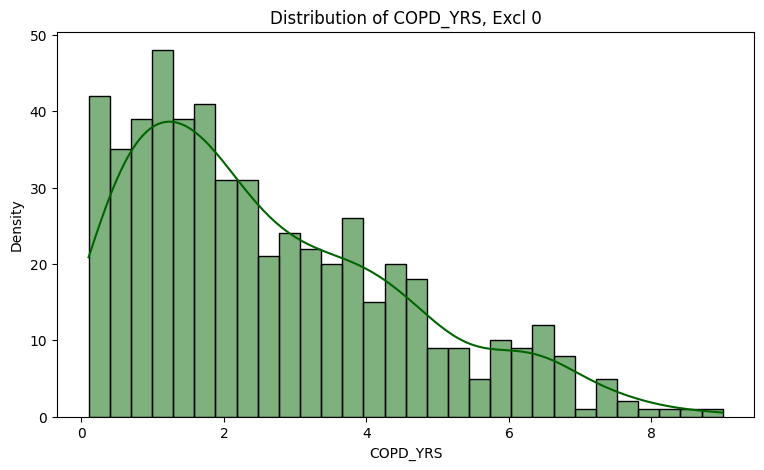

In [ ]:
conditiontime_variables = ["Diabetes_YRS", "HTN_YRS", "OA_YRS", "COPD_YRS"]


for variable in conditiontime_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(9, 5))
    # Histogram with a smoothed line (kernel density estimate)
    sns.histplot(data[variable], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

    # Create a new figure - without 0
    plt.figure(figsize=(9, 5))
    # Filter the data to exclude values equal to 0
    filtered_data = data[data[variable] > 0]
    # Histogram of the filtered data
    sns.histplot(filtered_data[variable], bins=30, kde=True, color='darkgreen')
    plt.title(f'Distribution of {variable}, Excl 0')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

## Section B4 - Taking a Closer Look at Categorical Variables

In [ ]:
### FREQUENCY AMONG CATEGORICAL VARIABLES

# Cat var
categorical = ["Diabetes", "Depression", "HTN", "OA", "COPD"]

# Def colours
colors = ['#1c3a73', '#7cb1c2']

# Overall - both sexes
yes, no = np.zeros(len(categorical)), np.zeros(len(categorical))

for c in categorical:
   yes[categorical.index(c)] = np.sum(data[c] == 1)
   no[categorical.index(c)] = np.sum(data[c] == 0)

fig = px.bar(x=categorical, y=[no, yes], labels={'x': 'Attribute', 'y': 'Number of Patients'},
             title="Categorical Comorbidity Variables - Overall", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

# By Diabetes
cat_no_diabetes = data.loc[data["Diabetes"] == 0]
cat_diabetes = data.loc[data["Diabetes"] == 1]

cat_no_diabetes_counts = cat_no_diabetes[categorical].apply(pd.value_counts).T
cat_diabetes_counts = cat_diabetes[categorical].apply(pd.value_counts).T

fig = px.bar(cat_no_diabetes_counts, barmode='stack', title="Categorical Variables by Diabetes Status: Pre-Diabetes", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

fig = px.bar(cat_diabetes_counts, barmode='stack', title="Categorical Variables by Diabetes Status: Diabetes", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

# By Depression
cat_no_depression = data.loc[data["Depression"] == 0]
cat_depression = data.loc[data["Depression"] == 1]

cat_no_depression_counts = cat_no_depression[categorical].apply(pd.value_counts).T
cat_depression_counts = cat_depression[categorical].apply(pd.value_counts).T

fig = px.bar(cat_no_depression_counts, barmode='stack', title="Categorical Variables by Depression Status: No Depression", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

fig = px.bar(cat_depression_counts, barmode='stack', title="Categorical Variables by Depression Status: Depression", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

#all have count at least 5


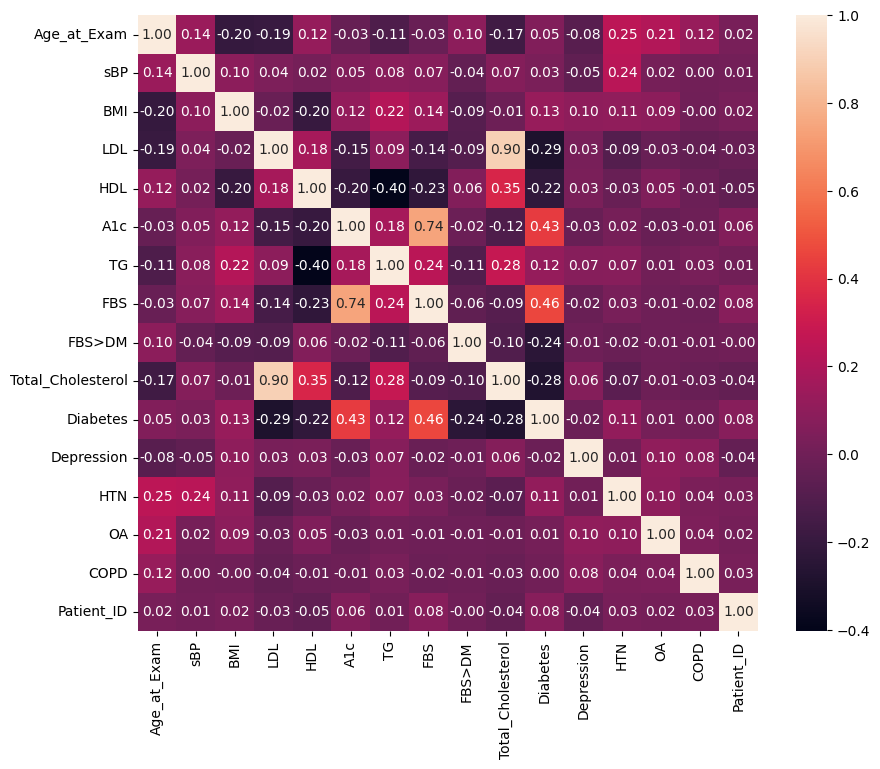

In [ ]:
# Exclude variables that start with 'HTRX_' or 'CSRX_', end with '_YRS', and 'Diabetes2'
filtered_data = data.loc[:, ~data.columns.str.startswith('HTRX_') & ~data.columns.str.startswith('CSRX_') & ~data.columns.str.endswith('_YRS') & (data.columns != 'Diabetes2')]

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

#LDL is correlated with cholesterol, A1c is correlated with Fasting Blood Sugar (FBS)
#we will pick *LDL over cholesterol as it appears to be more frequently collected in clinic (may reduce potential training-serving skew)
#Both A1C and FBS do not have missing data, so we will select *A1c vs FBS solely due to its utility as a marker of bloood sugar conrol in past 3 months

In [ ]:
#ADDRESSING HIGH CO-LINEARITY
#as mentioned above, these were co-linear, as these values are also expected to be co-linear (clinically), we will remove one from each pair
data.drop(['FBS', 'Total_Cholesterol'], axis=1, inplace=True)

#will also drop the diabetes 2 variable since it infers the same infromation as the Diabetes variable
data.drop(['Diabetes2'], axis=1, inplace=True)

In [ ]:
data.head()

Age_at_Exam    sBP        BMI   LDL   HDL  A1c        TG  FBS>DM  \
2138           75  154.0  27.000000  2.35  1.59  5.7  0.270027       1   
2139           46  110.0  21.000000  2.56  1.35  5.7 -0.116534       1   
2140           57  110.0  27.475629  4.20  2.55  5.7 -0.342490       1   
2141           44  110.0  35.000000  3.72  1.15  5.7  0.048790       1   
2142           45  116.0  29.000000  3.66  1.56  5.7 -0.210721       1   

      Diabetes  Depression  HTN  OA  COPD     Sex        Patient_ID  \
2138         0           0    1   1     0  Female  4001000000288198   
2139         0           1    0   0     1  Female  4001000000290369   
2140         0           0    1   1     0  Female  4001000000291156   
2141         0           0    0   0     0    Male  4001000000291570   
2142         0           0    1   0     0  Female  4001000000288296   

      HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  HTRX_ATENOLOL  \
2138                0               0                1              0   
2139                0               0                0              0   
2140                0               0                0              0   
2141                0               0                0              0   
2142                0               0                0              0   

      HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  HTRX_CARVEDILOL  \
2138                0                0                 0                0   
2139                0                0                 0                0   
2140                0                0                 0                0   
2141                0                0                 0                0   
2142                0                0                 0                0   

      HTRX_CILAZAPRIL  HTRX_DILTIAZEM  HTRX_DIURETIC  HTRX_DOXAZOSIN  \
2138                0               0              1               0   
2139                0               0              0               0   
2140                0               0              0               0   
2141                0               0              0               0   
2142                0               0              1               0   

      HTRX_ENALAPRIL  HTRX_EPROSARTAN  HTRX_FELODIPINE  HTRX_FOSINOPRIL  \
2138               0                0                0                0   
2139               0                0                0                0   
2140               0                0                0                0   
2141               0                0                0                0   
2142               0                0                0                0   

      HTRX_FUROSEMIDE  HTRX_HYDROCHLOROTHIAZIDE  HTRX_IRBESARTAN  \
2138                0                         0                0   
2139                0                         0                0   
2140                0                         1                0   
2141                0                         0                0   
2142                0                         1                0   

      HTRX_LABETALOL  HTRX_LISINOPRIL  HTRX_LOSARTAN  HTRX_METOPROLOL  \
2138               0                0              1                0   
2139               0                0              0                0   
2140               0                0              0                0   
2141               0                0              0                0   
2142               0                0              0                0   

      HTRX_NADOLOL  HTRX_NIFEDIPINE  HTRX_OLMESARTAN MEDOXOMIL  \
2138             0                0                          0   
2139             0                0                          0   
2140             0                0                          0   
2141             0                0                          0   
2142             0                0                          0   

      HTRX_PERINDOPRIL  HTRX_POTASSIUM-SPARING AGENTS  HTRX_PROPRANOLOL  \
2138                 0      

# Section C - Feature Engineering pt 2 K-means Clustering: Medication Groups

Cluster medication profiles for HTN and Corticosteroids - All Patients

In [ ]:
# Convert sex variable to 1 and 0
data['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [ ]:
# from sklearn.metrics import pairwise_distances
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# htrx_csrx_variables = [col for col in data.columns if col.startswith('HTRX') or col.startswith('CSRX')]

# print(htrx_csrx_variables)
# print(len(htrx_csrx_variables))

# binary_data = data[htrx_csrx_variables].to_numpy()

# # Calculate the Hamming distance matrix
# hamming_distance = pairwise_distances(binary_data, metric='hamming')

# # Elbow method to determine the optimal number of clusters (K)
# distortions = []
# K_range = range(1, 30)  # grid search
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(hamming_distance)
#     distortions.append(kmeans.inertia_)

# # Plot the elbow plot to visualize the optimal K
# plt.figure(figsize=(8, 6))
# plt.plot(K_range, distortions, marker='o')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion')
# plt.grid(True)
# plt.show()


['HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN', 'HTRX_AMLODIPINE', 'HTRX_ATENOLOL', 'HTRX_BENAZEPRIL', 'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN', 'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC', 'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN', 'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LABETALOL', 'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL', 'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL', 'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL', 'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE', 'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL', 'HTRX_VALSARTAN', 'HTRX_VERAPAMIL', 'CSRX_ANTIBIOTICS', 'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE', 'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISOLONE', 'CSRX_PREDNISONE']
45


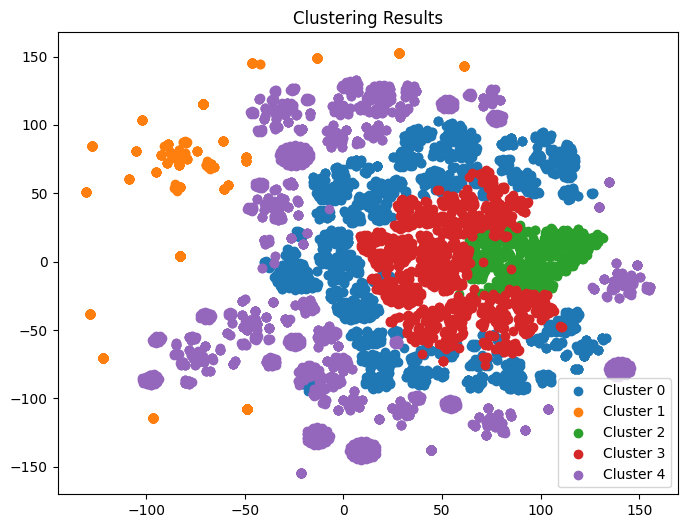

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

htrx_csrx_variables = [col for col in data.columns if col.startswith('HTRX') or col.startswith('CSRX')]

print(htrx_csrx_variables)
print(len(htrx_csrx_variables))

binary_data = data[htrx_csrx_variables].to_numpy()

# Calculate the Hamming distance matrix
hamming_distance = pairwise_distances(binary_data, metric='hamming')

# Apply K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(hamming_distance)

# Visualize the clustering results using a scatter plot (you may choose a suitable projection technique)
# Example: Using t-SNE for visualization (you need to import it)
from sklearn.manifold import TSNE

# Reduce dimensionality for visualization (adjust the number of components as needed)
tsne = TSNE(n_components=2, random_state=0)
projected_data = tsne.fit_transform(hamming_distance)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(projected_data[labels == i, 0], projected_data[labels == i, 1], label=f'Cluster {i}')
plt.title('Clustering Results')
plt.legend()
plt.show()

In [ ]:
data['Med_Cluster'] = labels
data.head(10)

Age_at_Exam    sBP        BMI   LDL   HDL  A1c        TG  FBS>DM  \
2138           75  154.0  27.000000  2.35  1.59  5.7  0.270027       1   
2139           46  110.0  21.000000  2.56  1.35  5.7 -0.116534       1   
2140           57  110.0  27.475629  4.20  2.55  5.7 -0.342490       1   
2141           44  110.0  35.000000  3.72  1.15  5.7  0.048790       1   
2142           45  116.0  29.000000  3.66  1.56  5.7 -0.210721       1   
2143           71  118.0  23.000000  2.96  1.48  5.7 -0.400478       1   
2144           67  130.0  30.000000  2.70  1.00  5.7  0.122218       1   
2145           30  118.0  37.000000  2.38  1.30  5.7  0.625938       1   
2146           56  124.0  26.000000  3.06  2.35  5.7 -0.544727       1   
2147           66  160.0  22.000000  3.70  2.17  5.7 -0.105361       1   

      Diabetes  Depression  HTN  OA  COPD  Sex        Patient_ID  \
2138         0           0    1   1     0    1  4001000000288198   
2139         0           1    0   0     1    1  4001000000290369   
2140         0           0    1   1     0    1  4001000000291156   
2141         0           0    0   0     0    0  4001000000291570   
2142         0           0    1   0     0    1  4001000000288296   
2143         0           1    1   1     0    0  4001000000293815   
2144         0           0    1   1     0    0  4001000000297216   
2145         0           1    0   0     0    1  4001000000293578   
2146         0           1    1   0     0    1  4001000000316429   
2147         0           0    0   0     0    1  4001000000314362   

      HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  HTRX_ATENOLOL  \
2138                0               0                1              0   
2139                0               0                0              0   
2140                0               0                0              0   
2141                0               0                0              0   
2142                0               0                0              0   
2143                0               0                0              0   
2144                0               0                0              0   
2145                0               0                0              0   
2146                0               0                0              0   
2147                0               0                0              0   

      HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  HTRX_CARVEDILOL  \
2138                0                0                 0                0   
2139                0                0                 0                0   
2140                0                0                 0                0   
2141                0                0                 0                0   
2142                0                0                 0                0   
2143                0                1                 0                0   
2144                0                0                 0                0   
2145                0                0                 0                0   
2146                0                0                 0                0   
2147                0                0                 0                0   

      HTRX_CILAZAPRIL  HTRX_DILTIAZEM  HTRX_DIURETIC  HTRX_DOXAZOSIN  \
2138                0               0              1               0   
2139                0               0              0               0   
2140                0               0              0               0   
2141                0               0              0               0   
2142                0               0              1               0   
2143                0               0              0               0   
2144                0               0              0               0   
2145                0               0              0               0   
2146                0               0              0               0   
2147                0               0              0               0  

# Section D: Splitting Data, Class Rebalancing, and Imputation - For All Models

**PIPELINE: (In Order That It Was Done)**

VARIABLE ENCODING


*   Convert Columns Counting Disease Years into rounded Integer (from float)
*   One Hot Encode Medication Cluster Variable

SPLIT DATA


*   80% Train, 20% Test
*   Y Label = Depression

IMPUTATION


*   Use MICE Imputation for variables with missing continous data, small % was missing and there was limited evidence of MAR during data exploration phase.

NORMALIZE DATA

ADDRESS CLASS IMBALANCE IN TRAINING SET


*   Random Undersampling of majority class with TomekLinks, then SMOTE Upsampling of minority class.










In [ ]:
# Create a copy of the data
data_processed = data.copy()

In [ ]:
# Convert years with condition into an ordinal variable - (count of years, integer)
# List of columns to round to the nearest whole number
columns_to_round = ['Diabetes_YRS', 'HTN_YRS', 'OA_YRS', 'COPD_YRS']

# Round the specified columns in the main dataset
data_processed[columns_to_round] = data_processed[columns_to_round].round()

# Ensure the specified columns are of integer type
data_processed[columns_to_round] = data_processed[columns_to_round].astype(int)

In [ ]:
data_processed = pd.get_dummies(data_processed, columns=['Med_Cluster'], prefix='Med_Cluster')

In [ ]:
print("Column Names:", data_processed.columns)

Column Names: Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS>DM',
       'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'Patient_ID',
       'HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN', 'HTRX_AMLODIPINE', 'HTRX_ATENOLOL',
       'HTRX_BENAZEPRIL', 'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN',
       'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC',
       'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN',
       'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE',
       'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LABETALOL',
       'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL',
       'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
       'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
       'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE',
       'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL',
       'HTRX_VALSARTAN', 'HTRX_VERAPAMIL', 'CSRX_ANTIBIOT

In [ ]:
label_column = ['Depression']
binary_columns = ['FBS>DM', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex',
                  'HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN', 'HTRX_AMLODIPINE', 'HTRX_ATENOLOL',
                  'HTRX_BENAZEPRIL', 'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN',
                  'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC',
                  'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN',
                  'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE',
                  'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LABETALOL',
                  'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL',
                  'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
                  'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
                  'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE',
                  'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL',
                  'HTRX_VALSARTAN', 'HTRX_VERAPAMIL', 'CSRX_ANTIBIOTICS',
                  'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE',
                  'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISOLONE', 'CSRX_PREDNISONE',]
med_clust_columns = ['Med_Cluster_0', 'Med_Cluster_1', 'Med_Cluster_2', 'Med_Cluster_3', 'Med_Cluster_4']
ordinal_columns = ['Diabetes_YRS', 'HTN_YRS', 'OA_YRS', 'COPD_YRS']
numeric_columns = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG']

#these are defined but will not be included after scaling - can be used for recursive model selection
id_columns = ['Patient_ID']
date_columns = ['OBS_DATE']

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data_processed' DataFrame
pd.set_option('display.max_rows', None) #set max rows
missing_value_counts = data_processed.isnull().sum()
missing_value_counts

# Calculate the percentage of missing values
total_values = len(data_processed)
percentage_missing = (missing_value_counts / total_values) * 100
percentage_missing

Age_at_Exam                      0.000000
sBP                              0.038158
BMI                              0.000000
LDL                              0.686848
HDL                              0.559654
A1c                              0.000000
TG                               0.432460
FBS>DM                           0.000000
Diabetes                         0.000000
Depression                       0.000000
HTN                              0.000000
OA                               0.000000
COPD                             0.000000
Sex                              0.000000
Patient_ID                       0.000000
HTRX_ACEBUTOLOL                  0.000000
HTRX_ALISKIREN                   0.000000
HTRX_AMLODIPINE                  0.000000
HTRX_ATENOLOL                    0.000000
HTRX_BENAZEPRIL                  0.000000
HTRX_BISOPROLOL                  0.000000
HTRX_CANDESARTAN                 0.000000
HTRX_CARVEDILOL                  0.000000
HTRX_CILAZAPRIL                  0

In [ ]:
# Calculate class imbalance for the target variable
class_imbalance = data_processed[label_column].value_counts()
total_samples = len(data_processed)

# Print class imbalance with percentage for the target variable
print("Class Imbalance for Depression (Label):")
for class_label, count in class_imbalance.items():
    percentage = (count / total_samples) * 100
    print(f"{class_label}: {count} samples ({percentage:.2f}%)")

Class Imbalance for Depression (Label):
(0,): 6242 samples (79.39%)
(1,): 1620 samples (20.61%)


In [ ]:
# Split the data into training and testing sets
# Model the data and select the value of lambda that maximizes discrimination
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = data_processed.drop(label_column, axis=1)
y = data_processed[label_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # ALTNERATIVE METHOD FOR IMPUTATION - MEAN VALUES FOR CONTINOUS VARIABLES - DEACTIVATED

# # Specify continuous variables
# continuous_variables_missing = ['sBP', 'LDL', 'HDL', 'TG']

# # Impute missing values for continuous variables with the mean
# data[continuous_variables_missing] = data[continuous_variables_missing].fillna(data[continuous_variables_missing].mean())

# # Check if there are any remaining missing values
# missing_values = data.isnull().sum()

# # Print the count of missing values for each column
# print(missing_values)

In [ ]:
# Data imputation after splitting to prevent data leakage, advanced imputation strategies will be utilized

from impyute.imputation.cs import mice

continuous_variables_missing = ['sBP', 'LDL', 'HDL', 'TG']

def mice_imputation(data, continuous_variables):
    # Copy the data to avoid modifying the original
    data_imputed = data.copy()

    # Extract the features with missing values
    features_with_missing = data_imputed[continuous_variables]

    # Perform MICE imputation
    imputed_values = mice(features_with_missing.values)

    # Assign the imputed values back to the DataFrame
    data_imputed[continuous_variables] = imputed_values

    return data_imputed


X_train_imputed = mice_imputation(X_train, continuous_variables_missing)
X_test_imputed = mice_imputation(X_test, continuous_variables_missing)

In [ ]:
# Check for missing values after MICE imputation on the training set
missing_value_counts_train = X_train_imputed.isnull().sum()

# Check for missing values after MICE imputation on the testing set
missing_value_counts_test = X_test_imputed.isnull().sum()

# Display the results
print("Missing Values in Training Set:")
print(missing_value_counts_train)

print("\nMissing Values in Testing Set:")
print(missing_value_counts_test)

Missing Values in Training Set:
Age_at_Exam                      0
sBP                              0
BMI                              0
LDL                              0
HDL                              0
A1c                              0
TG                               0
FBS>DM                           0
Diabetes                         0
HTN                              0
OA                               0
COPD                             0
Sex                              0
Patient_ID                       0
HTRX_ACEBUTOLOL                  0
HTRX_ALISKIREN                   0
HTRX_AMLODIPINE                  0
HTRX_ATENOLOL                    0
HTRX_BENAZEPRIL                  0
HTRX_BISOPROLOL                  0
HTRX_CANDESARTAN                 0
HTRX_CARVEDILOL                  0
HTRX_CILAZAPRIL                  0
HTRX_DILTIAZEM                   0
HTRX_DIURETIC                    0
HTRX_DOXAZOSIN                   0
HTRX_ENALAPRIL                   0
HTRX_EPROSARTAN        

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X_train_imputed' and 'X_test_imputed' are your DataFrames
# Assuming 'binary_columns', 'med_clust_columns', 'ordinal_columns', 'numeric_columns' are defined

# List of columns to scale
columns_to_scale = binary_columns + med_clust_columns + ordinal_columns + numeric_columns

# Extract the columns for scaling from the training data
X_train_to_scale = X_train_imputed[columns_to_scale]

# Extract the columns for scaling from the test data
X_test_to_scale = X_test_imputed[columns_to_scale]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_to_scale)

# Transform the test data
X_test_scaled = scaler.transform(X_test_to_scale)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale)


In [ ]:
X_train_scaled_df.head()

FBS>DM  Diabetes      HTN        OA      COPD       Sex  HTRX_ACEBUTOLOL  \
0  0.325952  0.720983  0.66416 -0.704494 -0.345309  0.957188        -0.081995   
1 -3.067939  0.720983  0.66416 -0.704494 -0.345309  0.957188        -0.081995   
2  0.325952 -1.386995  0.66416  1.419458 -0.345309  0.957188        -0.081995   
3 -3.067939  0.720983  0.66416  1.419458 -0.345309  0.957188        -0.081995   
4 -3.067939  0.720983  0.66416 -0.704494  2.895957  0.957188        -0.081995   

   HTRX_ALISKIREN  HTRX_AMLODIPINE  HTRX_ATENOLOL  HTRX_BENAZEPRIL  \
0       -0.068063        -0.559904       3.214270        -0.045512   
1       -0.068063        -0.559904      -0.311113        -0.045512   
2       -0.068063         1.786022      -0.311113        -0.045512   
3       -0.068063         1.786022      -0.311113        -0.045512   
4       -0.068063         1.786022      -0.311113        -0.045512   

   HTRX_BISOPROLOL  HTRX_CANDESARTAN  HTRX_CARVEDILOL  HTRX_CILAZAPRIL  \
0        -0.298652          5.042258        -0.112789        -0.082972   
1        -0.298652         -0.198324        -0.112789        -0.082972   
2         3.348380         -0.198324        -0.112789        -0.082972   
3        -0.298652         -0.198324        -0.112789        -0.082972   
4         3.348380         -0.198324         8.866092        -0.082972   

   HTRX_DILTIAZEM  HTRX_DIURETIC  HTRX_DOXAZOSIN  HTRX_ENALAPRIL  \
0       -0.259576      -0.462701       -0.102985       -0.196585   
1       -0.259576      -0.462701       -0.102985        5.086853   
2       -0.259576      -0.462701       -0.102985       -0.196585   
3       -0.259576      -0.462701       -0.102985       -0.196585   
4       -0.259576      -0.462701       -0.102985       -0.196585   

   HTRX_EPROSARTAN  HTRX_FELODIPINE  HTRX_FOSINOPRIL  HTRX_FUROSEMIDE  \
0        -0.047234        -0.097315        -0.097315        -0.343865   
1        -0.047234        -0.097315        -0.097315        -0.343865   
2        -0.047234        -0.097315        -0.097315        -0.343865   
3        -0.047234        -0.097315        -0.097315        -0.343865   
4        -0.047234        -0.097315        -0.097315         2.908117   

   HTRX_HYDROCHLOROTHIAZIDE  HTRX_IRBESARTAN  HTRX_LABETALOL  HTRX_LISINOPRIL  \
0                  1.590963        -0.302112       -0.066874        -0.195273   
1                 -0.628550        -0.302112       -0.066874        -0.195273   
2                  1.590963        -0.302112       -0.066874        -0.195273   
3                 -0.628550        -0.302112       -0.066874        -0.195273   
4                  1.590963        -0.302112       -0.066874        -0.195273   

   HTRX_LOSARTAN  HTRX_METOPROLOL  HTRX_NADOLOL  HTRX_NIFEDIPINE  \
0      -0.237202        -0.391008     -0.070382        -0.254655   
1      -0.237202        -0.391008     -0.070382        -0.254655   
2      -0.237202        -0.391008     -0.070382        -0.254655   
3       4.215820        -0.391008     -0.070382        -0.254655   
4      -0.237202         2.557492     -0.070382        -0.254655   

   HTRX_OLMESARTAN MEDOXOMIL  HTRX_PERINDOPRIL  HTRX_POTASSIUM-SPARING AGENTS  \
0                  -0.139471         -0.379303                      -0.154705   
1                  -0.139471         -0.379303                      -0.154705   
2                  -0.139471         -0.379303                      -0.154705   
3                  -0.139471         -0.379303                      -0.154705   
4                  -0.139471         -0.379303                      -0.154705   

   HTRX_PROPRANOLOL  HTRX_QUINAPRIL  HTRX_RAMIPRIL  HTRX_SOTALOL  \
0          -0.10455       -0.132185      -0.652498     -0.082972   
1          -0.10455       -0.132185      -0.652498     -0.082972   
2          -0.10455       -0.132185      -0.652498     -0.082972   
3          -0.10455       -0.132185      -0.652498     -0.082972   
4          -0.10455       -0.132185       1.532571     -0.082972   

   HTRX_SPIR

In [ ]:
# # Addressing class imbalance with random undersampling - ONLY FOR TRAINING SET

# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks

# # for data: 'X_train_scaled_df' and 'y_train'

# # Create an instance of TomekLinks
# tl = TomekLinks()

# # Create an instance of SMOTE
# smote = SMOTE()

# # Create a pipeline with Tomek Links undersampling and SMOTE oversampling
# resampling_pipeline = Pipeline([
#     ('tomek', tl),     # TomekLinks undersampling
#     ('smote', smote)   # SMOTE oversampling
# ])

# # Fit and apply the pipeline on the training data
# X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train_scaled_df, y_train)


In [ ]:
# Addressing class imbalance with a balanced combination of undersampling and oversampling - ONLY FOR TRAINING SET

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE

# for data: 'X_train_scaled_df' and 'y_train'

# Create an instance of TomekLinks
tl = TomekLinks()

# Create an instance of RandomUnderSampler with a sampling strategy of 0.5 for 50% undersampling
rus = RandomUnderSampler(sampling_strategy=0.5)

# Create an instance of SMOTE
smote = SMOTE()

# Create a pipeline with Tomek Links undersampling, Random Undersampling, and SMOTE oversampling
resampling_pipeline = Pipeline([
    ('tomek', tl),     # TomekLinks undersampling
    ('rus', rus),      # Random Undersampling
    ('smote', smote)   # SMOTE oversampling
])

# Fit and apply the pipeline on the training data
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train_scaled_df, y_train)



In [ ]:
# Before undersampling
original_distribution = y_train.value_counts()
print("Original Label Distribution:")
print(original_distribution)

# After undersampling
resampled_distribution = pd.Series(y_train_resampled.iloc[:, 0]).value_counts()
print("\nResampled Label Distribution:")
print(resampled_distribution)

Original Label Distribution:
Depression
0             4999
1             1290
dtype: int64

Resampled Label Distribution:
0    2580
1    2580
Name: Depression, dtype: int64


In [ ]:
(X_train_resampled.shape)

(5160, 67)

In [ ]:
(X_test_scaled_df.shape)

(1573, 67)

In [ ]:
(y_train_resampled.shape)

(5160, 1)

In [ ]:
(y_test.shape)

(1573, 1)

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test

# Section E: Cross-Sectional Models

## Section E1 - Logistic Regression with Recursive Feature Elimination

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test

In [ ]:
# Apply recursive feature selection
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


#setting custom scorer
f1_scoring = make_scorer(f1_score)

In [ ]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(5)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=f1_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X_train_resampled, y_train_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 49


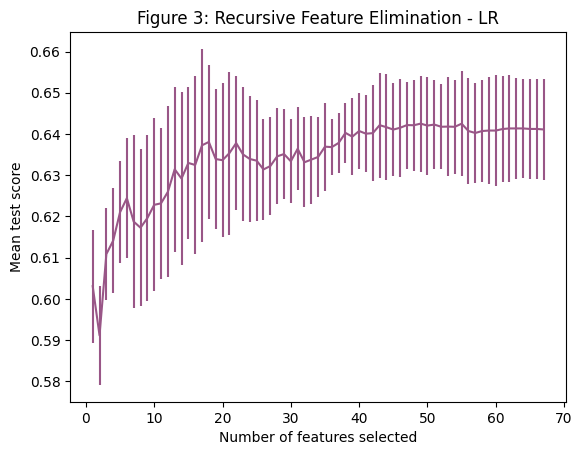

In [ ]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Figure 3: Recursive Feature Elimination - LR")

# Show the plot
plt.show()

In [ ]:
selected_LR_features = X_train_resampled.columns[rfecv_LR.support_]

print("Selected Features for LR:")
print(selected_LR_features)

Selected Features for LR:
Index(['Diabetes', 'HTN', 'OA', 'COPD', 'Sex', 'HTRX_ALISKIREN',
       'HTRX_ATENOLOL', 'HTRX_BENAZEPRIL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM',
       'HTRX_DIURETIC', 'HTRX_EPROSARTAN', 'HTRX_FELODIPINE',
       'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE',
       'HTRX_LABETALOL', 'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL',
       'HTRX_NADOLOL', 'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL',
       'HTRX_PERINDOPRIL', 'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL',
       'HTRX_QUINAPRIL', 'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_TELMISARTAN',
       'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL', 'HTRX_VALSARTAN',
       'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE',
       'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISONE', 'Med_Cluster_2',
       'Med_Cluster_3', 'Diabetes_YRS', 'COPD_YRS', 'Age_at_Exam', 'sBP',
       'BMI', 'LDL', 'HDL', 'A1c', 'TG'],
      dtype='object')


In [ ]:
# Get the feature ranking
feature_ranking_LR = rfecv_LR.ranking_

# Create a dictionary to store feature rankings
feature_rankings_dict_LR = {}

# Associate each feature with its ranking
for feature, ranking in zip(X_train_scaled_df.columns, feature_ranking_LR):
    feature_rankings_dict_LR[feature] = ranking

# Rank features based on their importance (lower rank is more important)
sorted_feature_rankings_LR = sorted(feature_rankings_dict_LR.items(), key=lambda x: x[1])

# Print the ranked features
print("Ranked Features - LR:")
for feature, rank in sorted_feature_rankings_LR:
    print(f"{feature}: {rank}")

Ranked Features - LR:
Diabetes: 1
HTN: 1
OA: 1
COPD: 1
Sex: 1
HTRX_ALISKIREN: 1
HTRX_ATENOLOL: 1
HTRX_BENAZEPRIL: 1
HTRX_CILAZAPRIL: 1
HTRX_DILTIAZEM: 1
HTRX_DIURETIC: 1
HTRX_EPROSARTAN: 1
HTRX_FELODIPINE: 1
HTRX_FOSINOPRIL: 1
HTRX_FUROSEMIDE: 1
HTRX_HYDROCHLOROTHIAZIDE: 1
HTRX_LABETALOL: 1
HTRX_LISINOPRIL: 1
HTRX_LOSARTAN: 1
HTRX_METOPROLOL: 1
HTRX_NADOLOL: 1
HTRX_NIFEDIPINE: 1
HTRX_OLMESARTAN MEDOXOMIL: 1
HTRX_PERINDOPRIL: 1
HTRX_POTASSIUM-SPARING AGENTS: 1
HTRX_PROPRANOLOL: 1
HTRX_QUINAPRIL: 1
HTRX_RAMIPRIL: 1
HTRX_SOTALOL: 1
HTRX_TELMISARTAN: 1
HTRX_TIMOLOL: 1
HTRX_TRANDOLAPRIL: 1
HTRX_VALSARTAN: 1
CSRX_ANTIINFECTIVES: 1
CSRX_DEXAMETHASONE: 1
CSRX_HYDROCORTISONE: 1
CSRX_METHYLPREDNISOLONE: 1
CSRX_PREDNISONE: 1
Med_Cluster_2: 1
Med_Cluster_3: 1
Diabetes_YRS: 1
COPD_YRS: 1
Age_at_Exam: 1
sBP: 1
BMI: 1
LDL: 1
HDL: 1
A1c: 1
TG: 1
HTN_YRS: 2
HTRX_SPIRONOLACTONE: 3
HTRX_BISOPROLOL: 4
OA_YRS: 5
HTRX_AMLODIPINE: 6
HTRX_DOXAZOSIN: 7
FBS>DM: 8
HTRX_ACEBUTOLOL: 9
Med_Cluster_4: 10
Med_Cluster

Best alpha for L1 penalty: (0.31622776601683794, 0.3573643410852713)
Best alpha for L2 penalty: (0.06812920690579612, 0.3571705426356589)


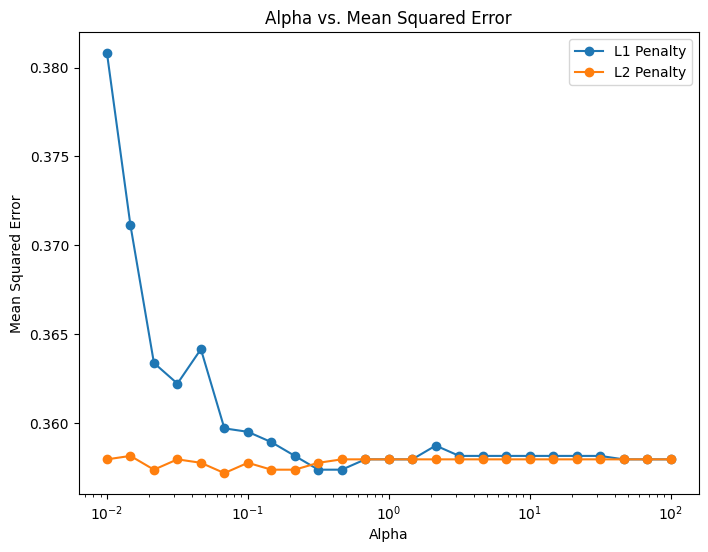

In [ ]:
#GRID SEARCH FOR BEST REGULARIZATION
from sklearn.model_selection import cross_val_score

np.random.seed(78)

alpha_min = 0.01
alpha_max = 100
num_alphas = 25  # The number of alpha vals

# Generate the alpha values using np.logspace
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num_alphas)

# Lists to store mean MSE scores for L1 and L2
mean_mse_scores_l1 = []
mean_mse_scores_l2 = []

# Convert the selected features to a DataFrame
X_train_selected = X_train_resampled[selected_LR_features]

for alpha in alphas:
    # L1 penalty
    log_reg_l1 = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
    mse_scores_l1 = -cross_val_score(log_reg_l1, X_train_selected, y_train_resampled, cv=10, scoring='neg_mean_squared_error')
    mean_mse_l1 = np.mean(mse_scores_l1)
    mean_mse_scores_l1.append((alpha, mean_mse_l1))

    # L2 penalty
    log_reg_l2 = LogisticRegression(penalty='l2', C=alpha, solver='liblinear')
    mse_scores_l2 = -cross_val_score(log_reg_l2, X_train_selected, y_train_resampled, cv=10, scoring='neg_mean_squared_error')
    mean_mse_l2 = np.mean(mse_scores_l2)
    mean_mse_scores_l2.append((alpha, mean_mse_l2))

# Find the best alpha values for both L1 and L2
best_alpha_l1 = min(mean_mse_scores_l1, key=lambda x: x[1])
best_alpha_l2 = min(mean_mse_scores_l2, key=lambda x: x[1])

print('Best alpha for L1 penalty:', best_alpha_l1)
print('Best alpha for L2 penalty:', best_alpha_l2)

# Plot resultt
alphas_l1, mse_values_l1 = zip(*mean_mse_scores_l1)
alphas_l2, mse_values_l2 = zip(*mean_mse_scores_l2)

plt.figure(figsize=(8, 6))
plt.semilogx(alphas_l1, mse_values_l1, marker='o', linestyle='-', label='L1 Penalty')
plt.semilogx(alphas_l2, mse_values_l2, marker='o', linestyle='-', label='L2 Penalty')
plt.title('Alpha vs. Mean Squared Error')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
# Training logistic regression model
#we used the ridge regression method
log_reg = LogisticRegression(penalty='l1', C=0.03162277, solver='liblinear')
log_reg.fit(X_train_selected, y_train_resampled)

LogisticRegression(C=0.03162277, penalty='l1', solver='liblinear')

In [ ]:
(X_train_selected.shape)

(5160, 49)

TRAINING SET ----------------------------------------------------------
Confusion Matrix:
[[1621  959]
 [ 862 1718]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2580
           1       0.64      0.67      0.65      2580

    accuracy                           0.65      5160
   macro avg       0.65      0.65      0.65      5160
weighted avg       0.65      0.65      0.65      5160



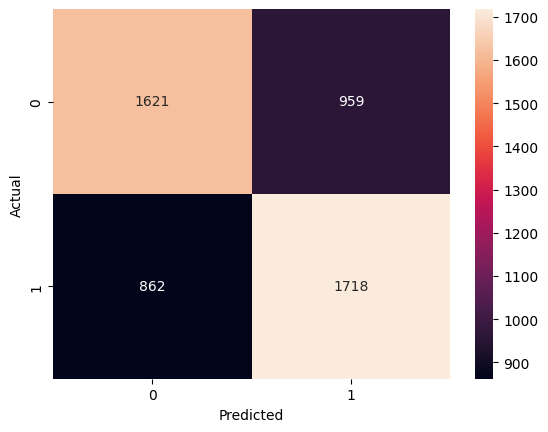

Test ROC-AUC: 0.6969


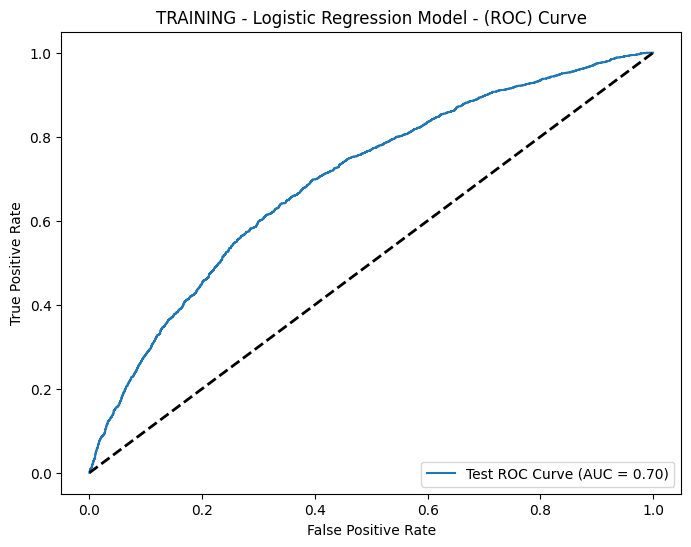

TEST SET --------------------------------------------------------------
Confusion Matrix:
[[722 521]
 [100 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70      1243
           1       0.31      0.70      0.43       330

    accuracy                           0.61      1573
   macro avg       0.59      0.64      0.56      1573
weighted avg       0.76      0.61      0.64      1573



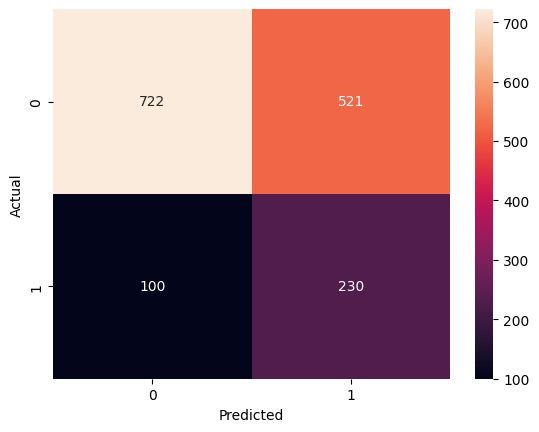

Test ROC-AUC: 0.6899


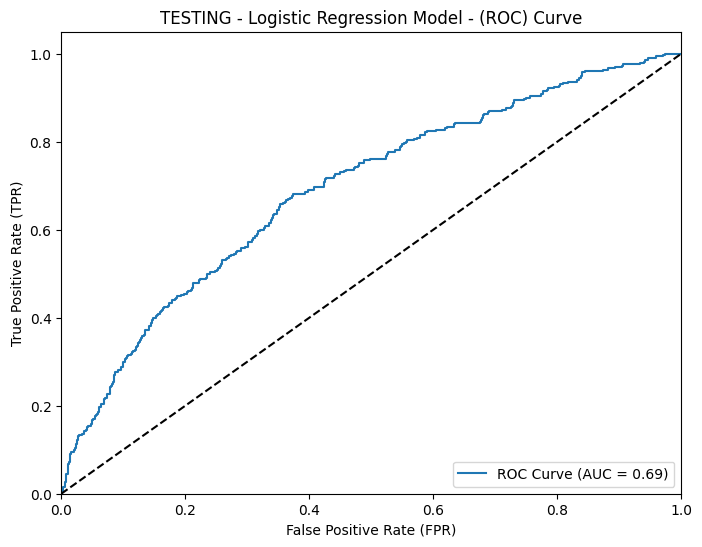

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test
from sklearn.metrics import roc_curve, roc_auc_score

# Convert the selected features to a DataFrame
X_train_selected = X_train_resampled[selected_LR_features]

# Convert the selected features to a DataFrame
X_test_selected = X_test_scaled_df[selected_LR_features]

# Predictive Ability - TRAINING SET ============================================
print("TRAINING SET ----------------------------------------------------------")

# Use the model to make predictions on the training data
y_pred_train_proba_LR = log_reg.predict_proba(X_train_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_train_proba_LR >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_train_resampled, y_pred)
class_report = classification_report(y_train_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate ROC-AUC on the train set
roc_auc_train_LR = roc_auc_score(y_train_resampled, y_pred_train_proba_LR)
print(f"Test ROC-AUC: {roc_auc_train_LR:.4f}")

# Calculate ROC curve on the train set
fpr_LR, tpr_LR, _ = roc_curve(y_train_resampled, y_pred_train_proba_LR)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label=f'Test ROC Curve (AUC = {roc_auc_train_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRAINING - Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predictive Ability - TEST SET ================================================
print("TEST SET --------------------------------------------------------------")

# Use the model to make predictions on the testing data
y_pred_test_proba_LR = log_reg.predict_proba(X_test_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_test_proba_LR >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Calculate ROC-AUC on the train set
roc_auc_test_LR = roc_auc_score(y_test, y_pred_test_proba_LR)
print(f"Test ROC-AUC: {roc_auc_test_LR:.4f}")

# Visualizing ROC at the new probability threshold
fpr_LR_T, tpr_LR_T, thresholds = roc_curve(y_test, y_pred_test_proba_LR)
roc_auc = roc_auc_score(y_test, y_pred_test_proba_LR)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR_T, tpr_LR_T, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('TESTING - Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Section E2 - Random Forest

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test

In [ ]:
!pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

RF_model = RandomForestClassifier()

cv_RF = StratifiedKFold(5)
rfecv_RF = RFECV(
    estimator=RF_model,
    step=1,
    cv=cv_RF,
    scoring=f1_scoring,
    min_features_to_select=1,
)

rfecv_RF.fit(X_train_resampled, y_train_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -RF: {rfecv_RF.n_features_}")
#12 min 17 sec to run

Optimal number of features -RF: 61


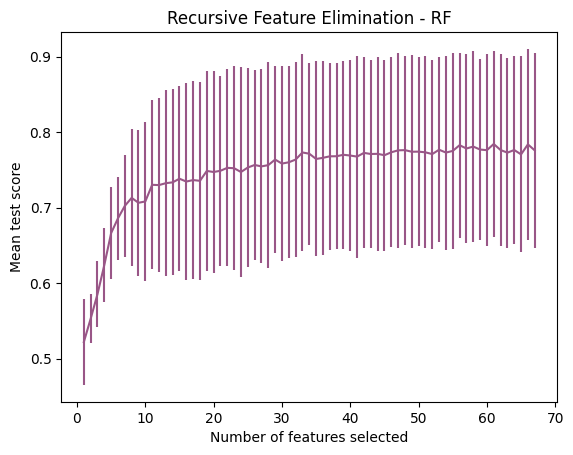

In [ ]:
# Calculate the number of different feature selections tested
n_scores_RF = len(rfecv_RF.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_RF + 1),
    rfecv_RF.cv_results_["mean_test_score"],
    yerr=rfecv_RF.cv_results_["std_test_score"],
    color='#995687'
)

# Set the title for the plot
plt.title("Recursive Feature Elimination - RF")

# Show the plot
plt.show()

In [ ]:
#reccomended features through RFE, but theres diminishing returns beyond 20 features
selected_LR_features = X_train_resampled.columns[rfecv_RF.support_]

print("Selected Features for RF:")
print(selected_LR_features)

Selected Features for RF:
Index(['FBS>DM', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex', 'HTRX_ACEBUTOLOL',
       'HTRX_AMLODIPINE', 'HTRX_ATENOLOL', 'HTRX_BISOPROLOL',
       'HTRX_CANDESARTAN', 'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL',
       'HTRX_DILTIAZEM', 'HTRX_DIURETIC', 'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL',
       'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE',
       'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LISINOPRIL',
       'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL', 'HTRX_NIFEDIPINE',
       'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
       'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
       'HTRX_RAMIPRIL', 'HTRX_SPIRONOLACTONE', 'HTRX_TELMISARTAN',
       'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL', 'HTRX_VALSARTAN', 'HTRX_VERAPAMIL',
       'CSRX_ANTIBIOTICS', 'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE',
       'CSRX_HYDROCORTISONE', 'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISONE',
       'Med_Cluster_0', 'Med_Cluster_1', 'Med_Clu

In [ ]:
# Get the indices of the top 24 features based on mean test score
top_features = np.argsort(rfecv_RF.cv_results_["mean_test_score"])[::-1][:24]

# Get the names of the top 24 features
sub_features = X_train_resampled.columns[top_features]

# Print the top 24 feature names
print("Top 24 Features:")
print(sub_features)

# #
# Top 24 Features:
# Index(['Age_at_Exam', 'OA_YRS', 'Diabetes_YRS', 'Med_Cluster_1', 'sBP', 'TG',
#        'CSRX_PREDNISONE', 'HTN_YRS', 'HDL', 'Med_Cluster_3',
#        'CSRX_ANTIINFECTIVES', 'COPD_YRS', 'BMI', 'Med_Cluster_4',
#        'CSRX_PREDNISOLONE', 'CSRX_ANTIBIOTICS', 'CSRX_METHYLPREDNISOLONE',
#        'Med_Cluster_0', 'Med_Cluster_2', 'HTRX_TRANDOLAPRIL', 'HTRX_VERAPAMIL',
#        'A1c', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE'],
#       dtype='object')

Top 24 Features:
Index(['Age_at_Exam', 'A1c', 'Med_Cluster_4', 'HTN_YRS', 'Diabetes_YRS',
       'OA_YRS', 'Med_Cluster_1', 'LDL', 'sBP', 'CSRX_HYDROCORTISONE',
       'COPD_YRS', 'CSRX_DEXAMETHASONE', 'TG', 'Med_Cluster_3',
       'CSRX_PREDNISOLONE', 'CSRX_METHYLPREDNISOLONE', 'CSRX_ANTIINFECTIVES',
       'CSRX_PREDNISONE', 'HTRX_PERINDOPRIL', 'Med_Cluster_2', 'BMI',
       'HTRX_TRANDOLAPRIL', 'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_VERAPAMIL'],
      dtype='object')


In [ ]:
#shortcut
sub_features = ['Age_at_Exam', 'OA_YRS', 'Diabetes_YRS', 'Med_Cluster_1', 'sBP', 'TG',
       'CSRX_PREDNISONE', 'HTN_YRS', 'HDL', 'Med_Cluster_3',
       'CSRX_ANTIINFECTIVES', 'COPD_YRS', 'BMI', 'Med_Cluster_4',
       'CSRX_PREDNISOLONE', 'CSRX_ANTIBIOTICS', 'CSRX_METHYLPREDNISOLONE',
       'Med_Cluster_0', 'Med_Cluster_2', 'HTRX_TRANDOLAPRIL', 'HTRX_VERAPAMIL',
       'A1c', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE']

In [ ]:
#update number of features for X training and test sets
# FINAL DATASETS Y - FOR CROSS SECTIONAL: y_train_resampled, y_test
X_train_RF_selected = X_train_resampled[sub_features]
X_test_RF_selected = X_test_scaled_df[sub_features]

In [ ]:
# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight NONE since we already re-balanced classes
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight=None, oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ('random_forest', random_forest)
])


RF_model = model.fit(X_train_RF_selected, y_train_resampled)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = RF_model.predict(X_train_RF_selected)
print('accuracy score training')
print(accuracy_score(y_train_resampled, Y_pred))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = RF_model.predict(X_test_RF_selected)
print('accuracy score test')
print(accuracy_score(y_test, Y_pred))

accuracy score training
1.0
accuracy score test
0.7247298156389066


In [ ]:
# # Setting hyperparameters for Random Forest for the Grid Search.
# param_dist = {
#     "random_forest__n_estimators" : [100, 150, 200],
#     "random_forest__max_depth" : [None, 10, 15, 30],
#     "random_forest__min_samples_leaf" : [5, 10, 20],
#     "random_forest__max_features" : ['auto', 'sqrt', 'log2']
# }

# # Initialize Random Forest classifier
# clf = RandomForestClassifier(criterion='entropy', class_weight=None, oob_score=True)

# # Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.
# skf = StratifiedKFold(n_splits=5)

# # Setting up GridSearchCV to search through the parameter space.
# # It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.
# random_search = GridSearchCV(
#     model, param_grid=param_dist, cv=skf
# )

# # Running the GridSearchCV on the training data.
# random_search.fit(X_train_RF_selected, y_train_resampled)

# # Extracting the results of the Grid Search into a DataFrame for analysis.
# results = pd.DataFrame(random_search.cv_results_)

# # Filtering to get the rows with the best performing hyperparameters.
# results[results['rank_test_score'] == 1]
# #17 min 10 sec to run

In [ ]:
# # Retrieve the best hyperparameters after Grid Search for RF
# random_search.best_params_

# # output
# # {'random_forest__max_depth': 30,
# #  'random_forest__max_features': 'sqrt',
# #  'random_forest__min_samples_leaf': 5,
# #  'random_forest__n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters obtained from the grid search
best_params = {
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'n_estimators': 200
}

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(criterion='entropy', oob_score=True)

# Set the best hyperparameters
random_forest.set_params(**best_params)

# Fit the model on your training data
RF2_model = random_forest.fit(X_train_RF_selected, y_train_resampled)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred_train = RF2_model.predict(X_train_RF_selected)
print('Accuracy score on training set:', accuracy_score(y_train_resampled, Y_pred_train))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_test = RF2_model.predict(X_test_RF_selected)
print('Accuracy score on test set:', accuracy_score(y_test, Y_pred_test))


Accuracy score on training set: 0.9393410852713179
Accuracy score on test set: 0.694850603941513


TRAINING SET ----------------------------------------------------------
Confusion Matrix:
[[2497   83]
 [ 230 2350]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2580
           1       0.97      0.91      0.94      2580

    accuracy                           0.94      5160
   macro avg       0.94      0.94      0.94      5160
weighted avg       0.94      0.94      0.94      5160



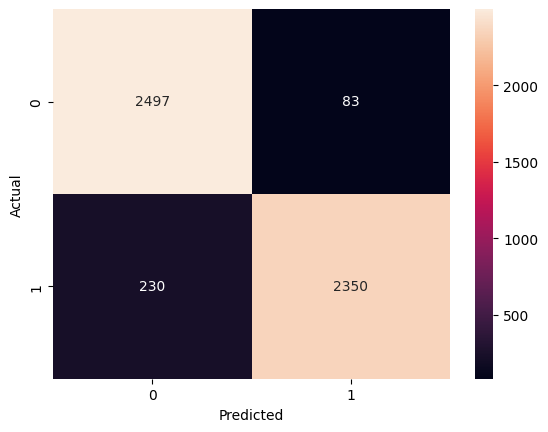

Test ROC-AUC: 0.9882


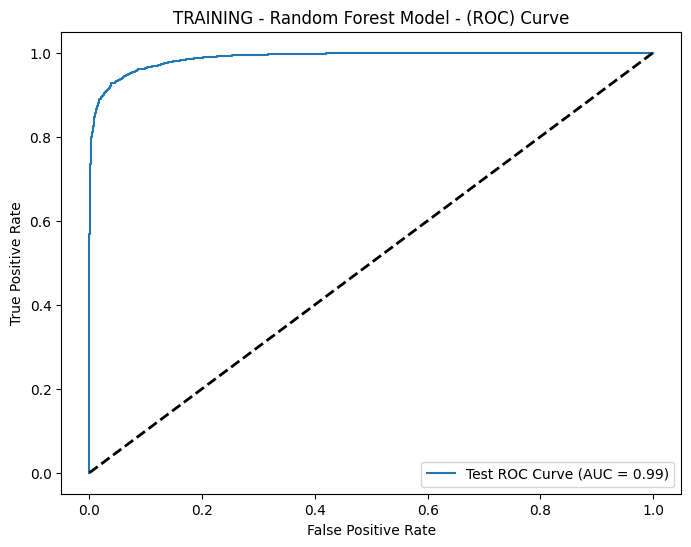

TEST SET --------------------------------------------------------------
Confusion Matrix:
[[936 307]
 [173 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1243
           1       0.34      0.48      0.40       330

    accuracy                           0.69      1573
   macro avg       0.59      0.61      0.60      1573
weighted avg       0.74      0.69      0.71      1573



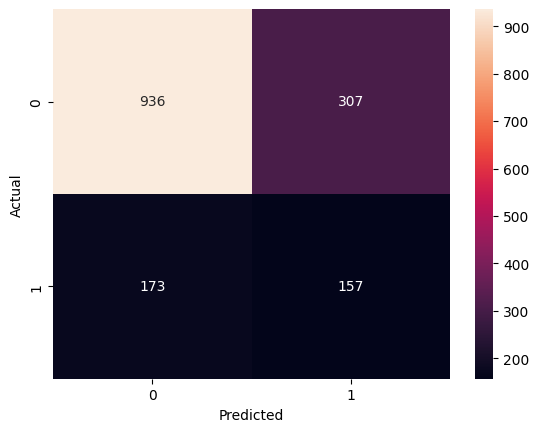

Test ROC-AUC: 0.6711


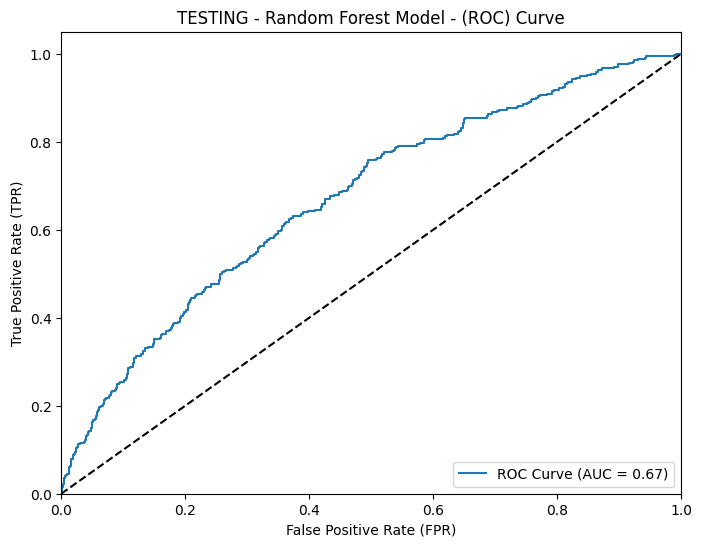

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# FINAL DATASETS Y - FOR CROSS SECTIONAL: X_train_RF_selected, X_test_RF_selected, y_train_resampled, y_test

# Predictive Ability - TRAINING SET ============================================
print("TRAINING SET ----------------------------------------------------------")

# Use the model to make predictions on the training data
y_pred_train_proba_RF = RF2_model.predict_proba(X_train_RF_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_train_proba_RF >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_train_resampled, y_pred)
class_report = classification_report(y_train_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate ROC-AUC on the train set
roc_auc_train_RF = roc_auc_score(y_train_resampled, y_pred_train_proba_RF)
print(f"Test ROC-AUC: {roc_auc_train_RF:.4f}")

# Calculate ROC curve on the train set
fpr_RF, tpr_RF, _ = roc_curve(y_train_resampled, y_pred_train_proba_RF)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label=f'Test ROC Curve (AUC = {roc_auc_train_RF:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRAINING - Random Forest Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predictive Ability - TEST SET ================================================
print("TEST SET --------------------------------------------------------------")

# Use the model to make predictions on the testing data
y_pred_test_proba_RF = RF2_model.predict_proba(X_test_RF_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_test_proba_RF >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Calculate ROC-AUC on the train set
roc_auc_test_RF = roc_auc_score(y_test, y_pred_test_proba_RF)
print(f"Test ROC-AUC: {roc_auc_test_RF:.4f}")

# Visualizing ROC at the new probability threshold
fpr_RF_T, tpr_RF_T, thresholds = roc_curve(y_test, y_pred_test_proba_RF)
roc_auc = roc_auc_score(y_test, y_pred_test_proba_RF)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF_T, tpr_RF_T, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('TESTING - Random Forest Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Section E3 - ADA BOOST

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test

In [ ]:
#DECIDED TO USE SFM over RFECV for this model

# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import make_scorer, recall_score

# # Define your base estimator (a decision tree stump)
# base_estimator = DecisionTreeClassifier(max_depth=1)

# # Create AdaBoost classifier object
# adaboost_model = AdaBoostClassifier(
#     base_estimator=base_estimator,
#     n_estimators=50,
#     learning_rate=1.0
# )

# # Define a scoring metric for feature selection (you can change this based on your requirements)
# recall_scoring = make_scorer(recall_score)

# # Use StratifiedKFold for cross-validation
# cv_adaboost = StratifiedKFold(5)

# # Create RFECV object
# rfecv_adaboost = RFECV(
#     estimator=adaboost_model,
#     step=1,
#     cv=cv_adaboost,
#     scoring=recall_scoring,
#     min_features_to_select=1,
# )

# # Fit RFECV on your data
# rfecv_adaboost.fit(X_train_resampled, y_train_resampled)

# # Print the optimal number of selected features
# print(f"Optimal number of features - AdaBoost: {rfecv_adaboost.n_features_}")


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define your base estimator (a decision tree stump)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier object
adaboost_model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0
)

# Fit AdaBoost model to get feature importances
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Create SelectFromModel object using the trained AdaBoost model
sfm = SelectFromModel(adaboost_model, threshold='mean')  # You can adjust the threshold as needed

# Transform the training data to select features
X_train_selected = sfm.transform(X_train_resampled)

# Print the selected features
selected_features = X_train_resampled.columns[sfm.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Diabetes', 'HTN', 'OA', 'COPD', 'Sex', 'HTRX_ATENOLOL',
       'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_METOPROLOL',
       'HTRX_RAMIPRIL', 'CSRX_HYDROCORTISONE', 'CSRX_METHYLPREDNISOLONE',
       'Diabetes_YRS', 'HTN_YRS', 'COPD_YRS', 'Age_at_Exam', 'sBP', 'BMI',
       'HDL', 'A1c', 'TG'],
      dtype='object')


In [ ]:
print(len(selected_features))

21


In [ ]:
#update number of features for X training and test sets
# FINAL DATASETS Y - FOR CROSS SECTIONAL: y_train_resampled, y_test
X_train_ADA_selected = X_train_resampled[selected_features]
X_test_ADA_selected = X_test_scaled_df[selected_features]

In [ ]:
# Define your base estimator (a decision tree stump)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier object
adaboost_model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0
)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Use StratifiedKFold for cross-validation
cv_adaboost = StratifiedKFold(5)

# Create GridSearchCV object
grid_search_adaboost = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_dist,
    cv=cv_adaboost,
    scoring='accuracy',  # Use an appropriate scoring metric
)

# Fit GridSearchCV on your data
grid_search_adaboost.fit(X_train_ADA_selected, y_train_resampled)

# Extracting the results of the Grid Search into a DataFrame for analysis
results_adaboost = pd.DataFrame(grid_search_adaboost.cv_results_)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search_adaboost.best_params_)
#1 min 6 sec

# Best Hyperparameters:
# {'learning_rate': 1.0, 'n_estimators': 150}

Best Hyperparameters:
{'learning_rate': 1.0, 'n_estimators': 150}


In [ ]:
# Best parameters obtained from the grid search
best_params_adaboost = {
    'learning_rate': 1.0,
    'n_estimators': 150
}

# Define your base estimator (a decision tree stump)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier instance
adaboost_model_best = AdaBoostClassifier(
    base_estimator=base_estimator,
    **best_params_adaboost
)

# Fit the model on your training data
adaboost_model_best.fit(X_train_ADA_selected, y_train_resampled)

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred_train_adaboost = adaboost_model_best.predict(X_train_ADA_selected)
print('Accuracy score on training set:', accuracy_score(y_train_resampled, Y_pred_train_adaboost))

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred_test_adaboost = adaboost_model_best.predict(X_test_ADA_selected)
print('Accuracy score on test set:', accuracy_score(y_test, Y_pred_test_adaboost))

Accuracy score on training set: 0.7420542635658914
Accuracy score on test set: 0.7012078830260648


TRAINING SET ----------------------------------------------------------
Confusion Matrix:
[[2017  563]
 [ 768 1812]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2580
           1       0.76      0.70      0.73      2580

    accuracy                           0.74      5160
   macro avg       0.74      0.74      0.74      5160
weighted avg       0.74      0.74      0.74      5160



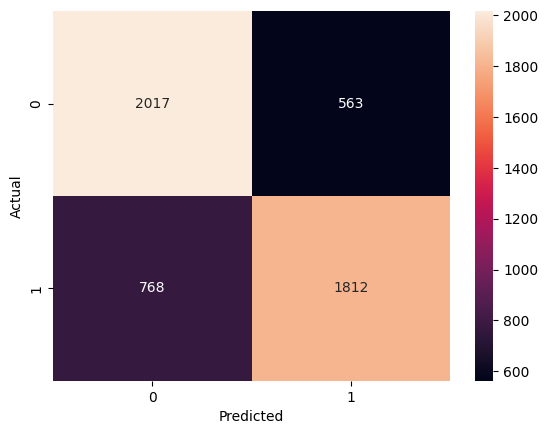

Test ROC-AUC: 0.8244


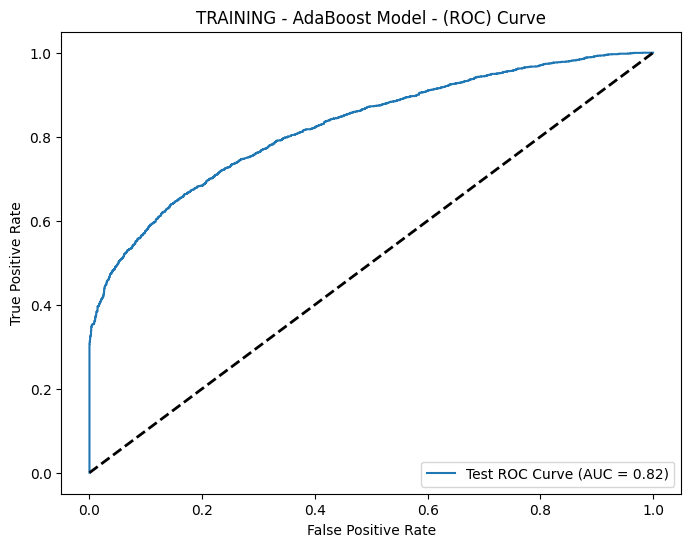

TEST SET --------------------------------------------------------------
Confusion Matrix:
[[931 312]
 [158 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1243
           1       0.36      0.52      0.42       330

    accuracy                           0.70      1573
   macro avg       0.61      0.64      0.61      1573
weighted avg       0.75      0.70      0.72      1573



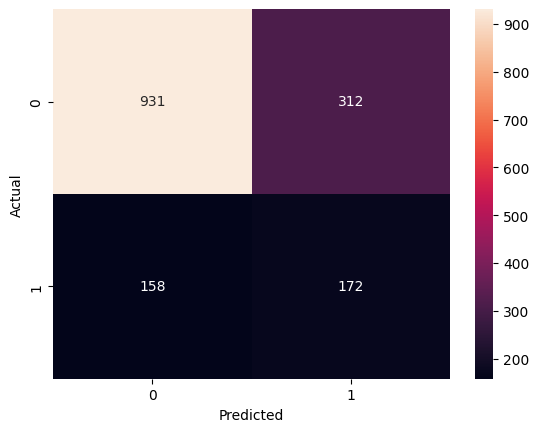

Test ROC-AUC: 0.6754


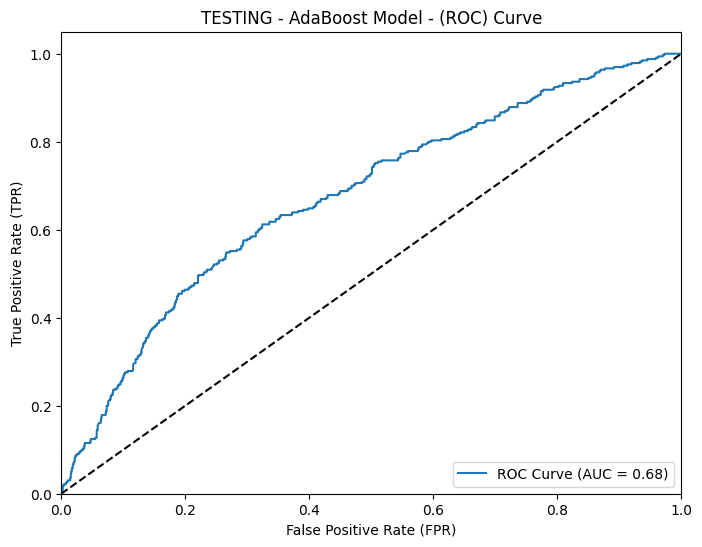

In [ ]:
# FINAL DATASETS Y - FOR CROSS SECTIONAL: X_train_ADA_selected, X_test_ADA_selected, y_train_resampled, y_test

# Predictive Ability - TRAINING SET ============================================
print("TRAINING SET ----------------------------------------------------------")

# Use the model to make predictions on the training data
y_pred_train_proba_ADA = adaboost_model_best.predict_proba(X_train_ADA_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_train_proba_ADA >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_train_resampled, y_pred)
class_report = classification_report(y_train_resampled, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate ROC-AUC on the train set
roc_auc_train_ADA = roc_auc_score(y_train_resampled, y_pred_train_proba_ADA)
print(f"Test ROC-AUC: {roc_auc_train_ADA:.4f}")

# Calculate ROC curve on the train set
fpr_ADA, tpr_ADA, _ = roc_curve(y_train_resampled, y_pred_train_proba_ADA)

# Plot ROC curve for the train set
plt.figure(figsize=(8, 6))
plt.plot(fpr_ADA, tpr_ADA, label=f'Test ROC Curve (AUC = {roc_auc_train_ADA:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRAINING - AdaBoost Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Predictive Ability - TEST SET ================================================
print("TEST SET --------------------------------------------------------------")

# Use the model to make predictions on the testing data
y_pred_test_proba_ADA = adaboost_model_best.predict_proba(X_test_ADA_selected)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.5
y_pred = (y_pred_test_proba_ADA >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Calculate ROC-AUC on the train set
roc_auc_test_ADA = roc_auc_score(y_test, y_pred_test_proba_ADA)
print(f"Test ROC-AUC: {roc_auc_test_ADA:.4f}")

# Visualizing ROC at the new probability threshold
fpr_ADA_T, tpr_ADA_T, thresholds = roc_curve(y_test, y_pred_test_proba_ADA)
roc_auc = roc_auc_score(y_test, y_pred_test_proba_ADA)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ADA_T, tpr_ADA_T, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('TESTING - AdaBoost Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Section E4 - Neural Network - NEW

In [ ]:
# FINAL DATASETS - FOR CROSS SECTIONAL: X_train_resampled, X_test_scaled_df, y_train_resampled, y_test

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
(X_train_resampled.shape)

(5160, 67)

**Initializing NN Parameters**

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 15
hidden_units_layer_2 = 15
hidden_units_layer_3 = 15
hidden_units_layer_4 = 15

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((67, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the third layer
W3 = t.randn((hidden_units_layer_2, hidden_units_layer_3), requires_grad=True)
B3 = t.zeros((1, hidden_units_layer_3), requires_grad=True)

# 4th LAYER: Define weights and biases for the fourth layer
W4 = t.randn((hidden_units_layer_3, hidden_units_layer_4), requires_grad=True)
B4 = t.zeros((1, hidden_units_layer_4), requires_grad=True)

# 5th LAYER: Define weights and biases for the output layer
W5 = t.randn((hidden_units_layer_4, 1), requires_grad=True)
B5 = t.zeros((1, 1), requires_grad=True)

**Implementing the Forward Pass of NN**

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Third hidden layer with tanh activation
    out = tanh(out @ W3 + B3)

    # 4th hidden layer with tanh activation
    out = tanh(out @ W4 + B4)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W5 + B5)
    return out

**Preparing Data and Training Utilities for NN Training**

In [ ]:
# Extract the target variable for training and testing
Y_train_NN = y_train_resampled.to_numpy()
Y_test_NN = y_test.to_numpy()

# Extract the features for training and testing
X_train_NN = X_train_resampled.to_numpy()
X_test_NN = X_test_scaled_df.to_numpy()

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_NN).type(t.float32)
Y = t.Tensor(Y_train_NN).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 250
learning_rate = 0.001
batch_size = 100

# Define the dropout rate
dropout_rate = 0.2

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3, W4, B4, W5, B5], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= 0.9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1, 1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    average_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    train_loss_list.append(average_loss)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(average_loss)

    # Print the average loss for this epoch
    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss}")


Epoch 1/250, Average Loss: 1.2098635584115982
Epoch 2/250, Average Loss: 1.0197721215394826
Epoch 3/250, Average Loss: 0.9157517437751477
Epoch 4/250, Average Loss: 0.845839784695552
Epoch 5/250, Average Loss: 0.7992079498676153
Epoch 6/250, Average Loss: 0.7624787573630993
Epoch 7/250, Average Loss: 0.7377267537208704
Epoch 8/250, Average Loss: 0.7157011398902307
Epoch 9/250, Average Loss: 0.6988111883401871
Epoch 10/250, Average Loss: 0.6817563451253451
Epoch 11/250, Average Loss: 0.6680777348004855
Epoch 12/250, Average Loss: 0.6541524735780863
Epoch 13/250, Average Loss: 0.6452710800445997
Epoch 14/250, Average Loss: 0.63768797654372
Epoch 15/250, Average Loss: 0.6293856215018493
Epoch 16/250, Average Loss: 0.6211671290489343
Epoch 17/250, Average Loss: 0.6145466382686908
Epoch 18/250, Average Loss: 0.608875396159979
Epoch 19/250, Average Loss: 0.6035297811031342
Epoch 20/250, Average Loss: 0.5992972529851474
Epoch 21/250, Average Loss: 0.5939491494343832
Epoch 22/250, Average Loss

**Training Loop for the NN**

Text(0, 0.5, 'loss')

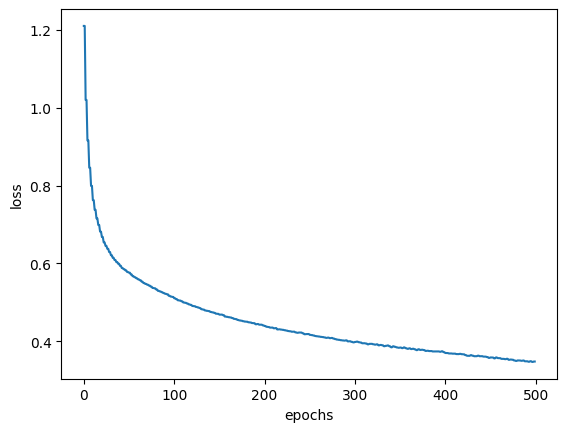

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    # Y is initially a 2D tensor with shape (num_samples, 1). We will squeeze it to make it 1D
    loss = loss_fn(probs.view(-1, 1), Y) # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    # Y is initially a 2D tensor with shape (num_samples, 1). We will squeeze it to make it 1D
    loss = loss_fn(probs, Y.view(-1, 1)) # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

1.1034834384918213
0.33544355630874634


In [ ]:
from sklearn.metrics import roc_auc_score

# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X_val = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y_val = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs_val = forward(X_val)  # Pass validation data through the trained model
    probs_val = probs_val.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for validation data
    auc_val = roc_auc_score(Y_val.numpy(), probs_val)

    # Print the validation AUC
    print("Validation AUC:", auc_val)

    # Now, evaluate the model on the training data
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train = forward(X_train)  # Pass training data through the trained model
    probs_train = probs_train.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train = roc_auc_score(Y_train.numpy(), probs_train)

    # Print the training AUC
    print("Training AUC:", auc_train)


Validation AUC: 0.514308003608084
Training AUC: 0.9346468060813652


TEST SET --------------------------------------------------------------
Confusion Matrix:
[[674 569]
 [172 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65      1243
           1       0.22      0.48      0.30       330

    accuracy                           0.53      1573
   macro avg       0.51      0.51      0.47      1573
weighted avg       0.68      0.53      0.57      1573



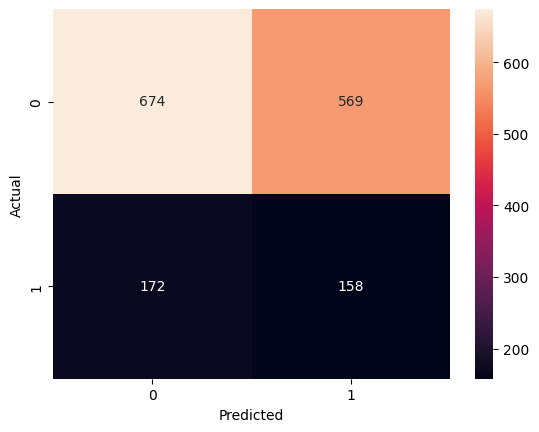

Validation AUC: 0.514308003608084


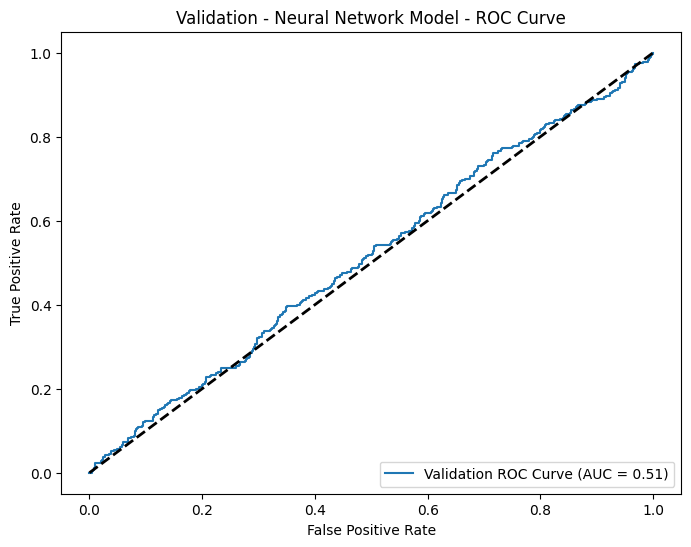

TRAINING SET --------------------------------------------------------------
Training AUC: 0.9346468060813652


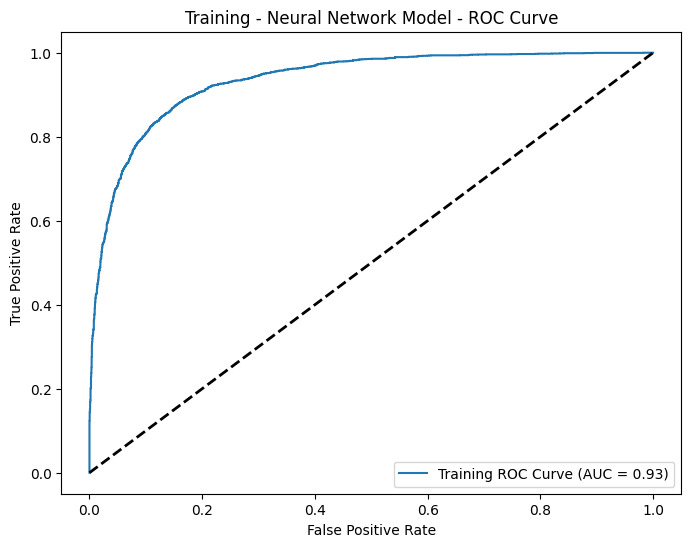

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import torch as t

# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data =============================================
    print("TEST SET --------------------------------------------------------------")
    X_val = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y_val = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    y_pred_test_proba_BNN = forward(X_val)  # Pass validation data through the trained model
    y_pred_test_proba_BNN = y_pred_test_proba_BNN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Apply the threshold
    threshold = 0.5
    y_pred_test = (y_pred_test_proba_BNN >= threshold).astype(int)

    # Evaluate the model
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    class_report_test = classification_report(y_test, y_pred_test)

    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("\nClassification Report:")
    print(class_report_test)

    # Visualize confusion matrix
    sns.heatmap(conf_matrix_test, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate AUC for validation data
    auc_test_BNN = roc_auc_score(Y_val.numpy(), y_pred_test_proba_BNN)

    # Print the validation AUC
    print("Validation AUC:", auc_test_BNN)

    # Plot ROC curve for the validation set
    fpr_test_BNN, tpr_test_BNN, _ = roc_curve(Y_val.numpy(), y_pred_test_proba_BNN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test_BNN, tpr_test_BNN, label=f'Validation ROC Curve (AUC = {auc_test_BNN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Validation - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


    # Now, evaluate the model on the training data =============================
    print("TRAINING SET --------------------------------------------------------------")
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train_BNN = forward(X_train)  # Pass training data through the trained model
    probs_train_BNN = probs_train_BNN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train_BNN = roc_auc_score(Y_train.numpy(), probs_train_BNN)

    # Print the training AUC
    print("Training AUC:", auc_train_BNN)

    # Plot ROC curve for the training set
    fpr_train_BNN, tpr_train_BNN, _ = roc_curve(Y_train.numpy(), probs_train_BNN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train_BNN, tpr_train_BNN, label=f'Training ROC Curve (AUC = {auc_train_BNN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
import torch.nn.functional as F

# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_NN).type(t.float32)
Y = t.Tensor(Y_train_NN).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 250
learning_rate = 0.001
batch_size = 100
weight_decay = 0.001  # Set your desired weight decay value

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3, W4, B4, W5, B5], lr=learning_rate, weight_decay=weight_decay)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= 0.9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1, 1), Y)

        # Add L2 regularization term to the loss
        l2_term = sum([(w ** 2).sum() for w in [W1, W2, W3, W4, W5]])
        loss += weight_decay * l2_term

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    average_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    train_loss_list.append(average_loss)

    # Print the average loss for this epoch
    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss}")


Epoch 1/250, Average Loss: 1.1357590647844167
Epoch 2/250, Average Loss: 1.121943019903623
Epoch 3/250, Average Loss: 1.1144665433810308
Epoch 4/250, Average Loss: 1.1078566908836365
Epoch 5/250, Average Loss: 1.1012184092631707
Epoch 6/250, Average Loss: 1.0933171556546137
Epoch 7/250, Average Loss: 1.087585401076537
Epoch 8/250, Average Loss: 1.080743601688972
Epoch 9/250, Average Loss: 1.0753941581799433
Epoch 10/250, Average Loss: 1.0670387423955476
Epoch 11/250, Average Loss: 1.0604336101275225
Epoch 12/250, Average Loss: 1.0555864927860408
Epoch 13/250, Average Loss: 1.047998118859071
Epoch 14/250, Average Loss: 1.0421117750497966
Epoch 15/250, Average Loss: 1.0360343020695906
Epoch 16/250, Average Loss: 1.0294971282665546
Epoch 17/250, Average Loss: 1.0234023859867682
Epoch 18/250, Average Loss: 1.0181744992733002
Epoch 19/250, Average Loss: 1.0134993608181293
Epoch 20/250, Average Loss: 1.0053403033660009
Epoch 21/250, Average Loss: 0.999900989807569
Epoch 22/250, Average Loss:

Text(0, 0.5, 'loss')

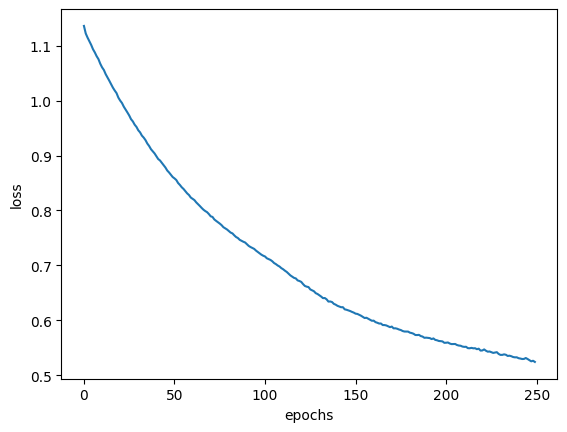

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
from sklearn.metrics import roc_auc_score

# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X_val = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y_val = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs_val = forward(X_val)  # Pass validation data through the trained model
    probs_val = probs_val.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for validation data
    auc_val = roc_auc_score(Y_val.numpy(), probs_val)

    # Print the validation AUC
    print("Validation AUC:", auc_val)

    # Now, evaluate the model on the training data
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train = forward(X_train)  # Pass training data through the trained model
    probs_train = probs_train.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train = roc_auc_score(Y_train.numpy(), probs_train)

    # Print the training AUC
    print("Training AUC:", auc_train)


Validation AUC: 0.641249177210561
Training AUC: 0.9518287663001022


TEST SET --------------------------------------------------------------
Confusion Matrix:
[[861 382]
 [158 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1243
           1       0.31      0.52      0.39       330

    accuracy                           0.66      1573
   macro avg       0.58      0.61      0.58      1573
weighted avg       0.73      0.66      0.68      1573



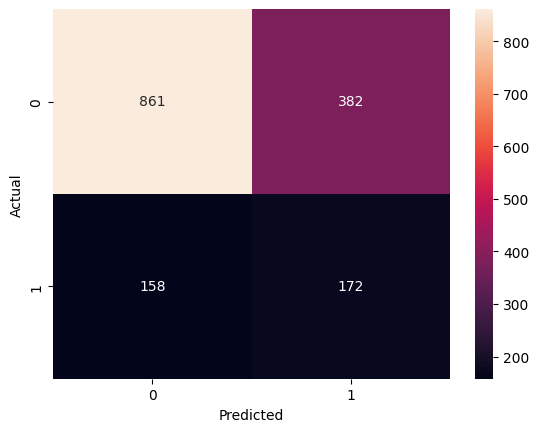

Validation AUC: 0.641249177210561


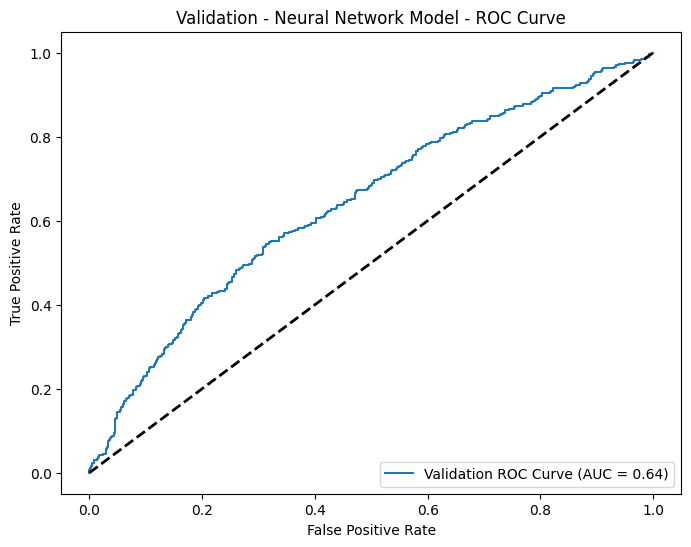

TRAINING SET --------------------------------------------------------------
Training AUC: 0.9518287663001022


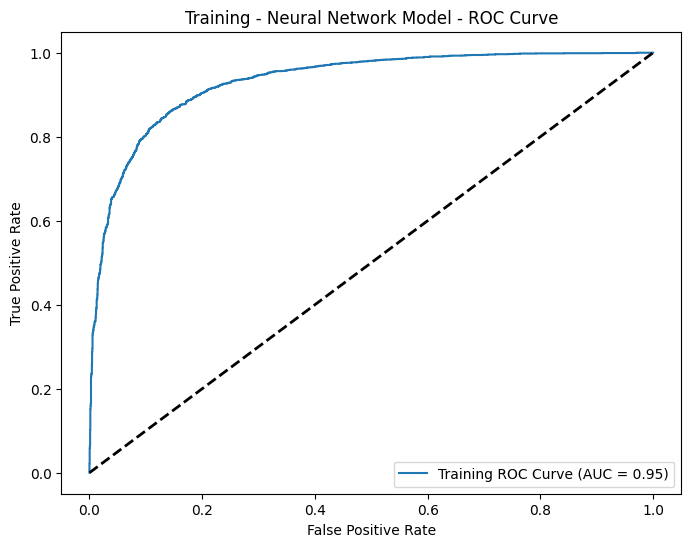

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import torch as t

# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data =============================================
    print("TEST SET --------------------------------------------------------------")
    X_val = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y_val = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    y_pred_test_proba_2NN = forward(X_val)  # Pass validation data through the trained model
    y_pred_test_proba_2NN = y_pred_test_proba_2NN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Apply the threshold
    threshold = 0.5
    y_pred_test = (y_pred_test_proba_2NN >= threshold).astype(int)

    # Evaluate the model
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    class_report_test = classification_report(y_test, y_pred_test)

    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("\nClassification Report:")
    print(class_report_test)

    # Visualize confusion matrix
    sns.heatmap(conf_matrix_test, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate AUC for validation data
    auc_test_2NN = roc_auc_score(Y_val.numpy(), y_pred_test_proba_2NN)

    # Print the validation AUC
    print("Validation AUC:", auc_test_2NN)

    # Plot ROC curve for the validation set
    fpr_test_2NN, tpr_test_2NN, _ = roc_curve(Y_val.numpy(), y_pred_test_proba_2NN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test_2NN, tpr_test_2NN, label=f'Validation ROC Curve (AUC = {auc_test_2NN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Validation - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


    # Now, evaluate the model on the training data =============================
    print("TRAINING SET --------------------------------------------------------------")
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train_2NN = forward(X_train)  # Pass training data through the trained model
    probs_train_2NN = probs_train_2NN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train_2NN = roc_auc_score(Y_train.numpy(), probs_train_2NN)

    # Print the training AUC
    print("Training AUC:", auc_train_2NN)

    # Plot ROC curve for the training set
    fpr_train_2NN, tpr_train_2NN, _ = roc_curve(Y_train.numpy(), probs_train_2NN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train_BNN, tpr_train_BNN, label=f'Training ROC Curve (AUC = {auc_train_2NN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

EXTRA

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Define the number of neurons in the first to fifth hidden layers
hidden_units_layer_1 = 40
hidden_units_layer_2 = 40
hidden_units_layer_3 = 40
hidden_units_layer_4 = 40
hidden_units_layer_5 = 40

# Define the input features
number_of_input_features = 67

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((number_of_input_features, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the third layer
W3 = t.randn((hidden_units_layer_2, hidden_units_layer_3), requires_grad=True)
B3 = t.zeros((1, hidden_units_layer_3), requires_grad=True)

# 4th LAYER: Define weights and biases for the fourth layer
W4 = t.randn((hidden_units_layer_3, hidden_units_layer_4), requires_grad=True)
B4 = t.zeros((1, hidden_units_layer_4), requires_grad=True)

# 5th LAYER: Define weights and biases for the fifth layer
W5 = t.randn((hidden_units_layer_4, hidden_units_layer_5), requires_grad=True)
B5 = t.zeros((1, hidden_units_layer_5), requires_grad=True)

# 6th LAYER: Define weights and biases for the output layer
W6 = t.randn((hidden_units_layer_5, 1), requires_grad=True)
B6 = t.zeros((1, 1), requires_grad=True)

# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = t.tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = t.tanh(out @ W2 + B2)

    # Third hidden layer with tanh activation
    out = t.tanh(out @ W3 + B3)

    # 4th hidden layer with tanh activation
    out = t.tanh(out @ W4 + B4)

    # 5th hidden layer with tanh activation
    out = t.tanh(out @ W5 + B5)

    # Output layer with sigmoid activation (binary classification)
    out = t.sigmoid(out @ W6 + B6)

    return out

# Regularization term (lambda)
landa = 0.001

#define model params
epochs = 200
learning_rate = 0.00001
batch_size = 32

# Convert the training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)
X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, hidden_units_layer_1),
    nn.Tanh(),
    nn.Linear(hidden_units_layer_1, hidden_units_layer_2),
    nn.Tanh(),
    nn.Linear(hidden_units_layer_2, hidden_units_layer_3),
    nn.Tanh(),
    nn.Linear(hidden_units_layer_3, hidden_units_layer_4),
    nn.Tanh(),
    nn.Linear(hidden_units_layer_4, hidden_units_layer_5),
    nn.Tanh(),
    nn.Linear(hidden_units_layer_5, 1),
    nn.Sigmoid()
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X_batch, Y_batch) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X_batch)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1, 1), Y_batch) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5330244898796082
Epoch 1/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5385593175888062
Epoch 2/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5411422848701477
Epoch 3/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5404042601585388
Epoch 4/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5415112376213074
Epoch 5/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5304415822029114
Epoch 6/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5308105945587158
Epoch 7/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5252757668495178
Epoch 8/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.537821352481842
Epoch 9/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5326555371284485
Epoch 10/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.532286524772644
Epoch 11/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5252757668495178
Epoch 12/200 ---> Train Accuracy: 0.5, Validation Accuracy: 0.52

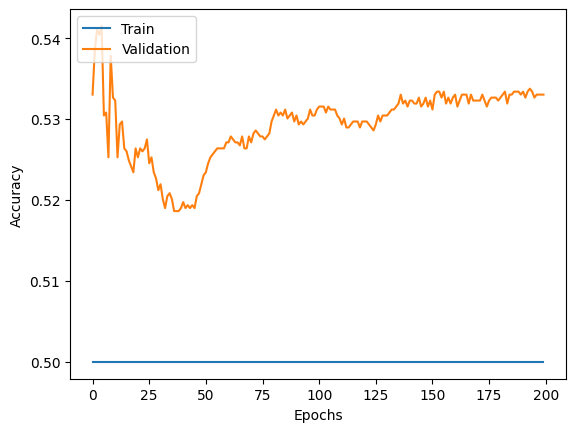

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

VALIDATION SET --------------------------------------------------------------
Confusion Matrix:
[[604 639]
 [171 159]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.49      0.60      1243
         1.0       0.20      0.48      0.28       330

    accuracy                           0.49      1573
   macro avg       0.49      0.48      0.44      1573
weighted avg       0.66      0.49      0.53      1573



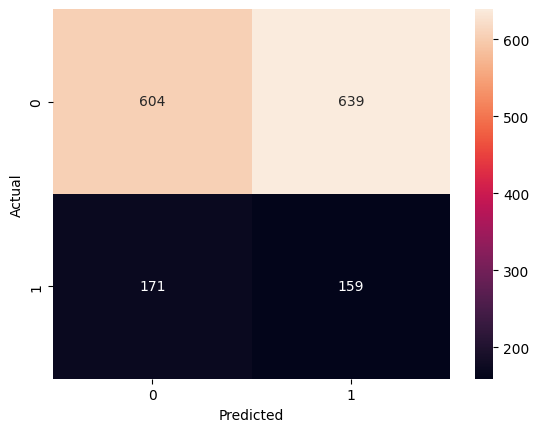

Validation AUC: 0.4709378580657744


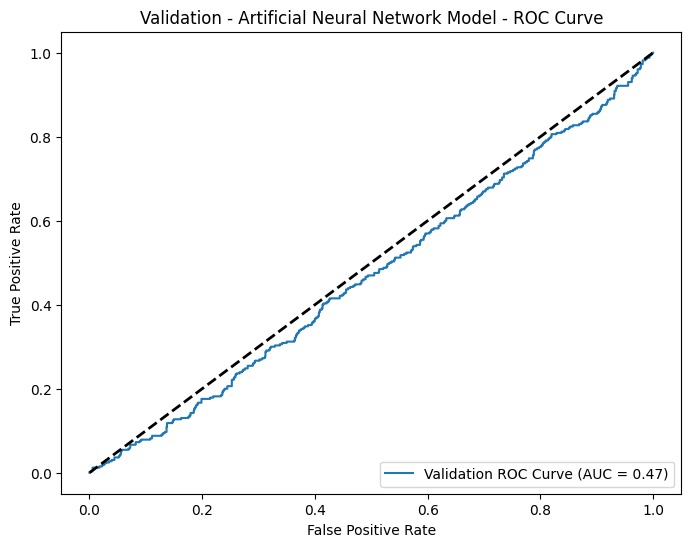

TRAINING SET --------------------------------------------------------------
Training AUC: 0.4823511207259179


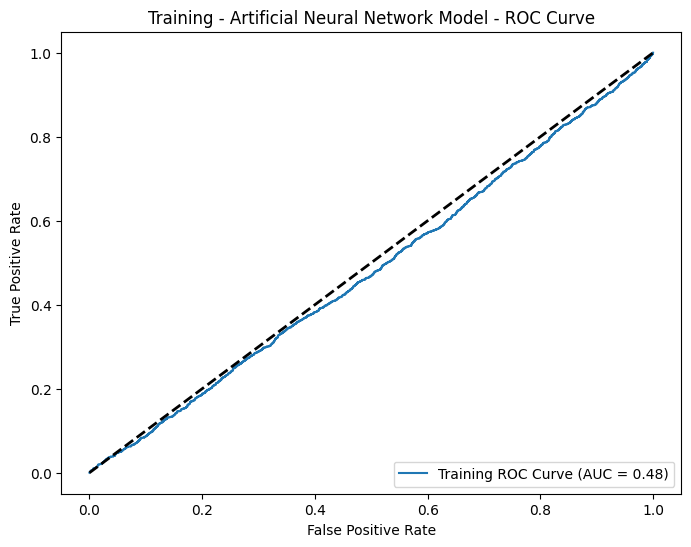

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import torch as t

# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data =============================================
    print("VALIDATION SET --------------------------------------------------------------")
    X_val = t.Tensor(X_test_NN).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y_val = t.Tensor(Y_test_NN).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    y_pred_val_proba_ANN = forward(X_val)  # Pass validation data through the trained model
    y_pred_val_proba_ANN = y_pred_val_proba_ANN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Apply the threshold
    threshold = 0.5
    y_pred_val_ANN = (y_pred_val_proba_ANN >= threshold).astype(int)

    # Evaluate the model
    conf_matrix_val_ANN = confusion_matrix(Y_val, y_pred_val_ANN)
    class_report_val_ANN = classification_report(Y_val, y_pred_val_ANN)

    print("Confusion Matrix:")
    print(conf_matrix_val_ANN)
    print("\nClassification Report:")
    print(class_report_val_ANN)

    # Visualize confusion matrix
    sns.heatmap(conf_matrix_val_ANN, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Calculate AUC for validation data
    auc_val_ANN = roc_auc_score(Y_val.numpy(), y_pred_val_proba_ANN)

    # Print the validation AUC
    print("Validation AUC:", auc_val_ANN)

    # Plot ROC curve for the validation set
    fpr_val_ANN, tpr_val_ANN, _ = roc_curve(Y_val.numpy(), y_pred_val_proba_ANN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val_ANN, tpr_val_ANN, label=f'Validation ROC Curve (AUC = {auc_val_ANN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Validation - Artificial Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


    # Now, evaluate the model on the training data =============================
    print("TRAINING SET --------------------------------------------------------------")
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train_ANN = forward(X_train)  # Pass training data through the trained model
    probs_train_ANN = probs_train_ANN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train_ANN = roc_auc_score(Y_train.numpy(), probs_train_ANN)

    # Print the training AUC
    print("Training AUC:", auc_train_ANN)

    # Plot ROC curve for the training set
    fpr_train_ANN, tpr_train_ANN, _ = roc_curve(Y_train.numpy(), probs_train_ANN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train_ANN, tpr_train_ANN, label=f'Training ROC Curve (AUC = {auc_train_ANN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training - Artificial Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# import torch as t
# import torch.nn as nn
# from torch.optim import Adam
# from torch.utils.data import TensorDataset, DataLoader
# import matplotlib.pyplot as plt
# import torch.nn.init as init

# # Define the number of neurons in the first to fifth hidden layers
# hidden_units_layer_1 = 40
# hidden_units_layer_2 = 40
# hidden_units_layer_3 = 40
# hidden_units_layer_4 = 40
# hidden_units_layer_5 = 40

# # Define the input features
# number_of_input_features = 67

# # FIRST LAYER: Define weights and biases for the first layer
# W1 = t.randn((number_of_input_features, hidden_units_layer_1), requires_grad=True)
# B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# # SECOND LAYER: Define weights and biases for the second layer
# W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
# B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# # THIRD LAYER: Define weights and biases for the third layer
# W3 = t.randn((hidden_units_layer_2, hidden_units_layer_3), requires_grad=True)
# B3 = t.zeros((1, hidden_units_layer_3), requires_grad=True)

# # 4th LAYER: Define weights and biases for the fourth layer
# W4 = t.randn((hidden_units_layer_3, hidden_units_layer_4), requires_grad=True)
# B4 = t.zeros((1, hidden_units_layer_4), requires_grad=True)

# # 5th LAYER: Define weights and biases for the fifth layer
# W5 = t.randn((hidden_units_layer_4, hidden_units_layer_5), requires_grad=True)
# B5 = t.zeros((1, hidden_units_layer_5), requires_grad=True)

# # 6th LAYER: Define weights and biases for the output layer
# W6 = t.randn((hidden_units_layer_5, 1), requires_grad=True)
# B6 = t.zeros((1, 1), requires_grad=True)

# # Define the forward pass of the neural network
# def forward(input):
#     # First hidden layer with tanh activation
#     out = t.tanh(input @ W1 + B1)

#     # Second hidden layer with tanh activation
#     out = t.tanh(out @ W2 + B2)

#     # Third hidden layer with tanh activation
#     out = t.tanh(out @ W3 + B3)

#     # 4th hidden layer with tanh activation
#     out = t.tanh(out @ W4 + B4)

#     # 5th hidden layer with tanh activation
#     out = t.tanh(out @ W5 + B5)

#     # Output layer with sigmoid activation (binary classification)
#     out = t.sigmoid(out @ W6 + B6)

#     return out

# # Regularization term (lambda)
# landa = 0.01

# #define model params
# epochs = 1000
# learning_rate = 0.1
# batch_size = 32

# # Convert the training and testing data to PyTorch tensors
# X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
# Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)
# X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
# Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

# # Create a dataset from tensors to be used with DataLoader
# train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
# train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Define the neural network model with regularization, Batch Normalization, and weight initialization
# model = nn.Sequential(
#     nn.Linear(number_of_input_features, hidden_units_layer_1),
#     nn.BatchNorm1d(hidden_units_layer_1),
#     nn.ReLU(),
#     nn.Linear(hidden_units_layer_1, hidden_units_layer_2),
#     nn.BatchNorm1d(hidden_units_layer_2),
#     nn.ReLU(),
#     nn.Linear(hidden_units_layer_2, hidden_units_layer_3),
#     nn.BatchNorm1d(hidden_units_layer_3),
#     nn.ReLU(),
#     nn.Linear(hidden_units_layer_3, hidden_units_layer_4),
#     nn.BatchNorm1d(hidden_units_layer_4),
#     nn.ReLU(),
#     nn.Linear(hidden_units_layer_4, hidden_units_layer_5),
#     nn.BatchNorm1d(hidden_units_layer_5),
#     nn.ReLU(),
#     nn.Linear(hidden_units_layer_5, 1),
#     nn.Sigmoid()
# )

# # Apply weight initialization (Xavier initialization)
# for layer in model:
#     if isinstance(layer, nn.Linear):
#         init.xavier_uniform_(layer.weight)

# # Define the optimizer
# optimizer = Adam(model.parameters(), lr=learning_rate)

# # Define the loss function with Binary Cross-Entropy Loss
# loss_fn = nn.BCELoss()

# # Lists to store training accuracy, validation accuracy, and training loss over epochs
# train_accuracy_list = []
# validation_accuracy_list = []
# train_loss_list = []

# for epoch in range(epochs):
#     if epoch % 500 == 0:
#         learning_rate *= 0.9  # Learning rate scheduling

#     per_epoch_loss_list = []

#     for batch_idx, (X_batch, Y_batch) in enumerate(train_data_loader):
#         # Forward pass: Compute predictions
#         probs = model(X_batch)

#         # Adding regularization term for all parameters in the model
#         l2_term = sum([(w ** 2).sum() for w in model.parameters()])

#         # New loss is the old loss + regularization term
#         loss = loss_fn(probs.view(-1, 1), Y_batch) + landa * l2_term

#         per_epoch_loss_list.append(loss.item())

#         # Backward pass: Compute gradient and update weights
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # Evaluate the model on training and validation data
#     with t.no_grad():
#         # Set the model in eval mode; some layers use this for certain calculations during training
#         model.eval()

#         # Calculate accuracy on train data
#         probs = model(X_train_tensor)
#         prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
#         train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

#         # Calculate accuracy on validation data
#         probs = model(X_test_tensor)
#         prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
#         validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

#         # Print accuracy for the current epoch
#         print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

#         # Set the model back to train mode
#         model.train()

#         # Append accuracy values to lists
#         train_accuracy_list.append(train_accuracy)
#         validation_accuracy_list.append(validation_accuracy)

#     # Calculate and append the average loss for the epoch
#     train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 1/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 2/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 3/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.2097902148962021
Epoch 4/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 5/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 6/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.2097902148962021
Epoch 7/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.2097902148962021
Epoch 8/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 9/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.2097902148962021
Epoch 10/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 11/1000 ---> Train Accuracy: 0.5, Validation Accuracy: 0.7902097702026367
Epoch 12/1000 ---> Train Accuracy: 0.5, Validation

KeyboardInterrupt: ignored

In [ ]:
   # Plot ROC curve for the validation set
    fpr_test_2NN, tpr_test_2NN, _ = roc_curve(Y_val.numpy(), y_pred_test_proba_2NN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test_2NN, tpr_test_2NN, label=f'Validation ROC Curve (AUC = {auc_test_2NN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Validation - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


    # Now, evaluate the model on the training data =============================
    print("TRAINING SET --------------------------------------------------------------")
    X_train = t.Tensor(X_train_NN).type(t.float32)  # Convert training features to a PyTorch tensor
    Y_train = t.Tensor(Y_train_NN).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs_train_2NN = forward(X_train)  # Pass training data through the trained model
    probs_train_2NN = probs_train_2NN.view(-1, 1).numpy()  # Convert PyTorch tensor to NumPy array

    # Calculate AUC for training data
    auc_train_2NN = roc_auc_score(Y_train.numpy(), probs_train_2NN)

    # Print the training AUC
    print("Training AUC:", auc_train_2NN)

    # Plot ROC curve for the training set
    fpr_train_2NN, tpr_train_2NN, _ = roc_curve(Y_train.numpy(), probs_train_2NN)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train_BNN, tpr_train_BNN, label=f'Training ROC Curve (AUC = {auc_train_2NN:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Training - Neural Network Model - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

## Section E5 - Model Performance

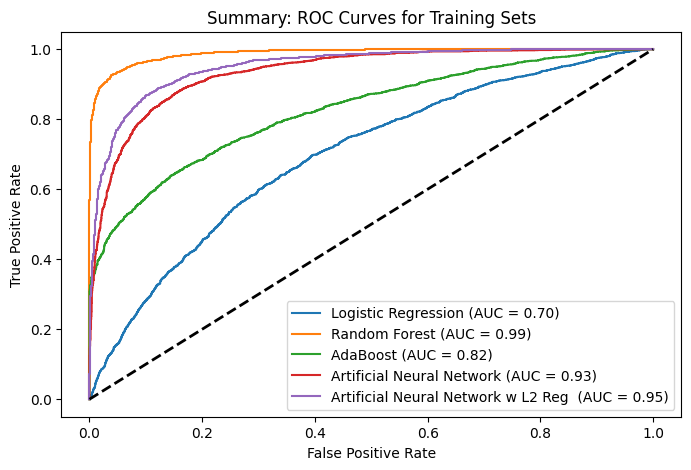

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('Summary: ROC Curves for Training Sets')
plt.plot(fpr_LR, tpr_LR, label=f'Logistic Regression (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_RF, tpr_RF, label=f'Random Forest (AUC = {roc_auc_train_RF:.2f})')
plt.plot(fpr_ADA, tpr_ADA, label=f'AdaBoost (AUC = {roc_auc_train_ADA:.2f})')
plt.plot(fpr_train_BNN, tpr_train_BNN, label=f'Artificial Neural Network (AUC = {auc_train_BNN:.2f})')
plt.plot(fpr_train_2NN, tpr_train_2NN, label=f'Artificial Neural Network w L2 Reg  (AUC = {auc_train_2NN:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()


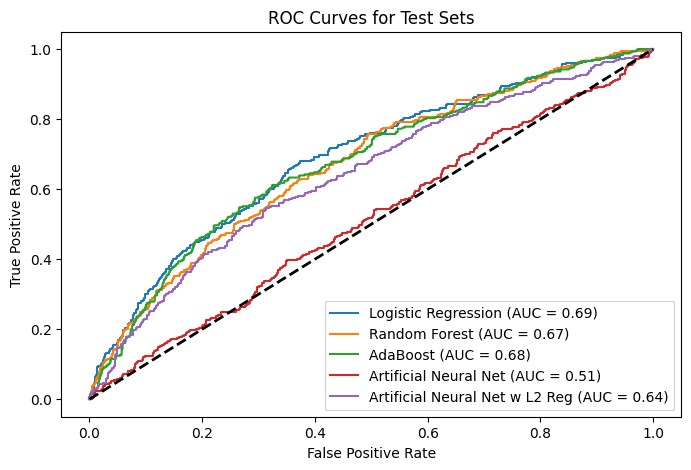

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 5))

# Plotting the ROC curves for training sets (all models)
plt.title('ROC Curves for Test Sets')
plt.plot(fpr_LR_T, tpr_LR_T, label=f'Logistic Regression (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_RF_T, tpr_RF_T, label=f'Random Forest (AUC = {roc_auc_test_RF:.2f})')
plt.plot(fpr_ADA_T, tpr_ADA_T, label=f'AdaBoost (AUC = {roc_auc_test_ADA:.2f})')
plt.plot(fpr_test_BNN, tpr_test_BNN, label=f'Artificial Neural Net (AUC = {auc_test_BNN:.2f})')
plt.plot(fpr_test_2NN, tpr_test_2NN, label=f'Artificial Neural Net w L2 Reg (AUC = {auc_test_2NN:.2f})')
# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Display the graph
plt.show()

In [ ]:
# END OF CODE

# END OF CODE - BELOW IS ADDITIONAL CODE WE TESTED BUT COULD NOT TROUBLESHOOT

## EXTRA Neutal Network Testing Different Approaches

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 67
number_of_hidden_units = 40
epochs = 100
learning_rate = 0.001
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)

X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])
        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1, 1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs_train = model(X_train_tensor)
        prediction_train = (probs_train >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs_val = model(X_test_tensor)
        prediction_val = (probs_val >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction_val == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))


Epoch 0/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5254418253898621
Epoch 1/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5573834180831909
Epoch 2/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5599833130836487
Epoch 3/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5525550842285156
Epoch 4/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5529264807701111
Epoch 5/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5573834180831909
Epoch 6/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5488409399986267
Epoch 7/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5685258507728577
Epoch 8/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5414126515388489
Epoch 9/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5451267957687378
Epoch 10/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5544121265411377
Epoch 11/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.5503265857696533
Epoch 12/100 ---> Train Accuracy: 0.5, Validation Accuracy: 0.

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 67
number_of_hidden_units = 40
epochs = 200
learning_rate = 0.005
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)

X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1, 1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs_train = model(X_train_tensor)
        prediction_train = (probs_train >= 0.5).type(t.float32).view(-1).numpy()
        train_accuracy = accuracy_score(Y_train_tensor.numpy(), prediction_train)

        # Calculate accuracy on validation data
        probs_val = model(X_test_tensor)
        prediction_val = (probs_val >= 0.5).type(t.float32).view(-1).numpy()
        validation_accuracy = accuracy_score(Y_test_tensor.numpy(), prediction_val)

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))


In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
number_of_input_features = 67  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 40  # Number of hidden units in the neural network
epochs = 1000  # Number of training epochs
learning_rate = 0.001  # Learning rate for the optimizer
batch_size = 32  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)
X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1, 1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [ ]:
# Importing necessary libraries
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 67
number_of_hidden_units = 40
epochs = 1000
learning_rate = 0.001
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train_NN).type(t.float32)
Y_train_tensor = t.Tensor(Y_train_NN).type(t.float32)

X_test_tensor = t.Tensor(X_test_NN).type(t.float32)
Y_test_tensor = t.Tensor(Y_test_NN).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1, 1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## EXTRA - Neural Network - Separate Pipeline


**Data and Necessary Libraries**

In [ ]:
#Making a copy of the data frame
data_nn = data.copy()

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

**Data Preparation**

In [ ]:
data_nn.head()

Age_at_Exam    sBP        BMI   LDL       HDL  A1c        TG  FBS>DM  \
1           62  135.0  25.846483  2.49  1.370000  5.8  0.314811       1   
2           63  133.0  30.900000  1.65  1.280404  6.1 -0.274437       1   
3           51  136.0  56.710775  2.80  1.940000  6.0 -0.010050       1   
4           40  123.0  33.067867  2.48  1.170000  5.8  0.039221       1   
5           60  130.0  67.751227  2.20  1.380000  6.1 -0.274437       1   

   Diabetes  Depression  HTN  OA  COPD  Sex  HTRX_ACEBUTOLOL  HTRX_ALISKIREN  \
1         0           0    1   0     0    1                0               0   
2         0           0    1   0     1    0                0               0   
3         0           0    0   0     0    1                0               0   
4         0           1    0   0     0    1                0               0   
5         0           0    1   0     0    1                0               0   

   HTRX_AMLODIPINE  HTRX_ATENOLOL  HTRX_BENAZEPRIL  HTRX_BISOPROLOL  \
1                0              0                0                0   
2                0              0                0                0   
3                0              0                0                0   
4                0              0                0                0   
5                0              1                0                0   

   HTRX_CANDESARTAN  HTRX_CARVEDILOL  HTRX_CILAZAPRIL  HTRX_DILTIAZEM  \
1                 0                0                0               0   
2                 0                0                0               0   
3                 0                0                0               0   
4                 0                0                0               0   
5                 0                0                0               0   

   HTRX_DIURETIC  HTRX_DOXAZOSIN  HTRX_ENALAPRIL  HTRX_EPROSARTAN  \
1              0               0               0                0   
2              0               0               0                0   
3              0               0               0                0   
4              0               0               0                0   
5              0               0               0                0   

   HTRX_FELODIPINE  HTRX_FOSINOPRIL  HTRX_FUROSEMIDE  \
1                0                0                1   
2                0                0                0   
3                0                0                0   
4                0                0                0   
5                0                0                0   

   HTRX_HYDROCHLOROTHIAZIDE  HTRX_IRBESARTAN  HTRX_LABETALOL  HTRX_LISINOPRIL  \
1                         0                0               0                0   
2                         0                0               0                0   
3                         0                0               0                0   
4                         0                0               0                0   
5                         0                0               0                0   

   HTRX_LOSARTAN  HTRX_METOPROLOL  HTRX_NADOLOL  HTRX_NIFEDIPINE  \
1              0                0             0                0   
2              1                1             0                0   
3              0                0             0                0   
4              0                0             0                0   
5              0                0             0                1   

   HTRX_OLMESARTAN MEDOXOMIL  HTRX_PERINDOPRIL  HTRX_POTASSIUM-SPARING AGENTS  \
1                          0                 0                              0   
2                          0                 0                              0   
3                          0                 0                              0   
4                          0                 0                              0   
5                          0                 0                              0   

   HTRX_PROPRANOLOL  HTRX_QUINAPRIL  HTRX_RAMIPRIL  HTRX_SOTALOL  \
1 

In [ ]:
# Assuming 'HDL' is the variable you want to impute with the mean
mean_HDL = data_nn['HDL'].mean()

# Replace missing values in 'HDL' with the mean
data_nn['HDL'].fillna(mean_HDL, inplace=True)

In [ ]:
# Delete unnecessary variables from the dataset

# DeleteList=['Diabetes', 'OBS_DATE',	'Diabetes_YRS',	'HTN_YRS',	'OA_YRS',	'COPD_YRS']
DeleteList=['Patient_ID']

data_nn = data_nn.drop(DeleteList, axis=1)

In [ ]:
# Delete unnecessary variables from the dataset

# DeleteList=['Diabetes', 'OBS_DATE',	'Diabetes_YRS',	'HTN_YRS',	'OA_YRS',	'COPD_YRS']
DeleteList=['OBS_DATE']

data_nn = data_nn.drop(DeleteList, axis=1)

In [ ]:
print(data.shape)

(7862, 66)


In [ ]:
# Randomly sample 80% of the data for training
train_data = data_nn.sample(frac = .8, random_state=10)

# Use the remaining 20% for testing
test_data = data_nn.drop(train_data.index)

# Check the mean of the 'DEATH_EVENT' column in both training and testing data
train_data['Depression'].mean()
test_data['Depression'].mean()

# Data Preparation

# Extract the 'DEATH_EVENT' column as the target variable for training and testing
Y_train = train_data['Depression'].to_numpy()
Y_test = test_data['Depression'].to_numpy()

# Extract the features (excluding 'DEATH_EVENT') for training and testing
X_train = train_data.drop('Depression', axis=1).to_numpy()
X_test = test_data.drop('Depression', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Initializing NN Parameters**

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 40
hidden_units_layer_2 = 40

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((63, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

**Implementing the Forward Pass of NN**

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out


**Preparing Data and Training Utilities for NN Training**

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.001
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

**Training Loop for the NN**

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1, 1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

ValueError: ignored

**Visualizing Training Loss Over Epochs**

Text(0, 0.5, 'loss')

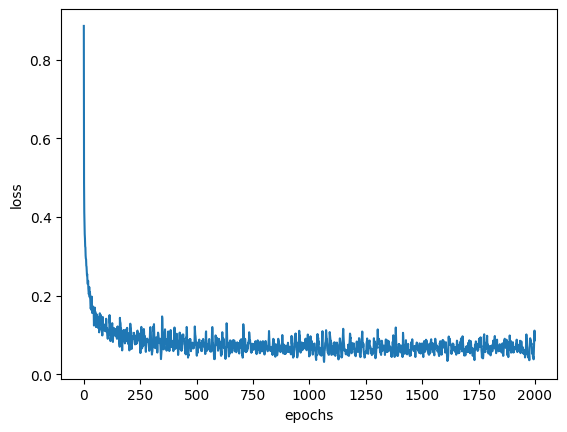

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

**Evaluating Model Performance**

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

1.9422909021377563
0.06834594905376434


**Regularized Training for NN**

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 60
number_of_hidden_units = 40
epochs = 100
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.795071542263031, Validation Accuracy: 0.775445282459259
Epoch 1/100 ---> Train Accuracy: 0.796502411365509, Validation Accuracy: 0.7722646594047546
Epoch 2/100 ---> Train Accuracy: 0.7955484986305237, Validation Accuracy: 0.7868956923484802
Epoch 3/100 ---> Train Accuracy: 0.7963433861732483, Validation Accuracy: 0.7843511700630188
Epoch 4/100 ---> Train Accuracy: 0.7960254549980164, Validation Accuracy: 0.7811704874038696
Epoch 5/100 ---> Train Accuracy: 0.7976152896881104, Validation Accuracy: 0.7849872708320618
Epoch 6/100 ---> Train Accuracy: 0.7960254549980164, Validation Accuracy: 0.7856234312057495
Epoch 7/100 ---> Train Accuracy: 0.7963433861732483, Validation Accuracy: 0.7868956923484802
Epoch 8/100 ---> Train Accuracy: 0.7960254549980164, Validation Accuracy: 0.7856234312057495
Epoch 9/100 ---> Train Accuracy: 0.7974562644958496, Validation Accuracy: 0.7862595319747925
Epoch 10/100 ---> Train Accuracy: 0.7961844205856323, Validation Accuracy

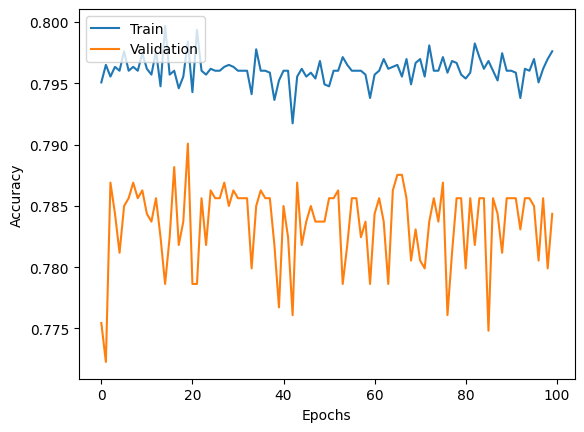

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Dropout**

In [ ]:
number_of_input_features = 60  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 40  # Number of hidden units in the neural network
epochs = 1000  # Number of training epochs
learning_rate = 0.01  # Learning rate for the optimizer
batch_size = 32  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)
X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy: 0.7976152896881104, validation_accuracy: 0.7767175436019897
epoch 1/1000 ---> train_accuracy: 0.8028616905212402, validation_accuracy: 0.7760814428329468
epoch 2/1000 ---> train_accuracy: 0.8030206561088562, validation_accuracy: 0.7849872708320618
epoch 3/1000 ---> train_accuracy: 0.7996820211410522, validation_accuracy: 0.7818065881729126
epoch 4/1000 ---> train_accuracy: 0.8007948994636536, validation_accuracy: 0.7856234312057495
epoch 5/1000 ---> train_accuracy: 0.7980921864509583, validation_accuracy: 0.7843511700630188
epoch 6/1000 ---> train_accuracy: 0.8004769682884216, validation_accuracy: 0.7849872708320618
epoch 7/1000 ---> train_accuracy: 0.8073132038116455, validation_accuracy: 0.7805343270301819
epoch 8/1000 ---> train_accuracy: 0.8050874471664429, validation_accuracy: 0.7849872708320618
epoch 9/1000 ---> train_accuracy: 0.8060413599014282, validation_accuracy: 0.7843511700630188
epoch 10/1000 ---> train_accuracy: 0.8065182566642761, valid

Text(0, 0.5, 'accuracy')

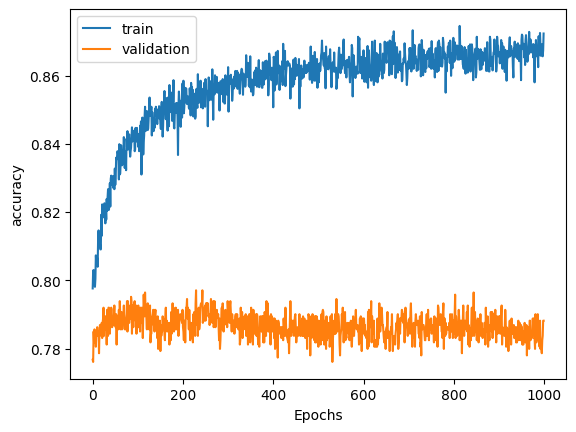

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('accuracy')

**Early Stopping**

In [ ]:
# Importing necessary libraries
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 60
number_of_hidden_units = 40
epochs = 1000
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy : 0.8023847341537476 , validation_accuracy : 0.7779898047447205
epoch 1/1000 ---> train_accuracy : 0.8063592910766602 , validation_accuracy : 0.7856234312057495
epoch 2/1000 ---> train_accuracy : 0.8090620040893555 , validation_accuracy : 0.7811704874038696
epoch 3/1000 ---> train_accuracy : 0.816534161567688 , validation_accuracy : 0.7748091816902161
epoch 4/1000 ---> train_accuracy : 0.8214626312255859 , validation_accuracy : 0.7830789089202881
epoch 5/1000 ---> train_accuracy : 0.8271859884262085 , validation_accuracy : 0.7741730213165283
epoch 6/1000 ---> train_accuracy : 0.8359300494194031 , validation_accuracy : 0.7786259651184082
epoch 7/1000 ---> train_accuracy : 0.845786988735199 , validation_accuracy : 0.7798982262611389
epoch 8/1000 ---> train_accuracy : 0.8664546608924866 , validation_accuracy : 0.7678117156028748
epoch 9/1000 ---> train_accuracy : 0.8758346438407898 , validation_accuracy : 0.7690839767456055
epoch 10/1000 ---> train_accurac

Text(0, 0.5, 'Accuracy')

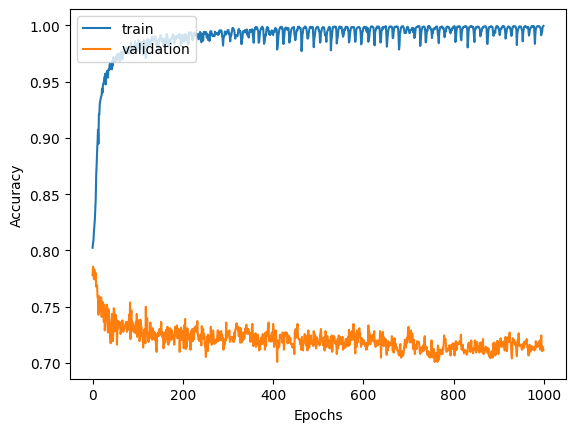

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#EXTRA: Longitudinal Models

## EXTRA - LONG MODELS: Data Pre-Processing

In [ ]:
import torch as t

#prepare data
data_long = data.copy()

In [ ]:
data_long.head()

Age_at_Exam    sBP        BMI   LDL   HDL  A1c        TG  FBS>DM  \
2138           75  154.0  27.000000  2.35  1.59  5.7  0.270027       1   
2139           46  110.0  21.000000  2.56  1.35  5.7 -0.116534       1   
2140           57  110.0  27.475629  4.20  2.55  5.7 -0.342490       1   
2141           44  110.0  35.000000  3.72  1.15  5.7  0.048790       1   
2142           45  116.0  29.000000  3.66  1.56  5.7 -0.210721       1   

      Diabetes  Depression  HTN  OA  COPD  Sex        Patient_ID  \
2138         0           0    1   1     0    1  4001000000288198   
2139         0           1    0   0     1    1  4001000000290369   
2140         0           0    1   1     0    1  4001000000291156   
2141         0           0    0   0     0    0  4001000000291570   
2142         0           0    1   0     0    1  4001000000288296   

      HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  HTRX_ATENOLOL  \
2138                0               0                1              0   
2139                0               0                0              0   
2140                0               0                0              0   
2141                0               0                0              0   
2142                0               0                0              0   

      HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  HTRX_CARVEDILOL  \
2138                0                0                 0                0   
2139                0                0                 0                0   
2140                0                0                 0                0   
2141                0                0                 0                0   
2142                0                0                 0                0   

      HTRX_CILAZAPRIL  HTRX_DILTIAZEM  HTRX_DIURETIC  HTRX_DOXAZOSIN  \
2138                0               0              1               0   
2139                0               0              0               0   
2140                0               0              0               0   
2141                0               0              0               0   
2142                0               0              1               0   

      HTRX_ENALAPRIL  HTRX_EPROSARTAN  HTRX_FELODIPINE  HTRX_FOSINOPRIL  \
2138               0                0                0                0   
2139               0                0                0                0   
2140               0                0                0                0   
2141               0                0                0                0   
2142               0                0                0                0   

      HTRX_FUROSEMIDE  HTRX_HYDROCHLOROTHIAZIDE  HTRX_IRBESARTAN  \
2138                0                         0                0   
2139                0                         0                0   
2140                0                         1                0   
2141                0                         0                0   
2142                0                         1                0   

      HTRX_LABETALOL  HTRX_LISINOPRIL  HTRX_LOSARTAN  HTRX_METOPROLOL  \
2138               0                0              1                0   
2139               0                0              0                0   
2140               0                0              0                0   
2141               0                0              0                0   
2142               0                0              0                0   

      HTRX_NADOLOL  HTRX_NIFEDIPINE  HTRX_OLMESARTAN MEDOXOMIL  \
2138             0                0                          0   
2139             0                0                          0   
2140             0                0                          0   
2141             0                0                          0   
2142             0                0                          0   

      HTRX_PERINDOPRIL  HTRX_POTASSIUM-SPARING AGENTS  HTRX_PROPRANOLOL  \
2138                 0                        

In [ ]:
(data_long.shape)

(7862, 66)

In [ ]:
# Calculate number of patients with sequential records

# Count the occurrences of patient IDs with multiple records
patient_id_counts = data_long['Patient_ID'].value_counts()

# Count the occurrences of unique IDs for each sequential count
result = patient_id_counts.value_counts().sort_index(ascending=False)

# Get the sum of IDs that have 2 or more rows of data
sum_ids_2_or_more = result[result.index >= 2].sum()

print("Sum of IDs with 2 or more rows of data:", sum_ids_2_or_more)

# Filter only the IDs with 2 or more rows
ids_2_or_more = patient_id_counts[patient_id_counts >= 2].index

# Create a mask to select rows with those IDs
mask = data_long['Patient_ID'].isin(ids_2_or_more)

# Get the total number of rows associated with patients who have 2 or more rows
total_rows_2_or_more = len(data_long[mask])

# Print the total number of rows associated with patients with 2 or more rows
print("Total number of rows associated with patients with 2 or more rows:", total_rows_2_or_more)

Sum of IDs with 2 or more rows of data: 962
Total number of rows associated with patients with 2 or more rows: 2195


In [ ]:
subset_data = data_long[mask]

In [ ]:
(subset_data.shape)

(2195, 66)

In [ ]:
#convert years with condition into an ordinal variable - (count of years, integer)
# List of columns to round to the nearest whole number
columns_to_round = ['Diabetes_YRS', 'HTN_YRS', 'OA_YRS', 'COPD_YRS']

# Round the specified columns in the main dataset
subset_data[columns_to_round] = subset_data[columns_to_round].round()

# Ensure the specified columns are of integer type
subset_data[columns_to_round] = subset_data[columns_to_round].astype(int)

In [ ]:
subset_data = pd.get_dummies(subset_data, columns=['Med_Cluster'], prefix='Med_Cluster')

In [ ]:
label_column = ['Depression']
binary_columns = ['FBS>DM', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex',
                  'HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN', 'HTRX_AMLODIPINE', 'HTRX_ATENOLOL',
                  'HTRX_BENAZEPRIL', 'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN',
                  'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC',
                  'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN',
                  'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE',
                  'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LABETALOL',
                  'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL',
                  'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
                  'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
                  'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE',
                  'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL',
                  'HTRX_VALSARTAN', 'HTRX_VERAPAMIL', 'CSRX_ANTIBIOTICS',
                  'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE',
                  'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISOLONE', 'CSRX_PREDNISONE',]
med_clust_columns = ['Med_Cluster_0', 'Med_Cluster_1', 'Med_Cluster_2', 'Med_Cluster_3', 'Med_Cluster_4']
ordinal_columns = ['Diabetes_YRS', 'HTN_YRS', 'OA_YRS', 'COPD_YRS']
numeric_columns = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG']

#these are defined but will not be included after scaling - can be used for recursive model selection
id_columns = ['Patient_ID']
date_columns = ['OBS_DATE']

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data_processed' DataFrame
pd.set_option('display.max_rows', None) #set max rows

missing_value_counts = subset_data.isnull().sum()
missing_value_counts

# Calculate the percentage of missing values
total_values = len(subset_data)
percentage_missing = (missing_value_counts / total_values) * 100
percentage_missing

Age_at_Exam                      0.000000
sBP                              0.000000
BMI                              0.000000
LDL                              0.728929
HDL                              0.227790
A1c                              0.000000
TG                               0.182232
FBS>DM                           0.000000
Diabetes                         0.000000
Depression                       0.000000
HTN                              0.000000
OA                               0.000000
COPD                             0.000000
Sex                              0.000000
Patient_ID                       0.000000
HTRX_ACEBUTOLOL                  0.000000
HTRX_ALISKIREN                   0.000000
HTRX_AMLODIPINE                  0.000000
HTRX_ATENOLOL                    0.000000
HTRX_BENAZEPRIL                  0.000000
HTRX_BISOPROLOL                  0.000000
HTRX_CANDESARTAN                 0.000000
HTRX_CARVEDILOL                  0.000000
HTRX_CILAZAPRIL                  0

In [ ]:
# Calculate class imbalance for the target variable
class_imbalance = subset_data[label_column].value_counts()
total_samples = len(subset_data)

# Print class imbalance with percentage for the target variable
print("Class Imbalance for Depression (Label):")
for class_label, count in class_imbalance.items():
    percentage = (count / total_samples) * 100
    print(f"{class_label}: {count} samples ({percentage:.2f}%)")

Class Imbalance for Depression (Label):
(0,): 1729 samples (78.77%)
(1,): 466 samples (21.23%)


In [ ]:
#sort by date-time, ascending
subset_data = subset_data.sort_values(by='OBS_DATE')

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'Patient_ID' and creating a list of dataframes, one per group
grouped = subset_data.groupby('Patient_ID')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((1762, 70), (433, 70))

In [ ]:
from sklearn.preprocessing import StandardScaler
from impyute.imputation.cs import mice

# Identifying numerical columns (excluding 'patient_nbr' and 'readmitted')
numerical_columns = numeric_columns + ordinal_columns + med_clust_columns + binary_columns

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Drop 'OBS_DATE' from train_df
train_df.drop(columns=['OBS_DATE'], inplace=True)

# Drop 'OBS_DATE' from test_df
test_df.drop(columns=['OBS_DATE'], inplace=True)

# Perform MICE imputation on continuous variables
continuous_variables_missing = ['sBP', 'LDL', 'HDL', 'TG']

# Copy the data to avoid modifying the original
train_df_imputed = train_df.copy()
test_df_imputed = test_df.copy()

# Extract the features with missing values
features_with_missing_train = train_df_imputed[continuous_variables_missing]
features_with_missing_test = test_df_imputed[continuous_variables_missing]

# Perform MICE imputation
imputed_values_train = mice(features_with_missing_train.values)
imputed_values_test = mice(features_with_missing_test.values)

# Assign the imputed values back to the DataFrame
train_df_imputed[continuous_variables_missing] = imputed_values_train
test_df_imputed[continuous_variables_missing] = imputed_values_test

# Checking the first few rows of the imputed and normalized training data
(train_df_imputed.head())

Age_at_Exam       sBP       BMI       LDL       HDL       A1c        TG  \
8600    -0.235730  1.475634  0.600470 -1.243186 -0.491707  0.458001 -1.247763   
9315    -0.148139  2.164743  0.534831 -1.163045 -0.293750  1.091296 -0.439677   
7356     0.990541  2.164743 -0.563129 -0.979866 -0.972459 -0.069745 -0.741873   
9379     1.253314  1.131079 -0.400523 -0.911173 -1.000739  1.196846  0.409156   
6180     0.289815 -0.706546 -0.776456 -0.934071  0.356679 -0.491942 -0.642532   

        FBS>DM  Diabetes  Depression       HTN        OA      COPD       Sex  \
8600  0.321432  0.502305           0  0.494318  1.285929 -0.363855  0.968707   
9315  0.321432  0.502305           0  0.494318  1.285929 -0.363855  0.968707   
7356  0.321432  0.502305           0 -2.022989 -0.777648  2.748345  0.968707   
9379  0.321432  0.502305           0 -2.022989 -0.777648  2.748345  0.968707   
6180  0.321432  0.502305           1  0.494318  1.285929 -0.363855  0.968707   

            Patient_ID  HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  \
8600  4001000000054225        -0.082808       -0.071652         1.597629   
9315  4001000000054225        -0.082808       -0.071652         1.597629   
7356  9001000000006764        -0.082808       -0.071652        -0.625927   
9379  9001000000006764        -0.082808       -0.071652        -0.625927   
6180  4001000000113480        -0.082808       -0.071652        -0.625927   

      HTRX_ATENOLOL  HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  \
8600       -0.36983          -0.0477        -0.324646         -0.204907   
9315       -0.36983          -0.0477        -0.324646         -0.204907   
7356       -0.36983          -0.0477        -0.324646         -0.204907   
9379       -0.36983          -0.0477        -0.324646         -0.204907   
6180       -0.36983          -0.0477        -0.324646         -0.204907   

      HTRX_CARVEDILOL  HTRX_CILAZAPRIL  HTRX_DILTIAZEM  HTRX_DIURETIC  \
8600        -0.112444        -0.082808       -0.291505      -0.498758   
9315        -0.112444        -0.082808       -0.291505      -0.498758   
7356        -0.112444        -0.082808       -0.291505      -0.498758   
9379        -0.112444        -0.082808       -0.291505      -0.498758   
6180        -0.112444        -0.082808       -0.291505      -0.498758   

      HTRX_DOXAZOSIN  HTRX_ENALAPRIL  HTRX_EPROSARTAN  HTRX_FELODIPINE  \
8600       -0.140271       -0.229279          -0.0477        -0.104407   
9315       -0.140271       -0.229279          -0.0477        -0.104407   
7356       -0.140271       -0.229279          -0.0477        -0.104407   
9379       -0.140271       -0.229279          -0.0477        -0.104407   
6180       -0.140271       -0.229279          -0.0477        -0.104407   

      HTRX_FOSINOPRIL  HTRX_FUROSEMIDE  HTRX_HYDROCHLOROTHIAZIDE  \
8600         -0.07555        -0.383582                 -0.707709   
9315         -0.07555        -0.383582                 -0.707709   
7356         -0.07555        -0.383582                 -0.707709   
9379         -0.07555        -0.383582                 -0.707709   
6180         -0.07555        -0.383582                 -0.707709   

      HTRX_IRBESARTAN  HTRX_LABETALOL  HTRX_LISINOPRIL  HTRX_LOSARTAN  \
8600        -0.361852        -0.07926        -0.212314       -0.27514   
9315        -0.361852        -0.07926        -0.212314       -0.27514   
7356        -0.361852        -0.07926        -0.212314       -0.27514   
9379        -0.361852        -0.07926        -0.212314       -0.27514   
6180        -0.361852        -0.07926        -0.212314       -0.27514   

      HTRX_METOPROLOL  HTRX_NADOLOL  HTRX_NIFEDIPINE  \
8600        -0.416056     -0.089494        -0.291505   
9315        -0.416056     -0.089494        -0.291505   
7356        -0.416056     -0.089494        -0.291505   
9379        -0.416056     -0.089494        -0.291505   
6180        -0.416056     -0.089494        -0.291505   

      HTRX_OLMESARTAN MEDOXOMIL  HTRX_PERINDOPRIL  \
8600    

In [ ]:
(train_df_imputed.shape)

(1762, 69)

In [ ]:
(test_df_imputed.shape)

(433, 69)

In [ ]:
# Check for missing values after MICE imputation on the training set
missing_value_counts_train = train_df_imputed.isnull().sum()

# Check for missing values after MICE imputation on the testing set
missing_value_counts_test = test_df_imputed.isnull().sum()

# Display the results
print("Missing Values in Training Set:")
print(missing_value_counts_train)

print("\nMissing Values in Testing Set:")
print(missing_value_counts_test)

Missing Values in Training Set:
Age_at_Exam                      0
sBP                              0
BMI                              0
LDL                              0
HDL                              0
A1c                              0
TG                               0
FBS>DM                           0
Diabetes                         0
Depression                       0
HTN                              0
OA                               0
COPD                             0
Sex                              0
Patient_ID                       0
HTRX_ACEBUTOLOL                  0
HTRX_ALISKIREN                   0
HTRX_AMLODIPINE                  0
HTRX_ATENOLOL                    0
HTRX_BENAZEPRIL                  0
HTRX_BISOPROLOL                  0
HTRX_CANDESARTAN                 0
HTRX_CARVEDILOL                  0
HTRX_CILAZAPRIL                  0
HTRX_DILTIAZEM                   0
HTRX_DIURETIC                    0
HTRX_DOXAZOSIN                   0
HTRX_ENALAPRIL         

In [ ]:
# Checking the class distribution in the 'Depression' column of the training set
class_distribution = train_df.groupby('Patient_ID').apply(lambda x : x.iloc[-1]['Depression']).value_counts()
class_distribution

0.0    594
1.0    175
dtype: int64

In [ ]:
from sklearn.utils import resample

# Grouping the original training data by 'Patient_ID'
grouped_by_patient = train_df.groupby('Patient_ID')

# Creating separate lists for each class
groups_class_0 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Depression'].iloc[-1] == 0]
groups_class_1 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Depression'].iloc[-1] == 1]

In [ ]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Oversampling the minority groups (class 1)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_1 + groups_class_0

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'Patient_ID'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

1188it [00:00, 1883.78it/s]


In [ ]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('Patient_ID').apply(lambda x : x.iloc[-1]['Depression']).value_counts())

1.0    594
0.0    594
dtype: int64


In [ ]:
train_df_balanced.head()

Age_at_Exam       sBP       BMI       LDL       HDL       A1c        TG  \
0    -2.162726  0.671673 -1.119486  0.840482 -0.265471 -0.069745 -0.585174   
1    -2.075136 -0.706546 -1.119486  1.584650  0.187002  0.035804  0.227782   
2    -1.987545 -0.878823 -1.027939 -0.373083  0.102163  0.669099 -0.911646   
3     0.990541  0.097415  1.680529 -0.499019  0.526357 -0.280844  0.000572   
4     1.078132 -0.534268  1.680529 -0.682199  0.950550 -0.597491  0.477411   

     FBS>DM  Diabetes  Depression       HTN        OA      COPD       Sex  \
0  0.321432  0.502305           1  0.494318 -0.777648 -0.363855  0.968707   
1  0.321432  0.502305           1  0.494318 -0.777648 -0.363855  0.968707   
2  0.321432  0.502305           1  0.494318 -0.777648 -0.363855  0.968707   
3  0.321432  0.502305           1  0.494318 -0.777648 -0.363855  0.968707   
4  0.321432  0.502305           1  0.494318 -0.777648 -0.363855  0.968707   

   Patient_ID  HTRX_ACEBUTOLOL  HTRX_ALISKIREN  HTRX_AMLODIPINE  \
0           0        -0.082808       -0.071652        -0.625927   
1           0        -0.082808       -0.071652        -0.625927   
2           0        -0.082808       -0.071652        -0.625927   
3           1        -0.082808       -0.071652         1.597629   
4           1        -0.082808       -0.071652         1.597629   

   HTRX_ATENOLOL  HTRX_BENAZEPRIL  HTRX_BISOPROLOL  HTRX_CANDESARTAN  \
0       -0.36983          -0.0477        -0.324646         -0.204907   
1       -0.36983          -0.0477        -0.324646         -0.204907   
2       -0.36983          -0.0477        -0.324646         -0.204907   
3       -0.36983          -0.0477         3.080275         -0.204907   
4       -0.36983          -0.0477         3.080275         -0.204907   

   HTRX_CARVEDILOL  HTRX_CILAZAPRIL  HTRX_DILTIAZEM  HTRX_DIURETIC  \
0        -0.112444        -0.082808       -0.291505      -0.498758   
1        -0.112444        -0.082808       -0.291505      -0.498758   
2        -0.112444        -0.082808       -0.291505      -0.498758   
3        -0.112444        -0.082808       -0.291505      -0.498758   
4        -0.112444        -0.082808       -0.291505      -0.498758   

   HTRX_DOXAZOSIN  HTRX_ENALAPRIL  HTRX_EPROSARTAN  HTRX_FELODIPINE  \
0       -0.140271       -0.229279          -0.0477        -0.104407   
1       -0.140271       -0.229279          -0.0477        -0.104407   
2       -0.140271       -0.229279          -0.0477        -0.104407   
3       -0.140271       -0.229279          -0.0477        -0.104407   
4       -0.140271       -0.229279          -0.0477        -0.104407   

   HTRX_FOSINOPRIL  HTRX_FUROSEMIDE  HTRX_HYDROCHLOROTHIAZIDE  \
0         -0.07555        -0.383582                 -0.707709   
1         -0.07555        -0.383582                 -0.707709   
2         -0.07555        -0.383582                 -0.707709   
3         -0.07555        -0.383582                 -0.707709   
4         -0.07555        -0.383582                 -0.707709   

   HTRX_IRBESARTAN  HTRX_LABETALOL  HTRX_LISINOPRIL  HTRX_LOSARTAN  \
0        -0.361852        -0.07926        -0.212314       -0.27514   
1        -0.361852        -0.07926        -0.212314       -0.27514   
2        -0.361852        -0.07926        -0.212314       -0.27514   
3         2.763558        -0.07926        -0.212314       -0.27514   
4         2.763558        -0.07926        -0.212314       -0.27514   

   HTRX_METOPROLOL  HTRX_NADOLOL  HTRX_NIFEDIPINE  HTRX_OLMESARTAN MEDOXOMIL  \
0        -0.416056     -0.089494        -0.291505                  -0.165545   
1        -0.416056     -0.089494        -0.291505                  -0.165545   
2        -0.416056     -0.089494        -0.291505                  -0.165545   
3        -0.416056     -0.089494        -0.291505                  -0.165545   
4        -0.416056     -0.089494        -0.291505                  -0.165545   

   HTRX_PERINDOPRIL  HTRX_POTASSIUM-SPARING AGENTS  HTRX_PROPRANOLOL  \
0          2.555370   

In [ ]:
#sequence generation

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'Patient_ID' and create sequences
grouped = train_df_balanced.groupby('Patient_ID', sort=False)
sequences = [group.drop(columns=['Patient_ID', 'Depression']).values for _, group in grouped]
targets = [group['Depression'].iloc[-1] for _, group in grouped]  # Assuming all records for a patient have the same target

# Padding sequences
min_length = 2

# Padding sequences and preparing target tensor
truncated_sequences = pad_sequences(sequences, maxlen=min_length, padding='post', dtype='float')
targets_tensor = t.tensor(targets, dtype=t.float32).long()  # Convert to long for classification


# Display the shape of the truncated_sequences
print(truncated_sequences.shape)

(1188, 2, 67)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming the dataframe is already sorted by the relevant timestamp or index
grouped = train_df_balanced.groupby('Patient_ID', sort=False)

# Collect sequences and targets
sequences = [group.drop(columns=['Patient_ID', 'Depression']).values[-2:] for _, group in grouped]
targets = [1 if any(group['Depression'].values[-2:] == 1) else 0 for _, group in grouped]

# Padding sequences
min_length = 2
truncated_sequences = pad_sequences(sequences, maxlen=min_length, padding='post', dtype='float')
targets_tensor = t.tensor(targets, dtype=t.float32).long()

# Display the shape of the truncated_sequences
print(truncated_sequences.shape)


(1188, 2, 67)


In [ ]:
# Testing sequences

# Group by 'Patient_ID' and create sequences
grouped_test = test_df_imputed.groupby('Patient_ID', sort=False)
sequences_test = [group.drop(columns=['Patient_ID', 'Depression']).values for _, group in grouped_test]
targets_test = [group['Depression'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences
min_length = 2

# Padding sequences and preparing target tensor for the test set
truncated_sequences_test = pad_sequences(sequences_test, maxlen=min_length, padding='post', dtype='float')
targets_test_tensor = t.tensor(targets_test, dtype=t.float32).long()  # Convert to long for classification


# Display the shape of the truncated_sequences_test
print(truncated_sequences_test.shape)

(193, 2, 67)


In [ ]:
# Testing sequences

# Group by 'Patient_ID' and create sequences
grouped_test = test_df_imputed.groupby('Patient_ID', sort=False)
sequences_test = [group.drop(columns=['Patient_ID', 'Depression']).values[-2:] for _, group in grouped_test]
targets_test = [1 if any(group['Depression'].values[-2:] == 1) else 0 for _, group in grouped_test]

# Padding sequences
min_length = 2
truncated_sequences_test = pad_sequences(sequences_test, maxlen=min_length, padding='post', dtype='float')
targets_test_tensor = t.tensor(targets_test, dtype=t.float32).long()

# Display the shape of the truncated_sequences_test
print(truncated_sequences_test.shape)


(193, 2, 67)


In [ ]:
# Add these variables to keep track of early stopping
best_val_accuracy = 0.0
patience = 5  # You can adjust this value

# Training loop
for epoch in range(epochs):
    model.train()
    for X, Y in train_data_loader:
        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, Y)
        loss.backward()
        optimizer.step()

    # Evaluate on training data
    model.eval()
    with t.no_grad():
        train_correct = 0
        train_total = 0
        for X, Y in train_data_loader:
            outputs = model(X)
            _, predicted = t.max(outputs.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()

    train_accuracy = 100 * train_correct / train_total

    # Evaluate on validation data
    model.eval()
    with t.no_grad():
        val_correct = 0
        val_total = 0
        for X, Y in test_data_loader:
            outputs = model(X)
            _, predicted = t.max(outputs.data, 1)
            val_total += Y.size(0)
            val_correct += (predicted == Y).sum().item()

        val_accuracy = 100 * val_correct / val_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {val_accuracy}%')

        # Check for early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping at Epoch {epoch} as validation accuracy has not improved.')
            break


Epoch 0/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 1/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 2/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 3/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 4/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 5/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Early stopping at Epoch 5 as validation accuracy has not improved.


## EXTRA - LONG MODELS - Recurrent Neural Network

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN
num_classes = 2  # For binary classification
epochs = 30
learning_rate = 0.01
batch_size = 10
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# To implement early stopping
best_val_loss = float('inf')
patience = 10
trigger_times = 0

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

NameError: ignored

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 100  # Number of hidden units in RNN
num_classes = 2  # For binary classification
epochs = 30
learning_rate = 0.0001
batch_size = 10
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.zeros_(m.bias.data)
    elif isinstance(m, nn.RNN):
        for name, param in m.named_parameters():
            if 'weight_ih' in name or 'weight_hh' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'bias_ih' in name or 'bias_hh' in name:
                nn.init.zeros_(param.data)


# Apply the initialization to your model layers
rnn_layer1.apply(weights_init)
rnn_layer2.apply(weights_init)
fc_layer1.apply(weights_init)
fc_layer2.apply(weights_init)


# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# To implement early stopping
best_val_loss = float('inf')
patience = 10
trigger_times = 0

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        # Implement gradient clipping
        nn.utils.clip_grad_norm_(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), max_norm=1.0)

        optimizer.step()

        # Print loss values for the first few batches
        if batch_idx % 10 == 0:
            print(f'Epoch {epoch}/{epochs}, Batch {batch_idx}, Loss: {loss.item()}')

    # Print average loss for the epoch
    avg_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    print(f'Epoch {epoch}/{epochs} ---> Average Train Loss: {avg_loss}')

    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/30, Batch 0, Loss: 0.9319697618484497
Epoch 0/30, Batch 10, Loss: nan
Epoch 0/30, Batch 20, Loss: nan
Epoch 0/30, Batch 30, Loss: nan
Epoch 0/30, Batch 40, Loss: nan
Epoch 0/30, Batch 50, Loss: nan
Epoch 0/30, Batch 60, Loss: nan
Epoch 0/30, Batch 70, Loss: nan
Epoch 0/30, Batch 80, Loss: nan
Epoch 0/30, Batch 90, Loss: nan
Epoch 0/30, Batch 100, Loss: nan
Epoch 0/30, Batch 110, Loss: nan
Epoch 0/30 ---> Average Train Loss: nan
Epoch 0/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 84.97409326424871%
Epoch 1/30, Batch 0, Loss: nan
Epoch 1/30, Batch 10, Loss: nan
Epoch 1/30, Batch 20, Loss: nan
Epoch 1/30, Batch 30, Loss: nan
Epoch 1/30, Batch 40, Loss: nan
Epoch 1/30, Batch 50, Loss: nan
Epoch 1/30, Batch 60, Loss: nan
Epoch 1/30, Batch 70, Loss: nan
Epoch 1/30, Batch 80, Loss: nan
Epoch 1/30, Batch 90, Loss: nan
Epoch 1/30, Batch 100, Loss: nan
Epoch 1/30, Batch 110, Loss: nan
Epoch 1/30 ---> Average Train Loss: nan
Epoch 1/30 ---> Train Accuracy: 50.0%, Validation Accura

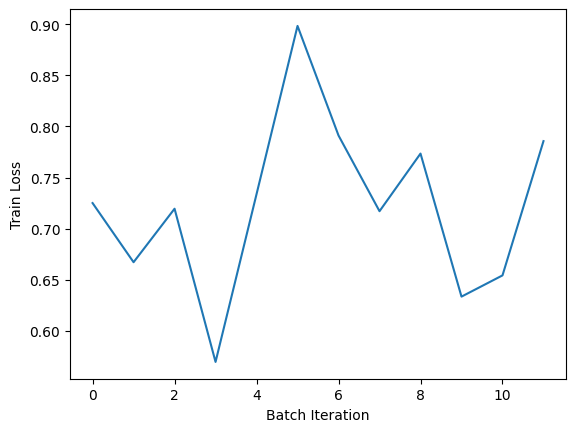

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

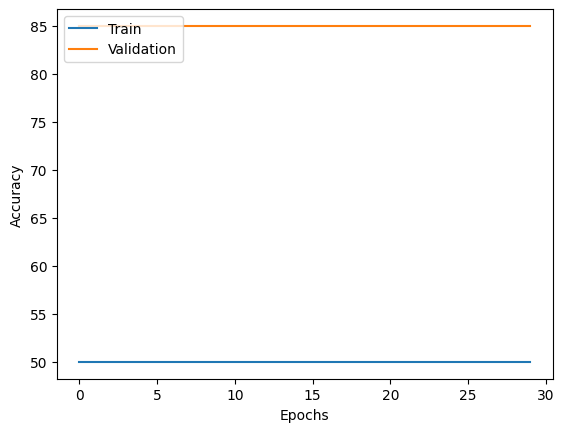

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## EXTRA - LONG MODELS - LSTM Model

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = truncated_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 5
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(truncated_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(truncated_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()